In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
from scipy.ndimage import shift
import itertools
import pickle
from pathlib import Path

from lmfit.models import GaussianModel, LinearModel

In [2]:
import pickle
#how to read
#fileObj = open('data/r76-80V-naitrig-100eV-goodchi.pkl', 'rb')
fileObj = open('data/r76_events_coincidencepeak_LE.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
#print(exampleObj)

In [3]:
import statistics as st
def isRailed(v):
    if(np.isnan(v).any()):
        return True
    if(st.mode(v)==0):
        return True
    return False

In [4]:
#import singularity_pulseSave as sps
import pulseAnalysis as pa

pulse_struct = pa.parseEventList('../coin_analysis/data/r76-coinpeak-lt-50keV.txt')

#pulse_struct = sps.parseEventList('../coin_analysis/data/r76_events_coincidencepeak.txt')

   SeriesNumber  EventNumber
0   72209162200        20309
1   72209162200        40339
2   72209162200        50269
3   72209162200        60108
4   72209162200        60849
5   72209162200        80307
6   72209162200       100246
7   72209162200       110588
8   72209162200       110617
9   72209162200       120647
[72209162200 72209171225 72209172155]
[  20309   40339   50269   60108   60849   80307  100246  110588  110617
  120647  120688  130460  140628  150823  160296  170423  180002  180423
  230432  240270  270221  340151  340912  380054  380186  390511  420391
  420816  430710  440168  480387  480389  500725  520930  540170  540903
  550322  560707  560931  570415  580008  580723  590121  610172  610663
  610684  640653  650751  670228  670650  690338  710437  740337  750334
  750490  760179  770287  780145  780259  780278  780628  800530  810923
  820568  840012  840222  850265  860663  880573  880913  910282  920809
  920948  930239  930872  940631  950888  960920  970767 10

In [5]:
coindata = pd.read_csv("../coin_analysis/data/r76_events_coincidencepeak.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','PTOFdelay','pt_keVee'], \
            delim_whitespace=False)

series_nums = np.asarray(coindata['SeriesNumber'])
event_nums = np.asarray(coindata['EventNumber'])
EkeV = np.asarray(coindata['pt_keVee'])
PTOFdelay = np.asarray(coindata['PTOFdelay'])

def getEnergy(series,ev):
    energy = 0

    for i in range(0, len(series_nums)):
        if series_nums[i] == series:
            if event_nums[i] == ev:
                energy = (EkeV[i])
    return energy

def getBaseline(ptpulse):
    
    x = np.linspace(100, 250, 150)
    #print(len(x))
    y = ptpulse[100:250]
    #print(len(y))
    
    #print(x)
    #print(y)
    
    baseline_model = np.polyfit(x, y, 1)
    baseline_model_fn = np.poly1d(baseline_model)
    
    return(baseline_model_fn)

In [6]:
# toggle plotting pulses
plot = True

In [7]:
def getLargestChannel(pulses,series=72209162200,ev=20309,chan=[('Z1','PA'),('Z1','PB'),('Z1','PD'),('Z3','PA'),('Z3','PB'),('Z3','PD')]):
    cpulse=[]
    largest = 0
    chan_name = 'null'
    
    for c in chan:

        pulse = pulses[c[0]][c[1]][series,ev]
        if(isRailed(pulse)):
            continue

        #print(pulse)
        #print(np.size(ptpulse))
        if(max(pulse) > largest):
            chan_name = c
            cpulse = pulse
            largest = max(pulse)
            #print("Larger!")
        else:
            #print("Smaller!")
            continue
    
    mean = np.mean(cpulse[100:])
    cpulse = cpulse-mean
        
    return cpulse, chan_name

print(getLargestChannel(exampleObj))

(array([-112.03428428, -112.03428428, -111.03428428, ..., -114.03428428,
       -114.03428428, -116.03428428]), ('Z3', 'PB'))


Series Number: 72209162200
Event Number: 20309
Energy: 48.72442612309 keV


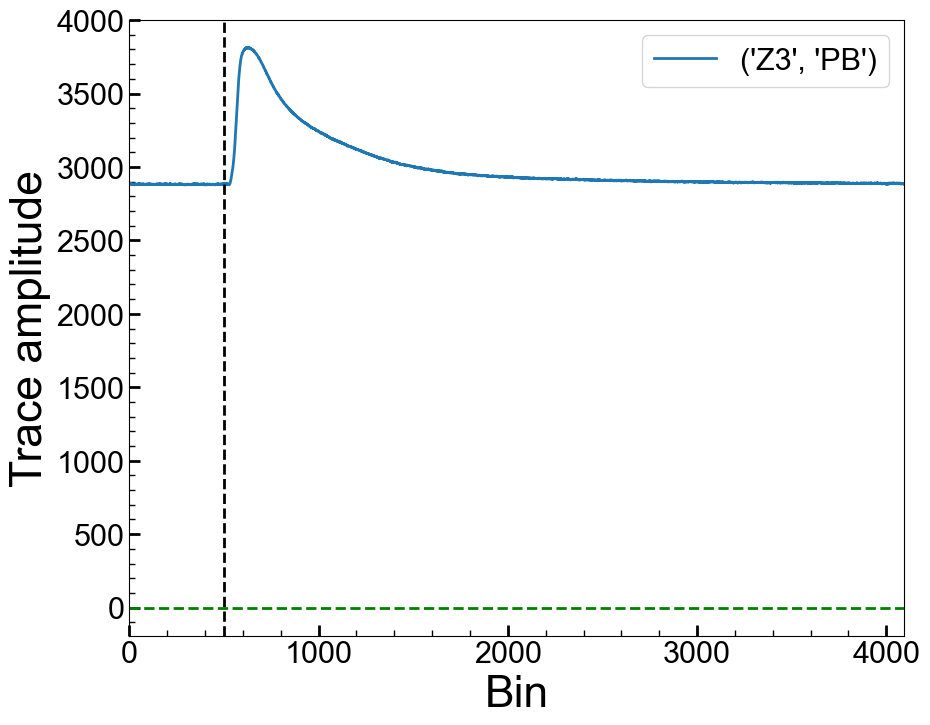

Series Number: 72209162200
Event Number: 40339
Energy: 10.34608253162 keV


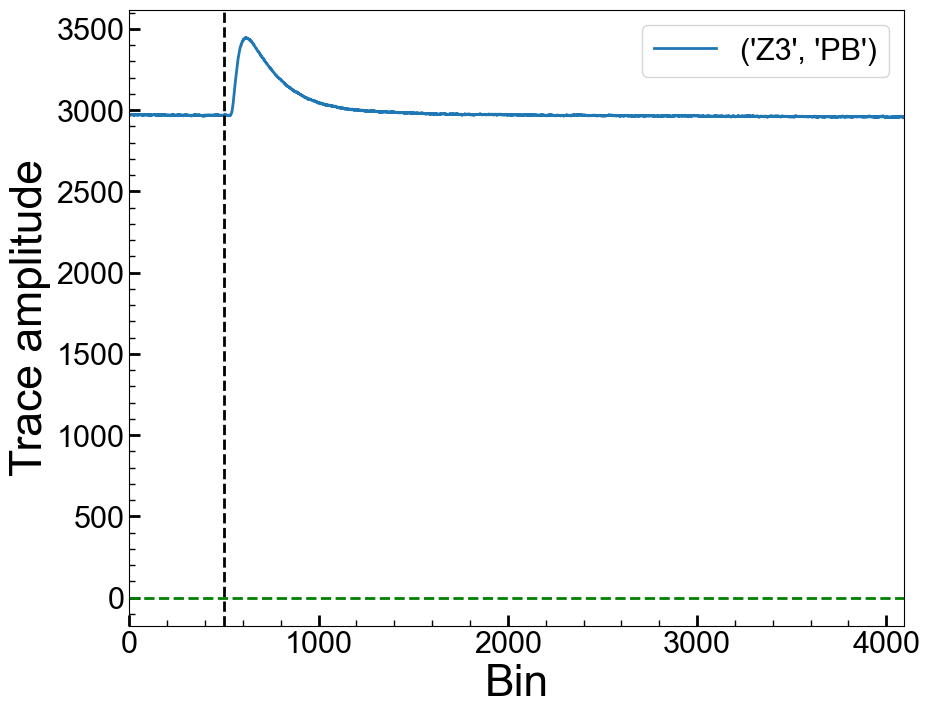

Series Number: 72209162200
Event Number: 50269
Energy: 40.07287564851 keV


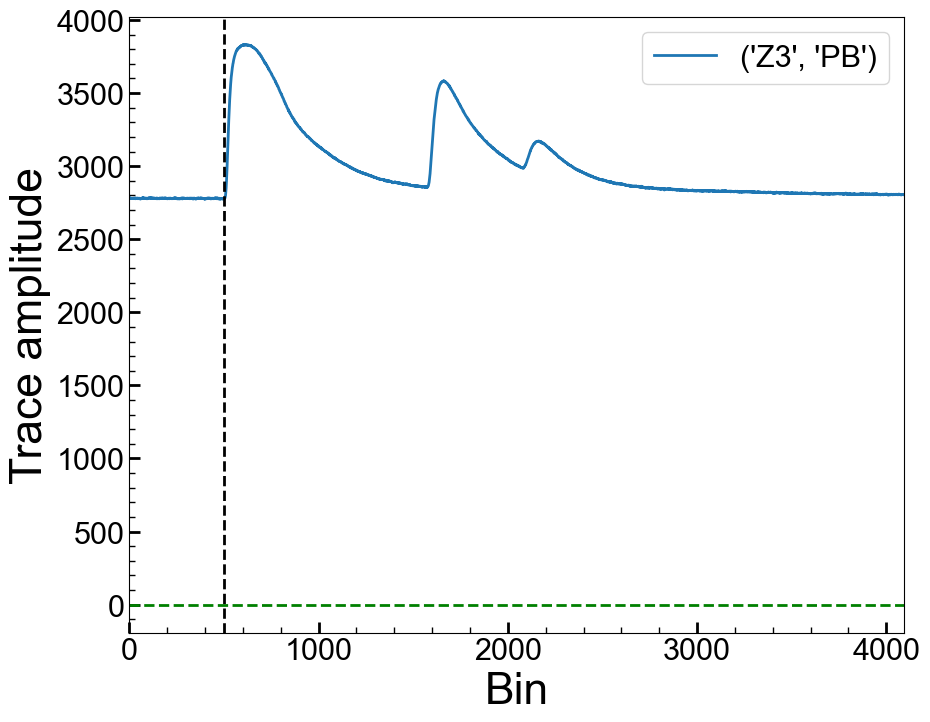

Series Number: 72209162200
Event Number: 60108
Energy: 21.7417630781 keV


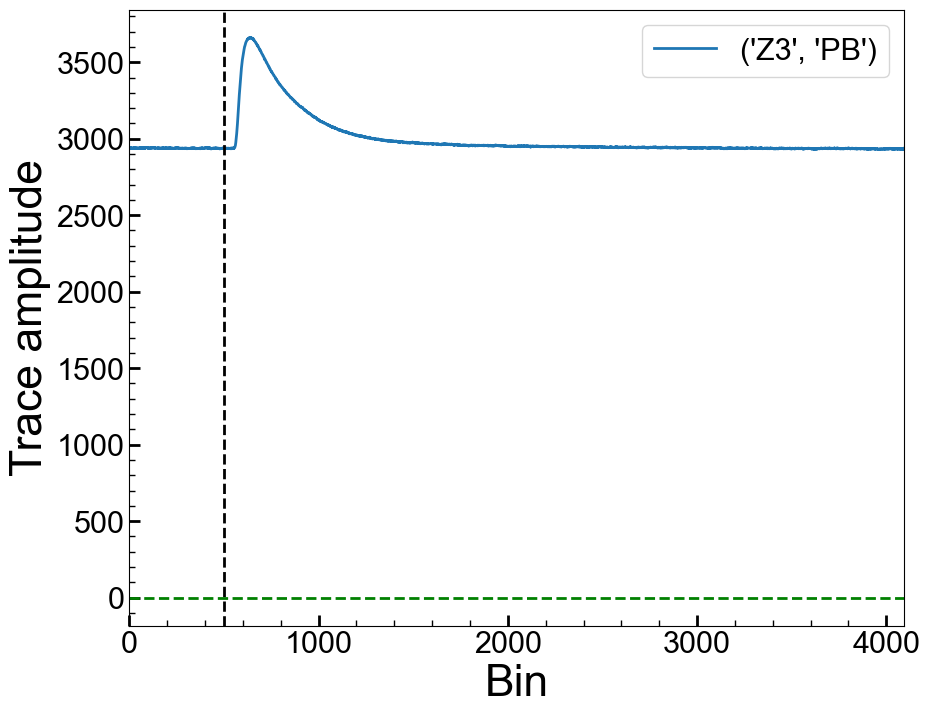

Series Number: 72209162200
Event Number: 60849
Energy: 17.18529370068 keV


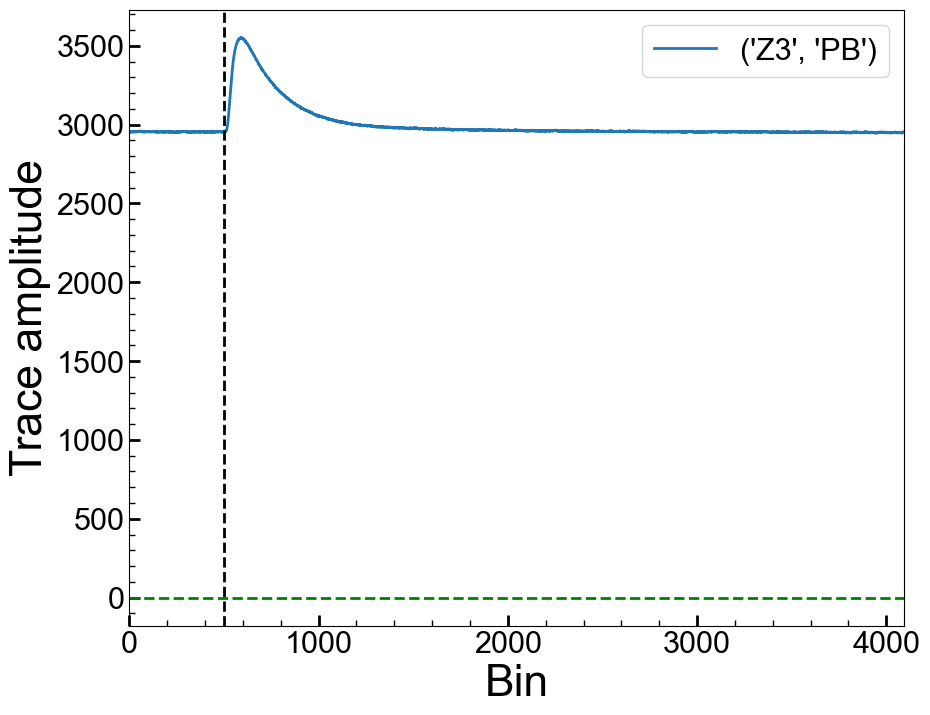

Series Number: 72209162200
Event Number: 80307
Energy: 11.98039564031 keV


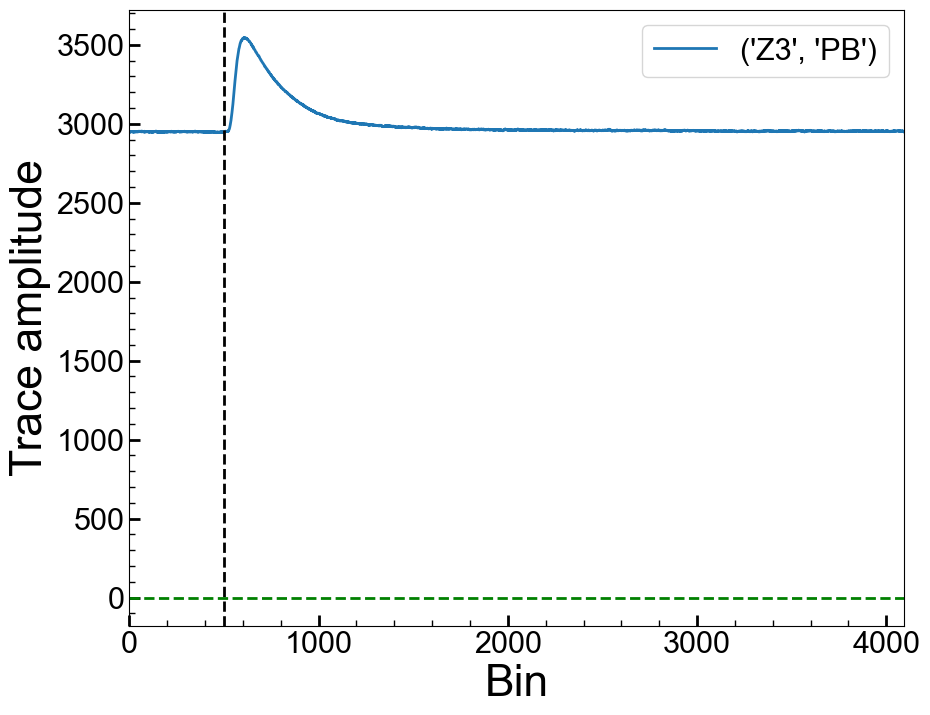

Series Number: 72209162200
Event Number: 100246
Energy: 17.65301361624 keV


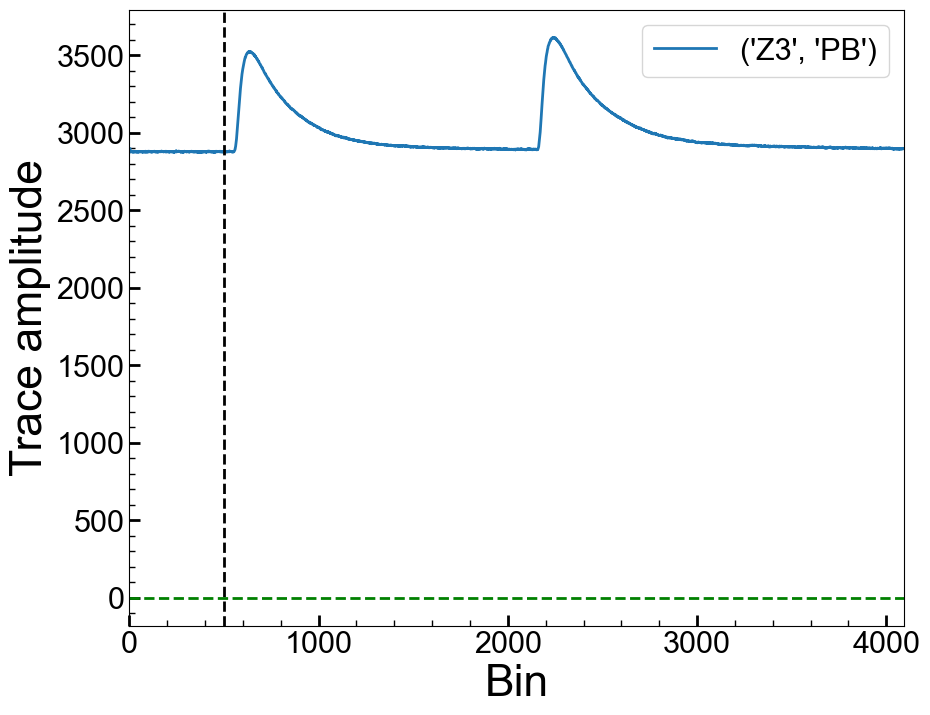

Series Number: 72209162200
Event Number: 110588
Energy: 34.03905404596 keV


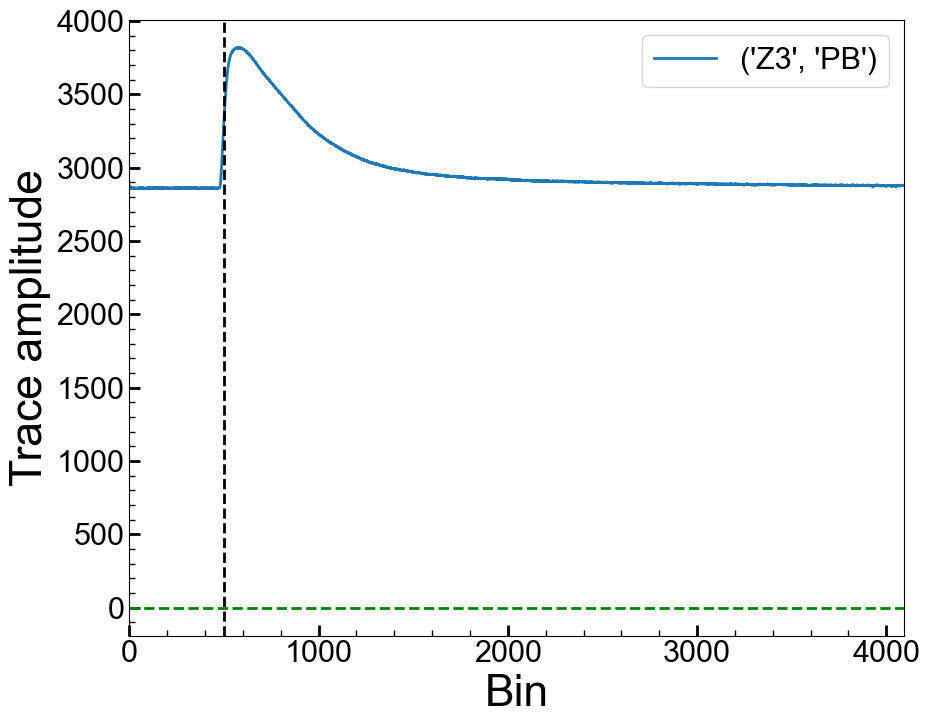

Series Number: 72209162200
Event Number: 110617
Energy: 49.48838945648 keV


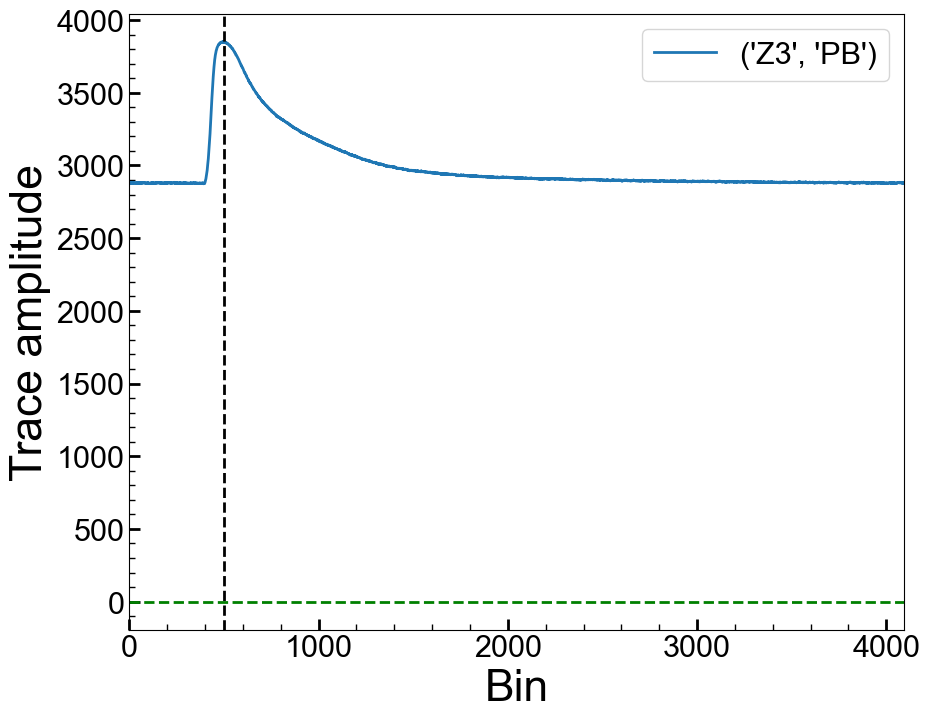

Series Number: 72209162200
Event Number: 120647
Energy: 17.93996431643 keV


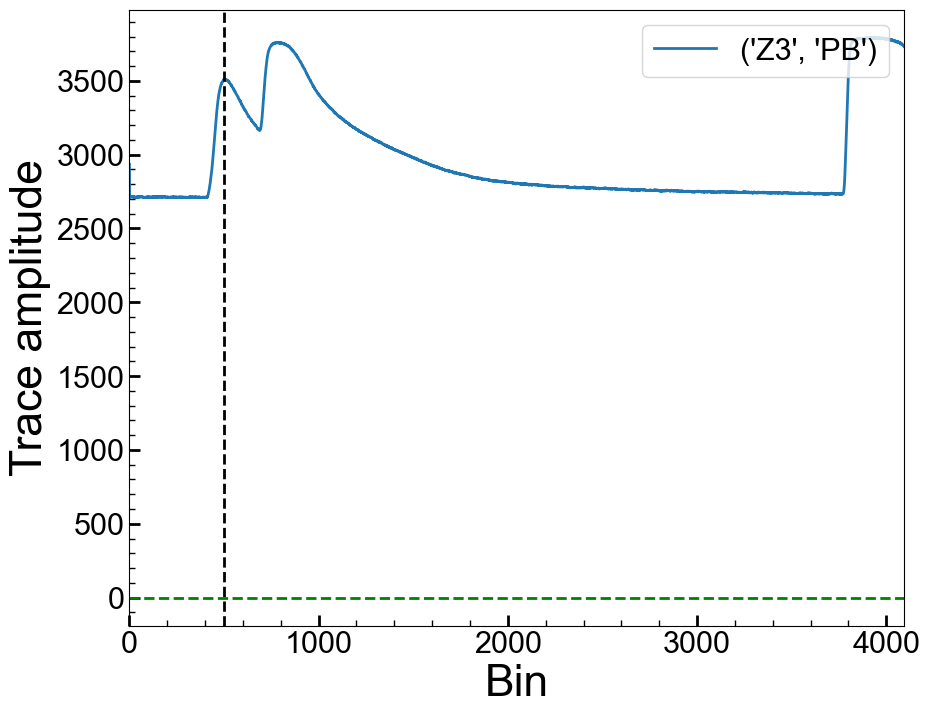

Series Number: 72209162200
Event Number: 120688
Energy: 6.287092835697 keV


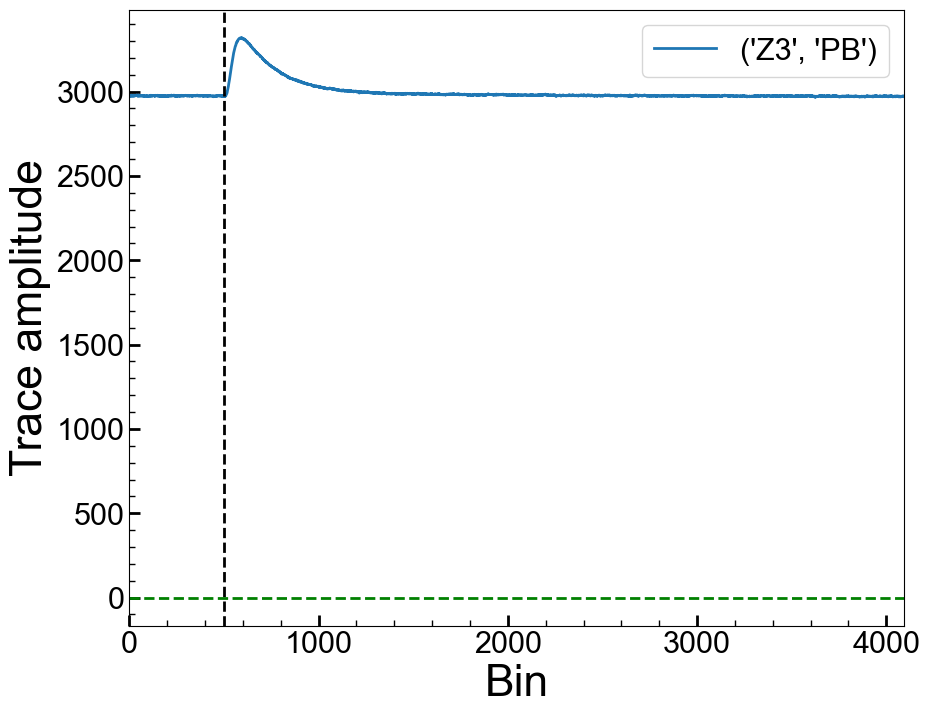

Series Number: 72209162200
Event Number: 130460
Energy: 11.77147191395 keV


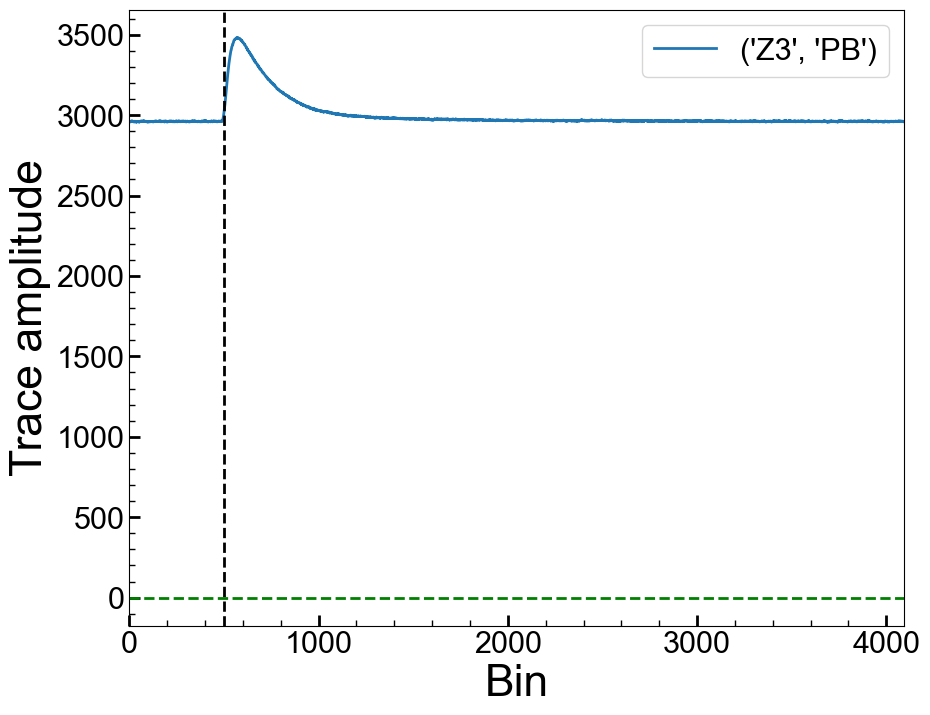

Series Number: 72209162200
Event Number: 140628
Energy: 6.77380884301 keV


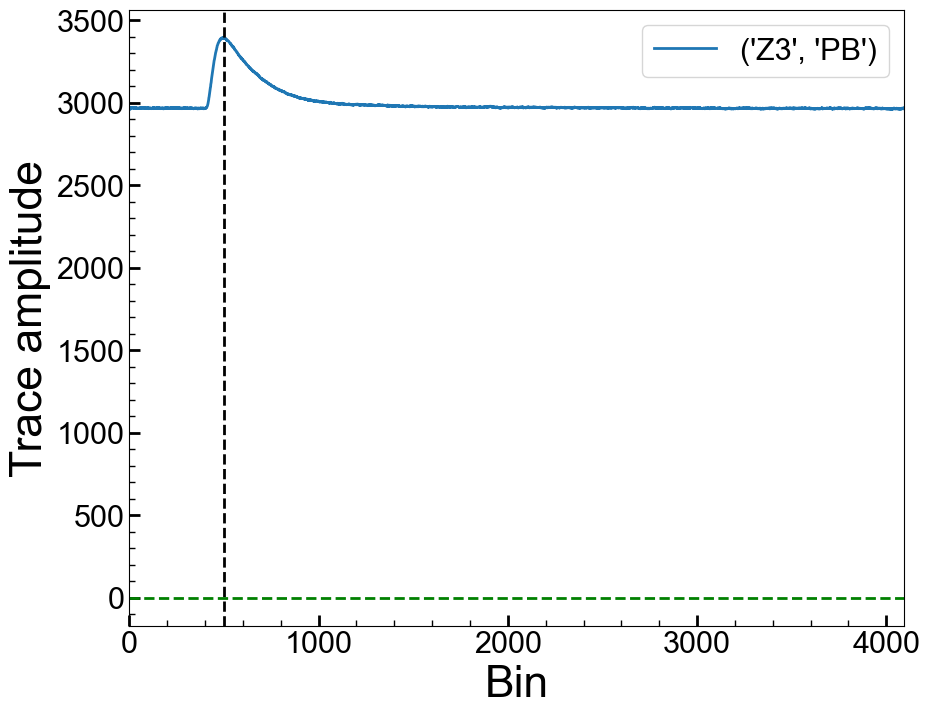

Series Number: 72209162200
Event Number: 150823
Energy: 28.45972947161 keV


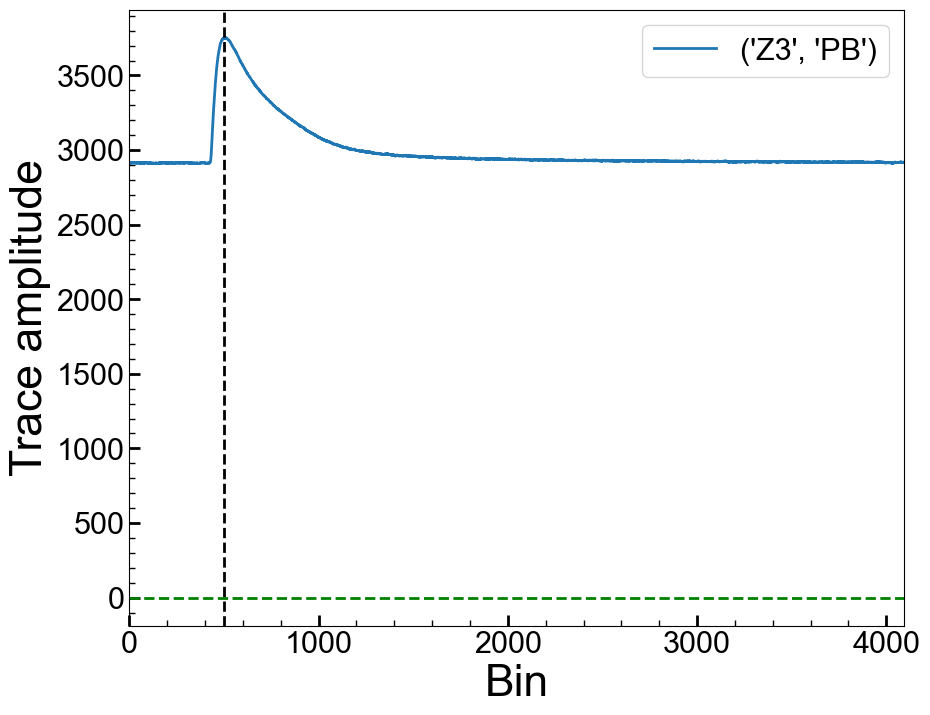

Series Number: 72209162200
Event Number: 160296
Energy: 4.022886292054 keV


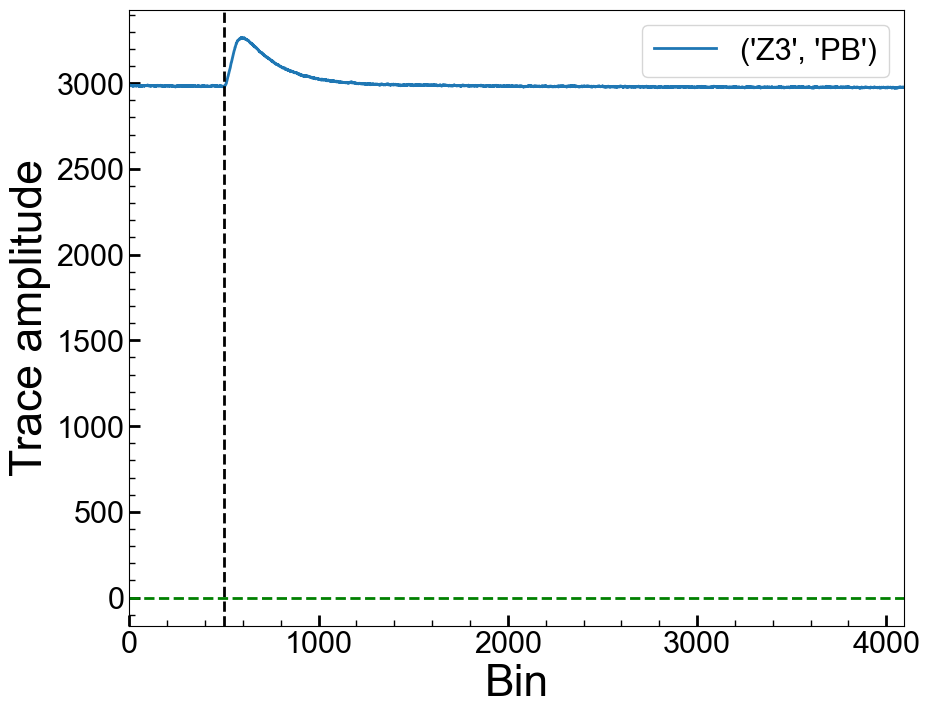

Series Number: 72209162200
Event Number: 170423
Energy: 24.90143389189 keV


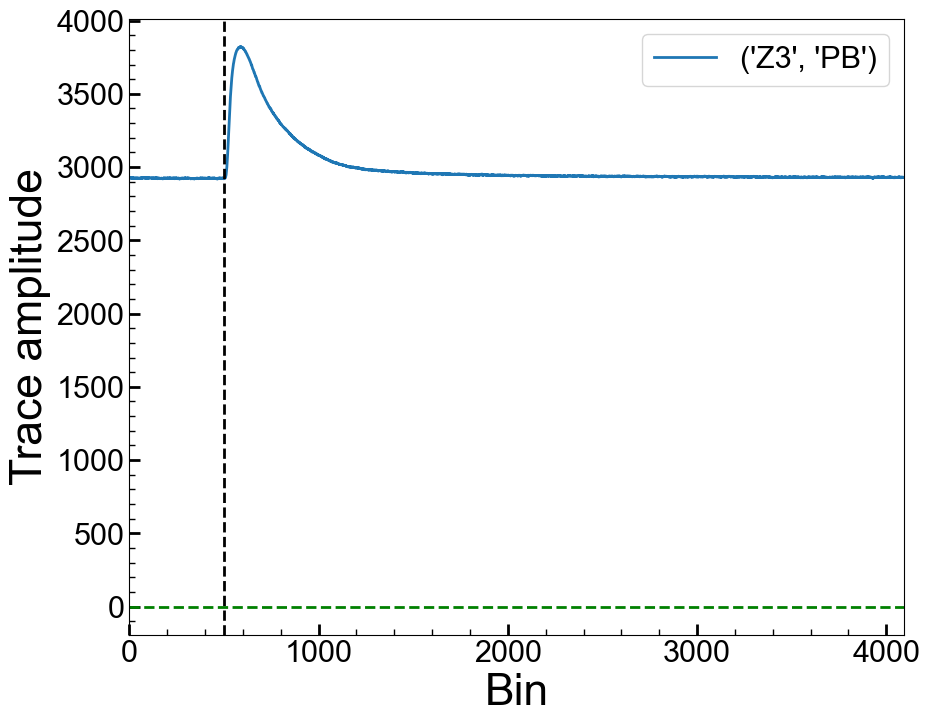

Series Number: 72209162200
Event Number: 180002
Energy: 30.94808547534 keV


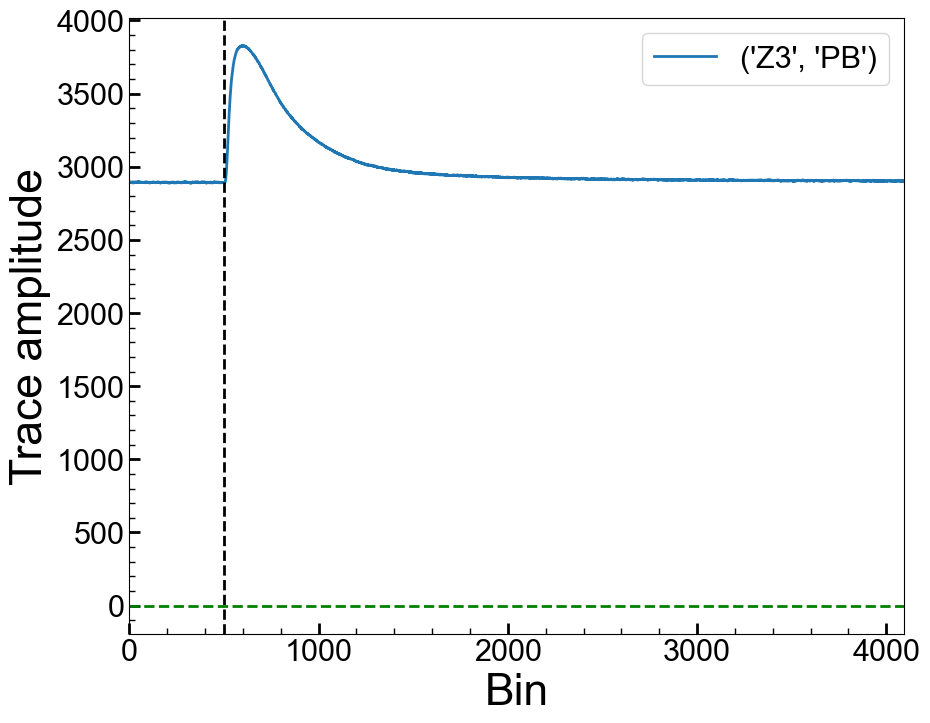

Series Number: 72209162200
Event Number: 180423
Energy: 11.78615315698 keV


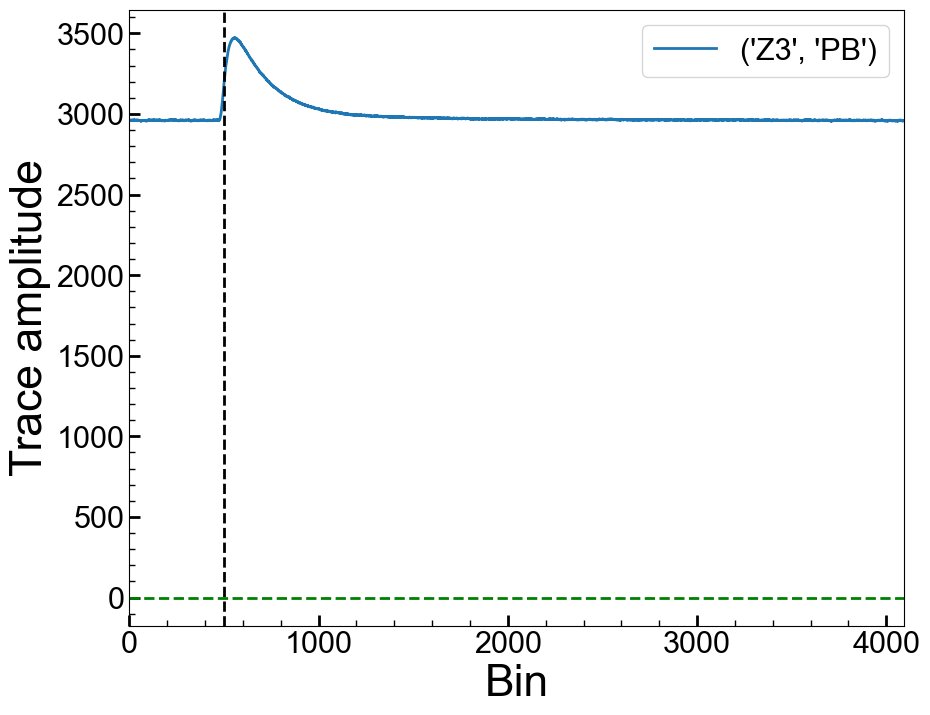

Series Number: 72209162200
Event Number: 230432
Energy: 6.139483142576 keV


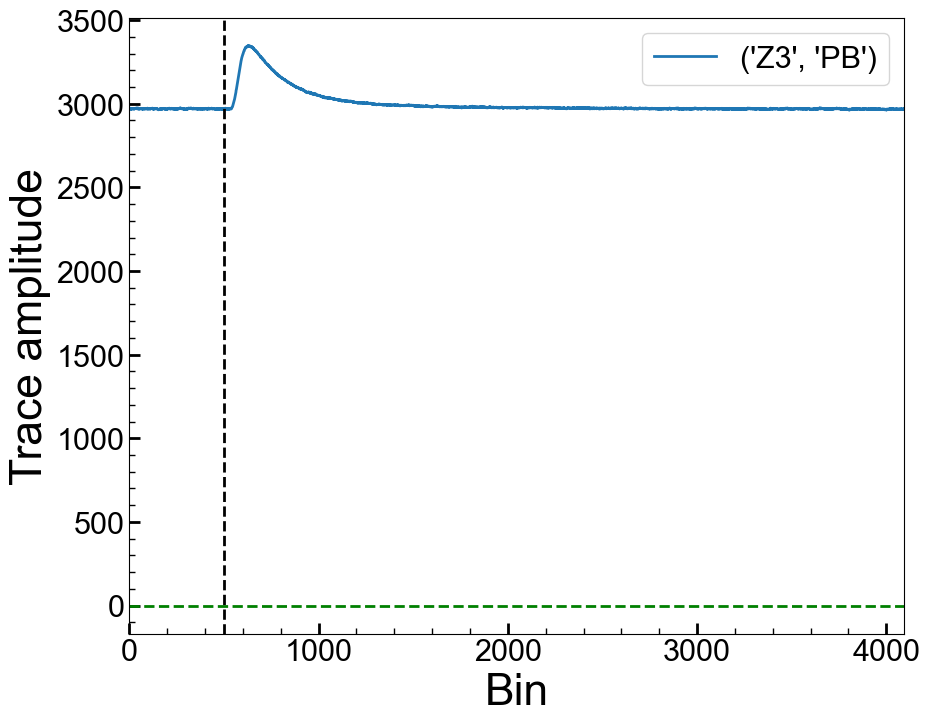

Series Number: 72209162200
Event Number: 240270
Energy: 20.36556890581 keV


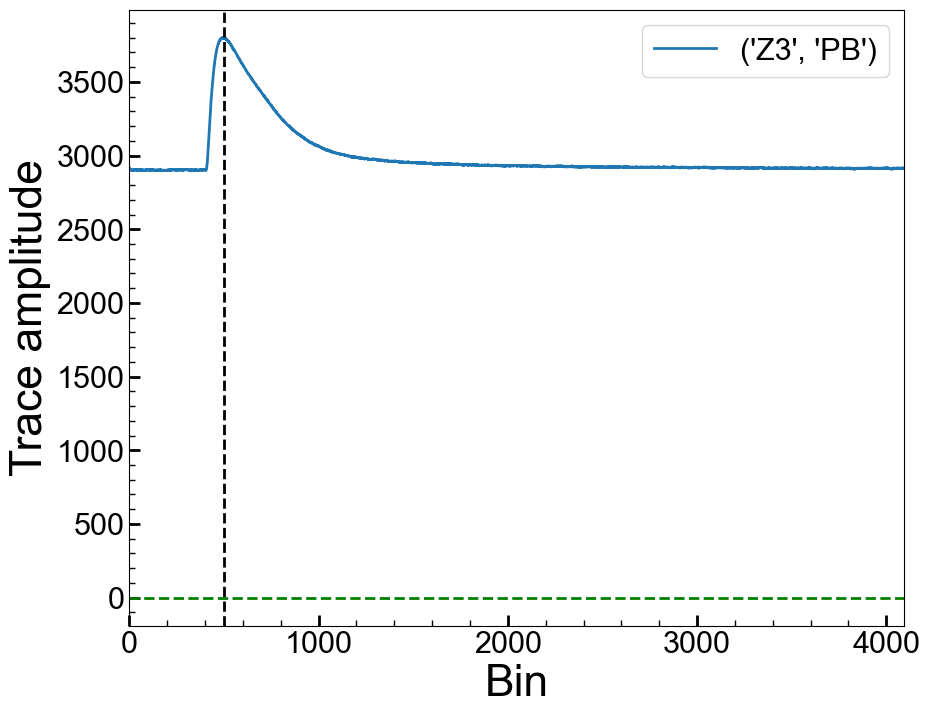

Series Number: 72209162200
Event Number: 270221
Energy: 39.26025312352 keV


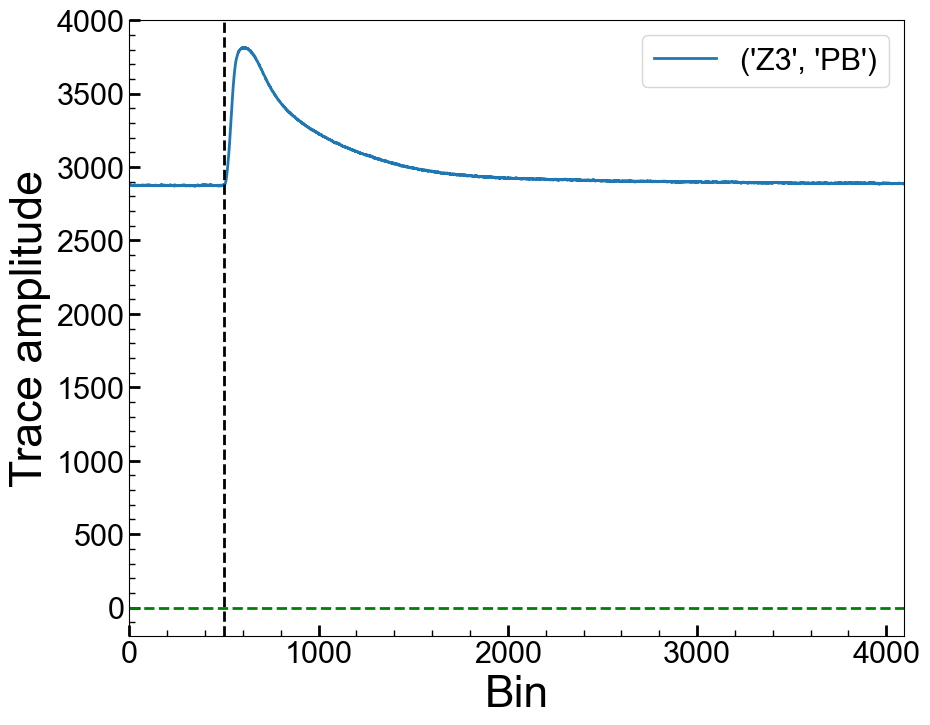

Series Number: 72209162200
Event Number: 340151
Energy: 15.21637172121 keV


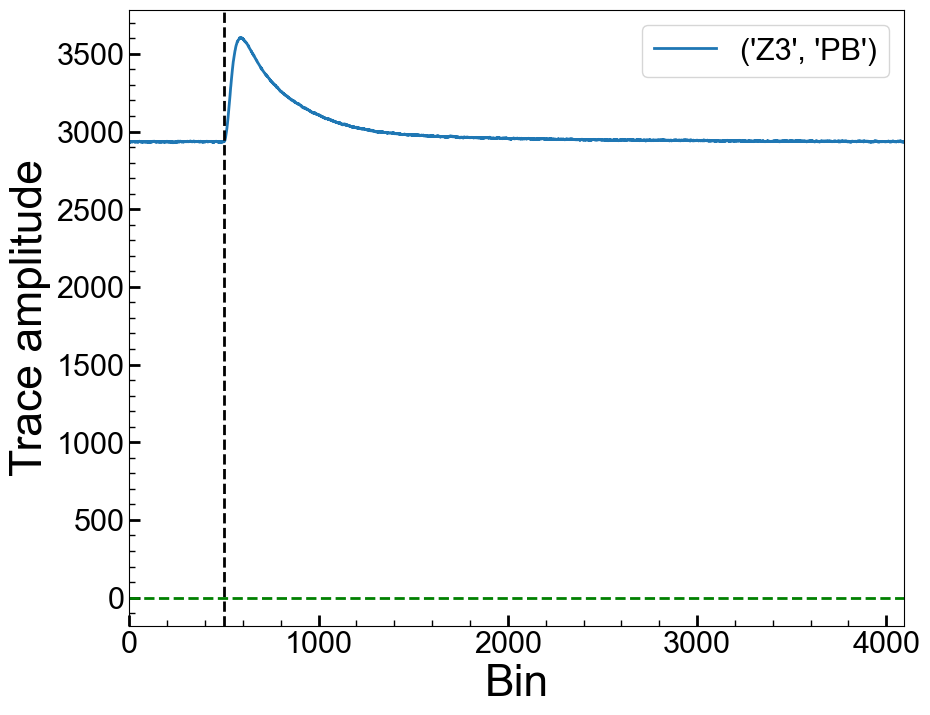

Series Number: 72209162200
Event Number: 340912
Energy: 9.715530494007 keV


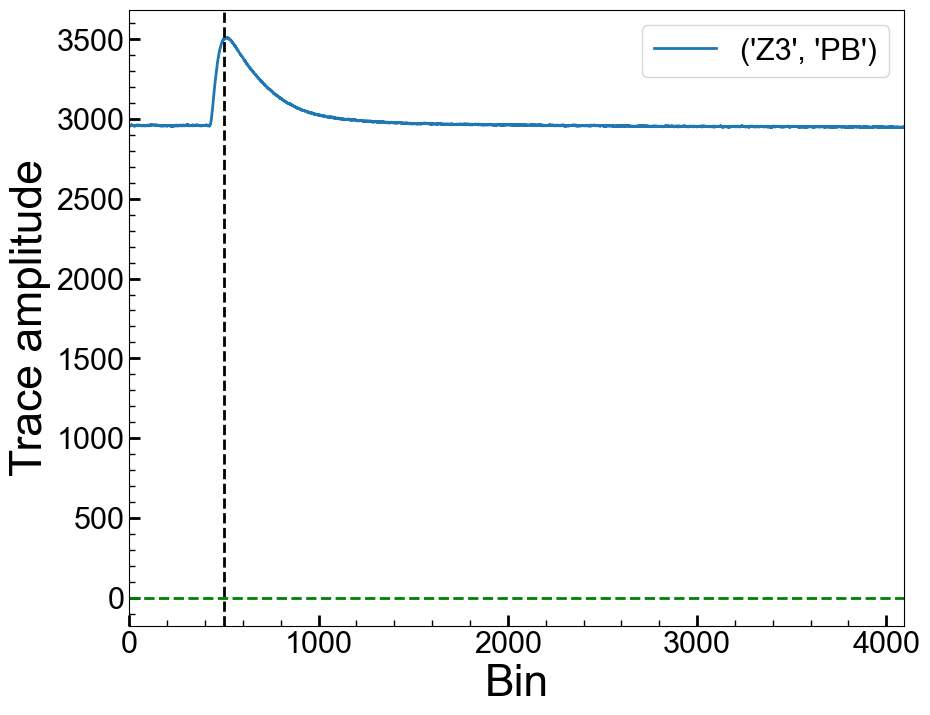

Series Number: 72209162200
Event Number: 380054
Energy: 13.69835568149 keV


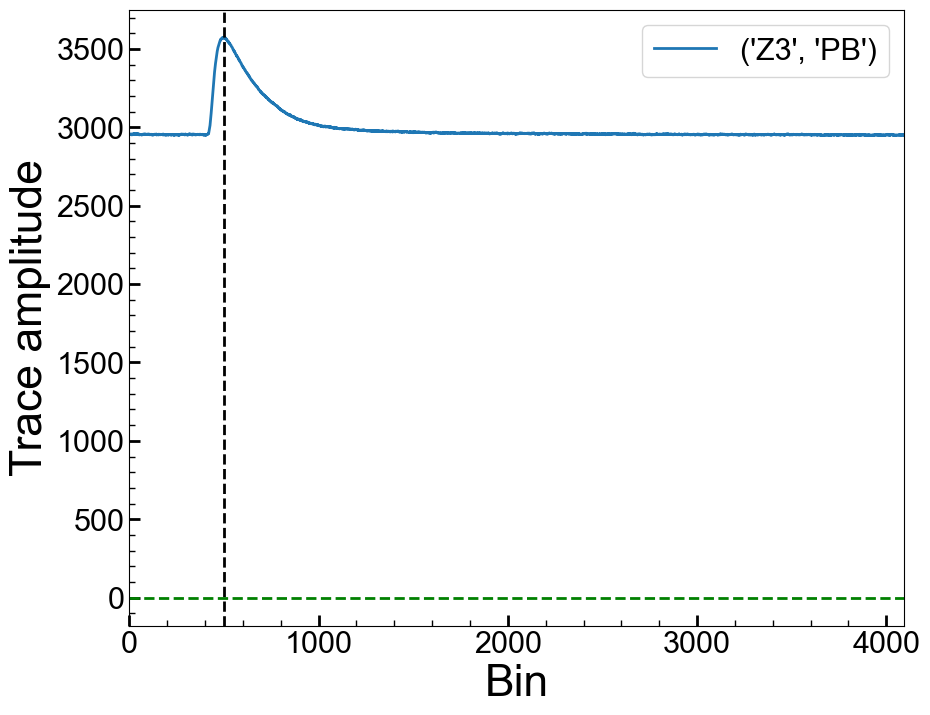

Series Number: 72209162200
Event Number: 380186
Energy: 8.165548711592 keV


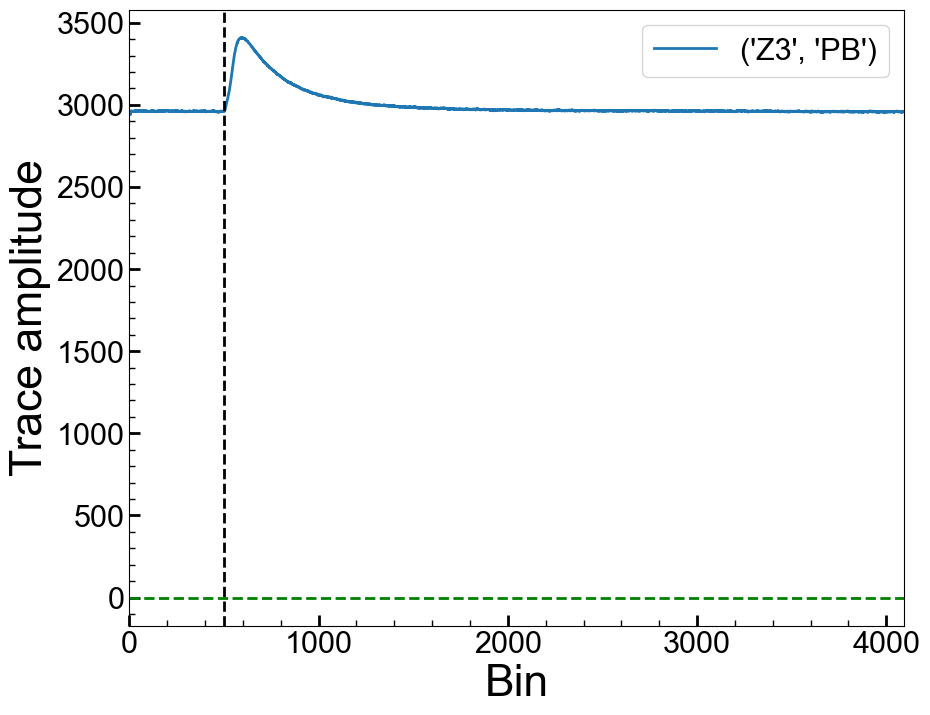

Series Number: 72209162200
Event Number: 390511
Energy: 31.86101733774 keV


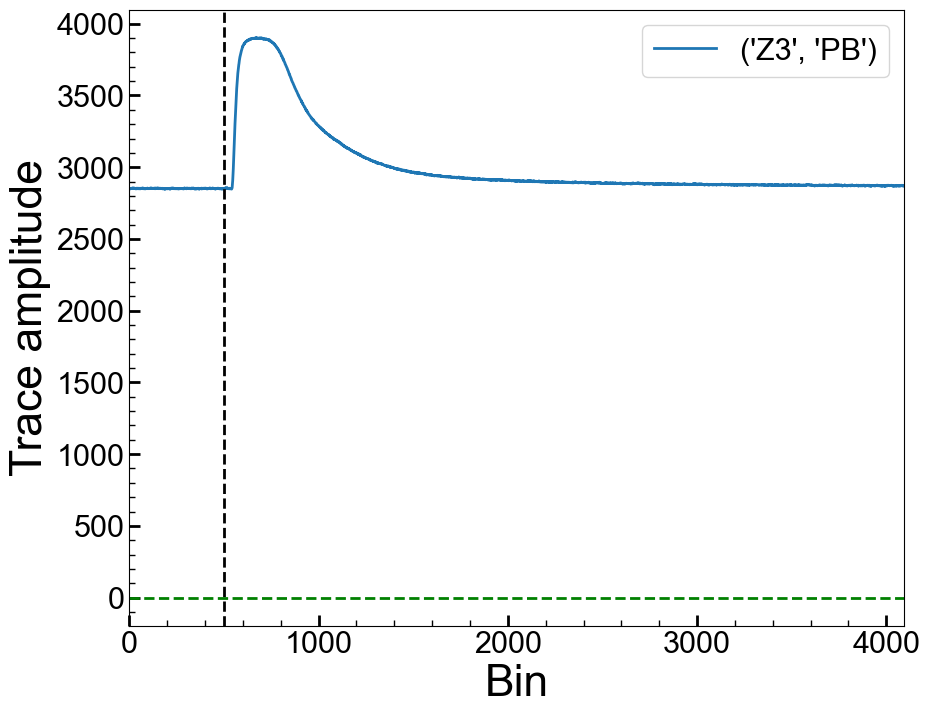

Series Number: 72209162200
Event Number: 420391
Energy: 5.439453766113 keV


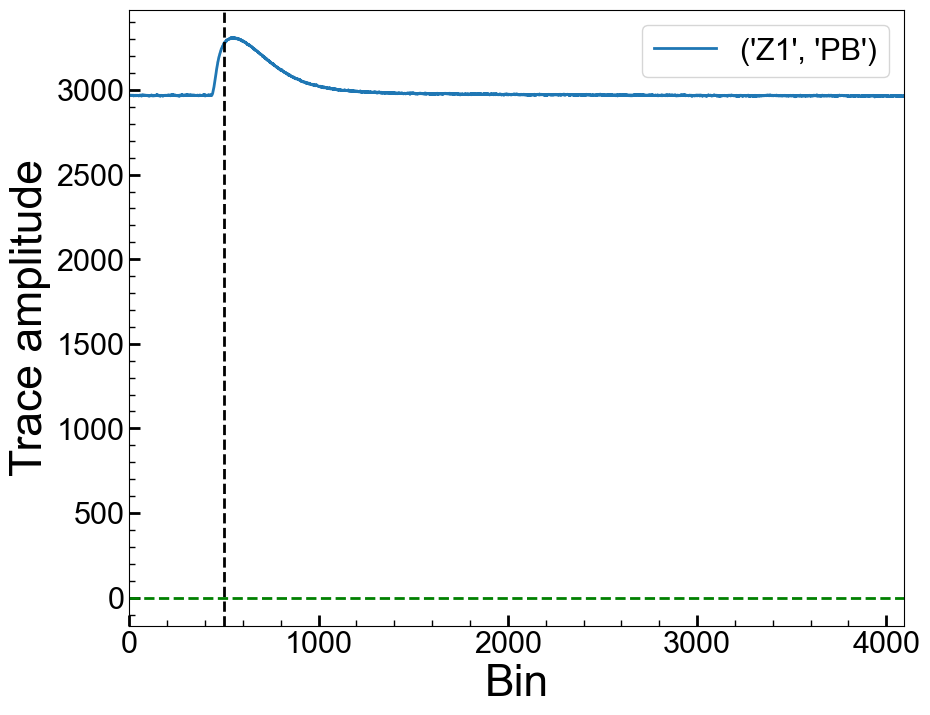

Series Number: 72209162200
Event Number: 420816
Energy: 19.04186691565 keV


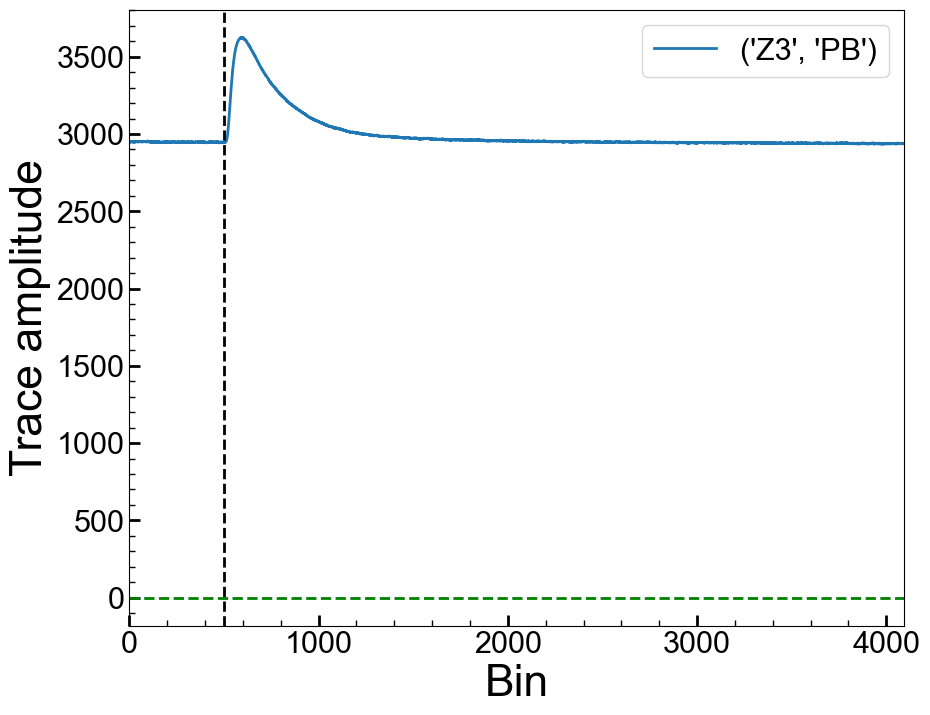

Series Number: 72209162200
Event Number: 430710
Energy: 13.64832985199 keV


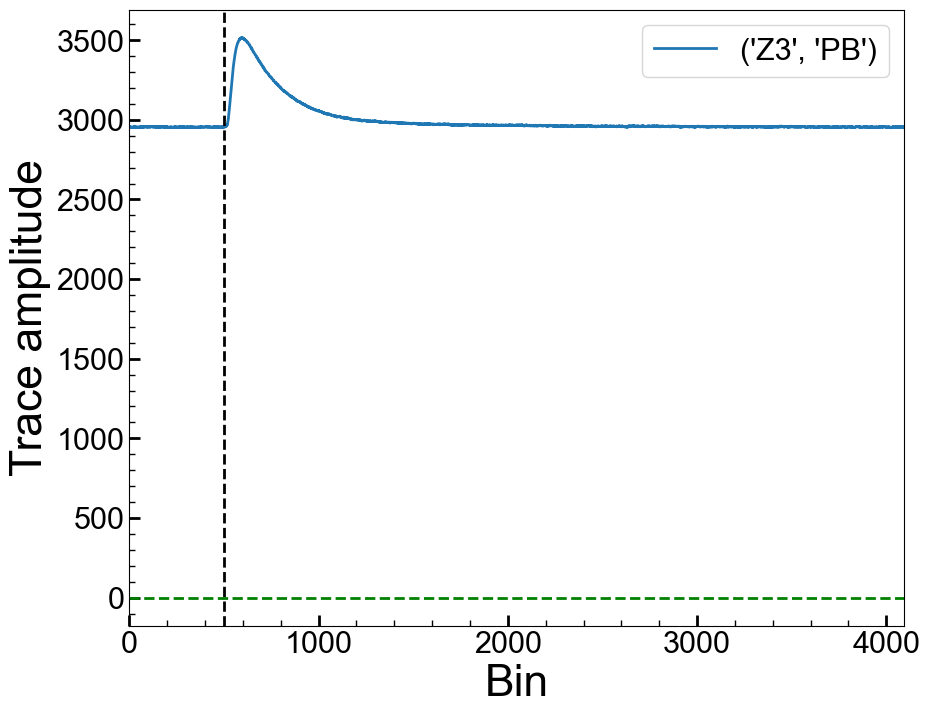

Series Number: 72209162200
Event Number: 440168
Energy: 28.43559512832 keV


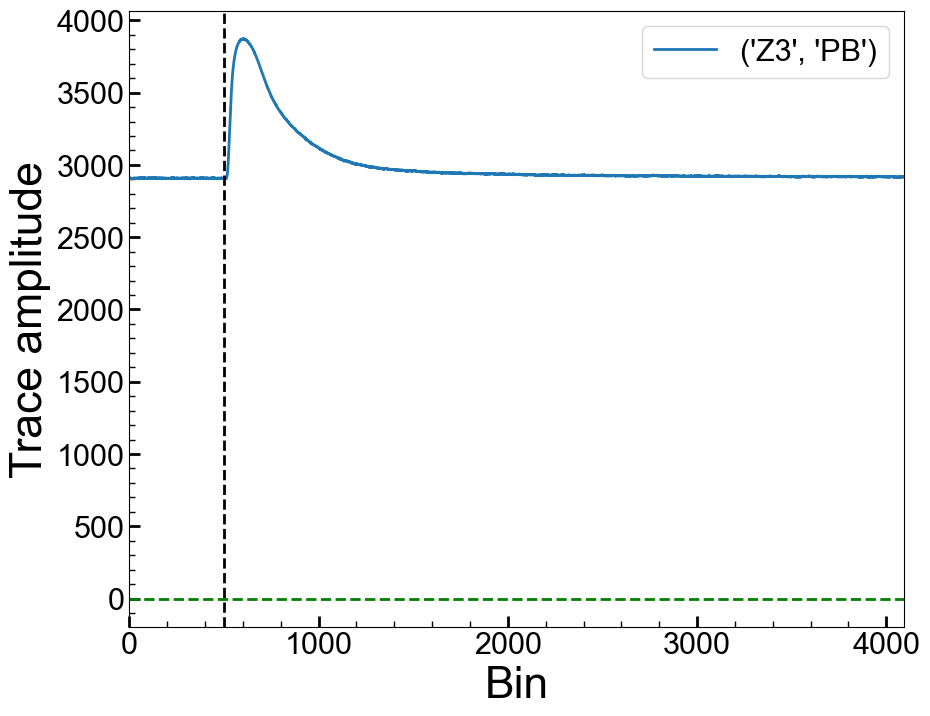

Series Number: 72209162200
Event Number: 480387
Energy: 2.055333671358 keV


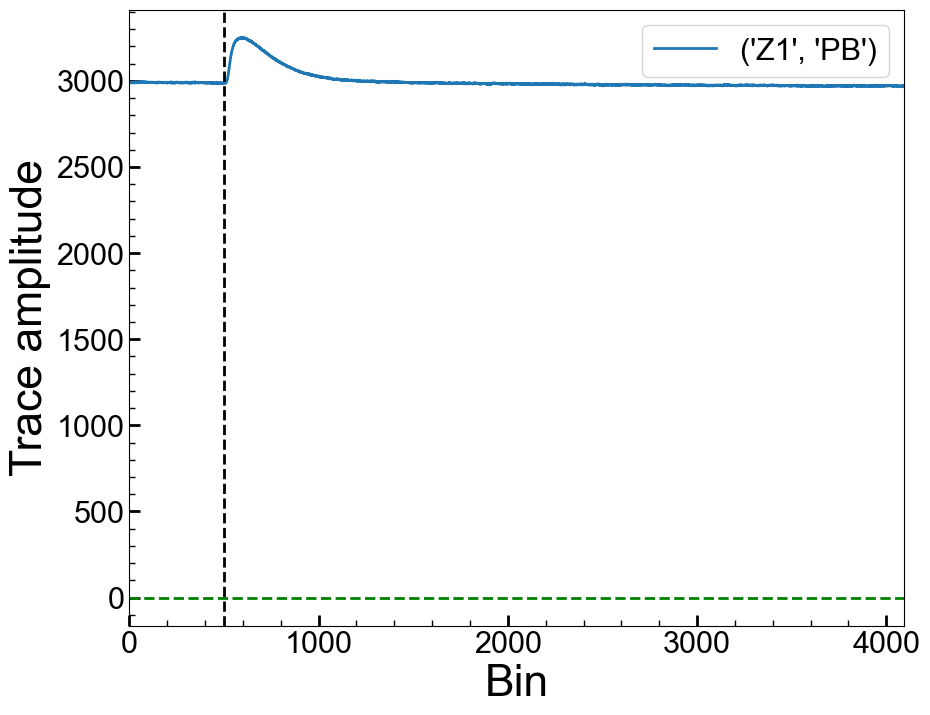

Series Number: 72209162200
Event Number: 480389
Energy: 14.79957140929 keV


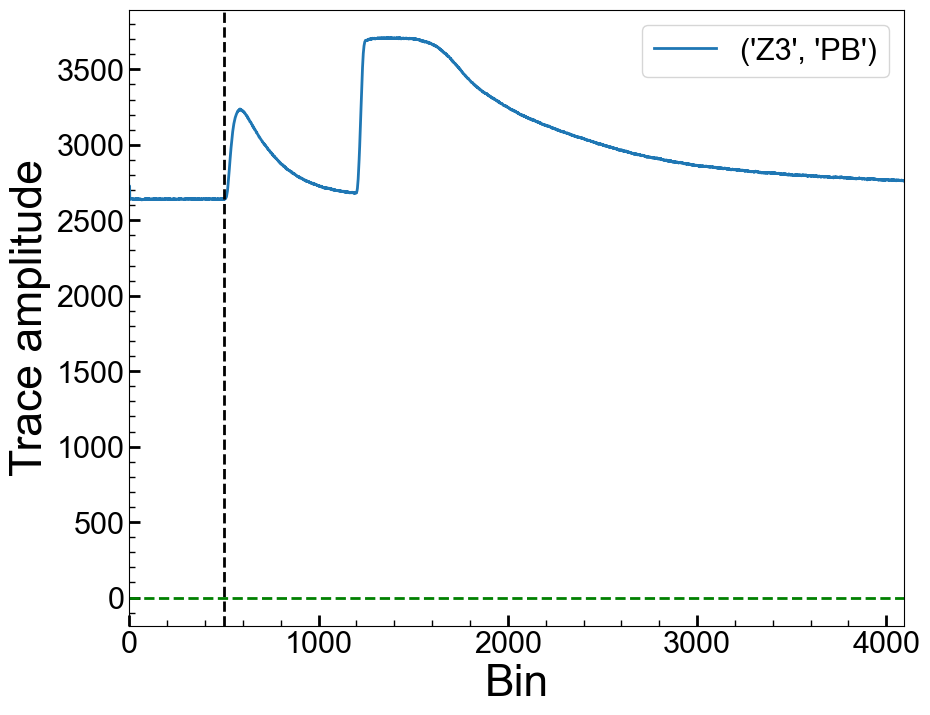

Series Number: 72209162200
Event Number: 500725
Energy: 31.80494071183 keV


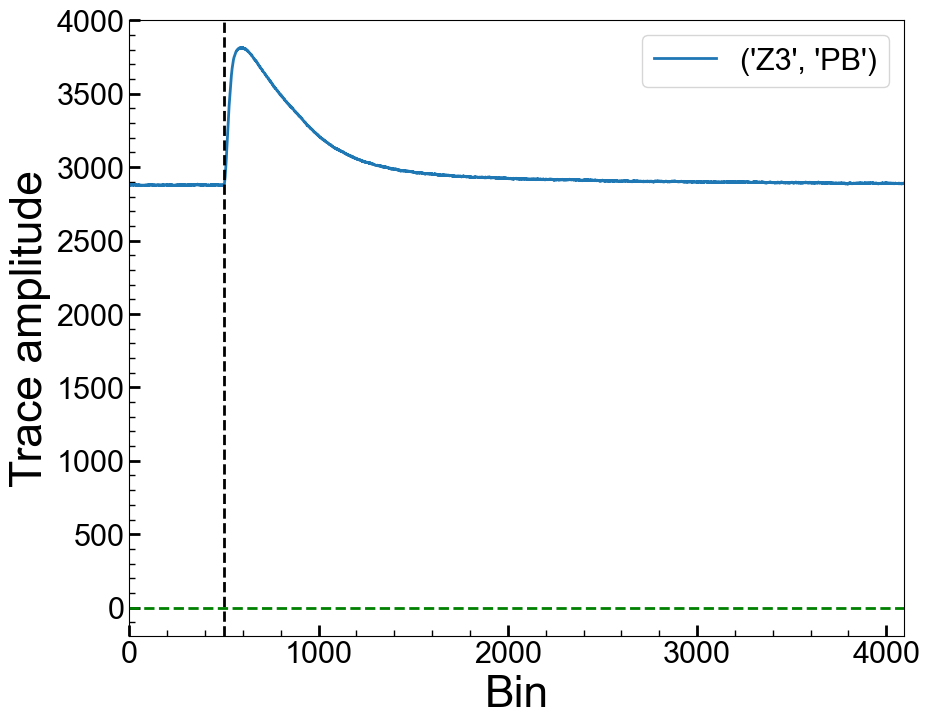

Series Number: 72209162200
Event Number: 520930
Energy: 26.11538501165 keV


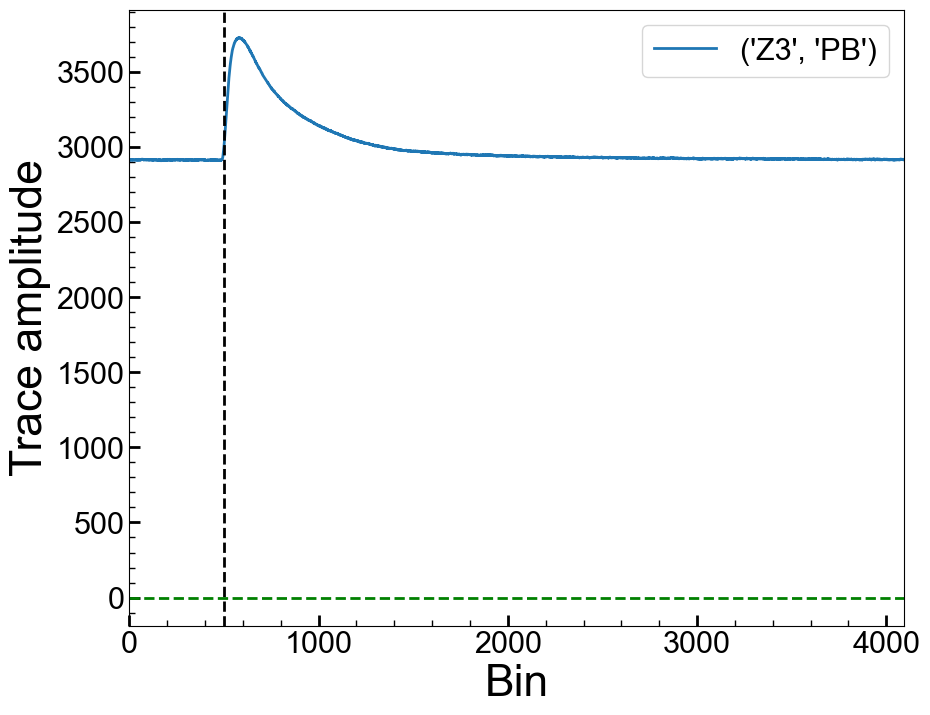

Series Number: 72209162200
Event Number: 540170
Energy: 5.36695053029 keV


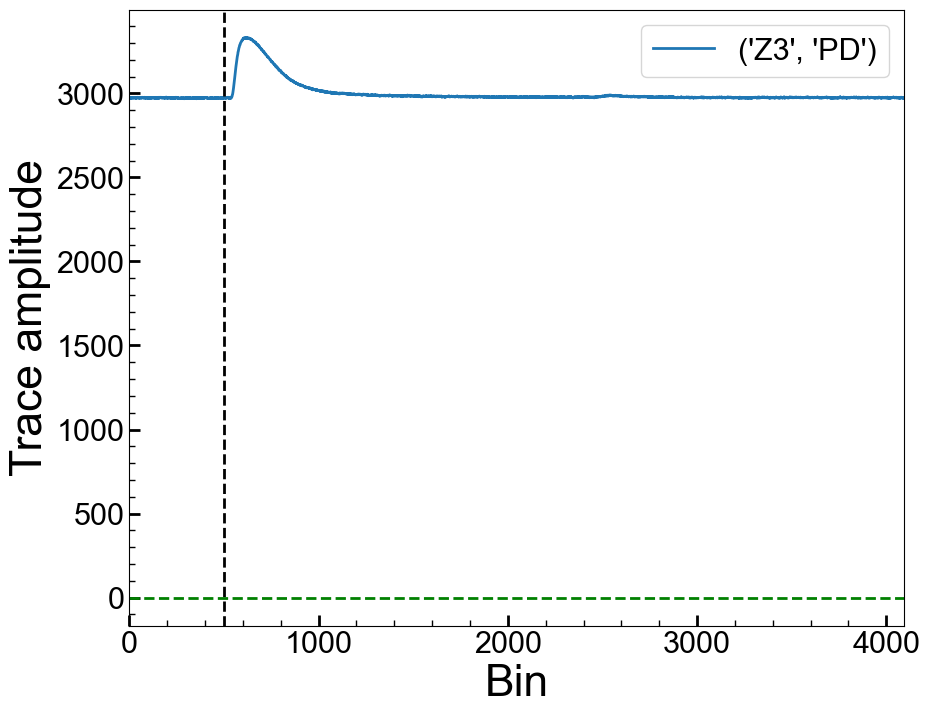

Series Number: 72209162200
Event Number: 540903
Energy: 2.693683786015 keV


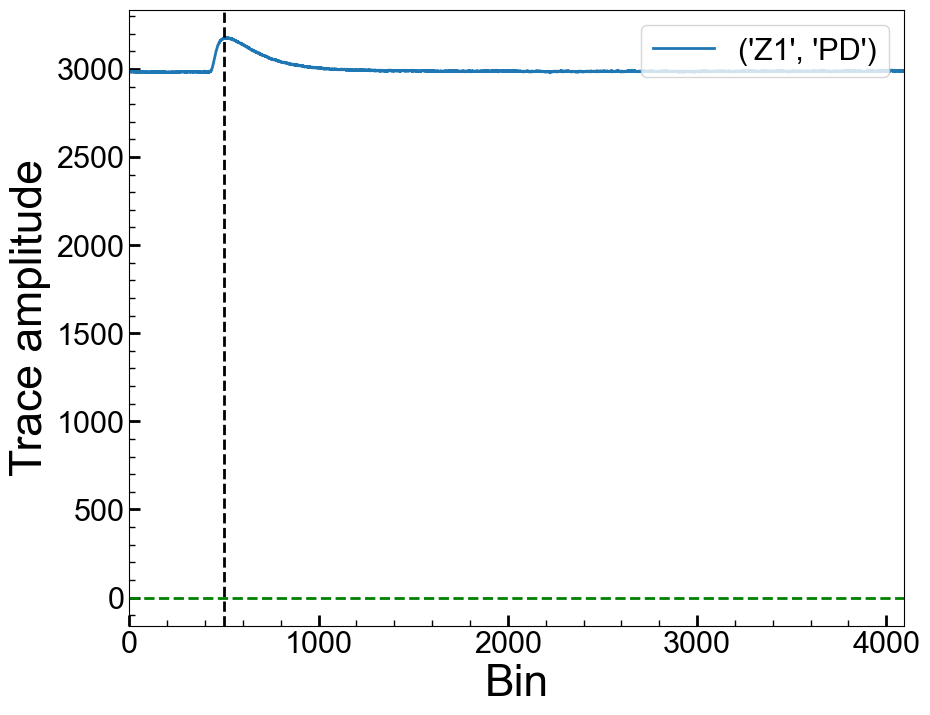

Series Number: 72209162200
Event Number: 550322
Energy: 48.08899535536 keV


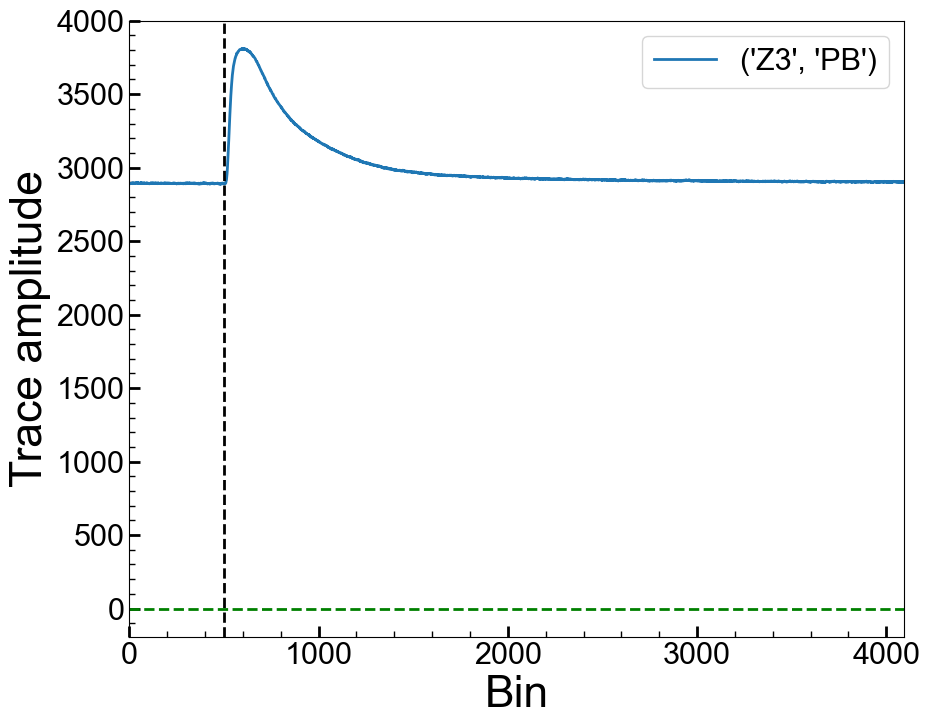

Series Number: 72209162200
Event Number: 560707
Energy: 47.8705963004 keV


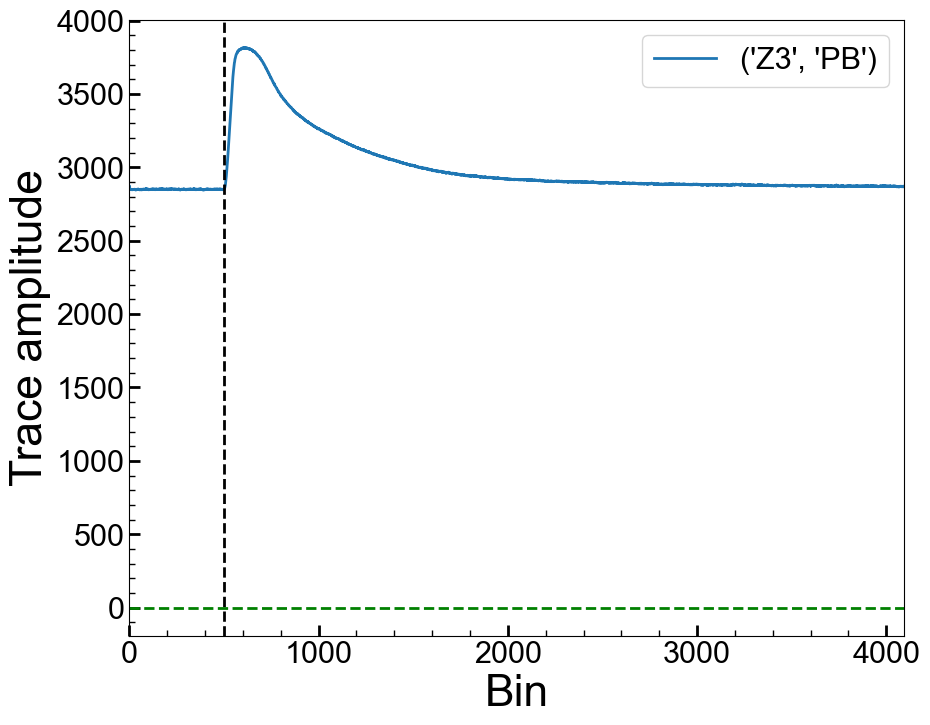

Series Number: 72209162200
Event Number: 560931
Energy: 37.38332924631 keV


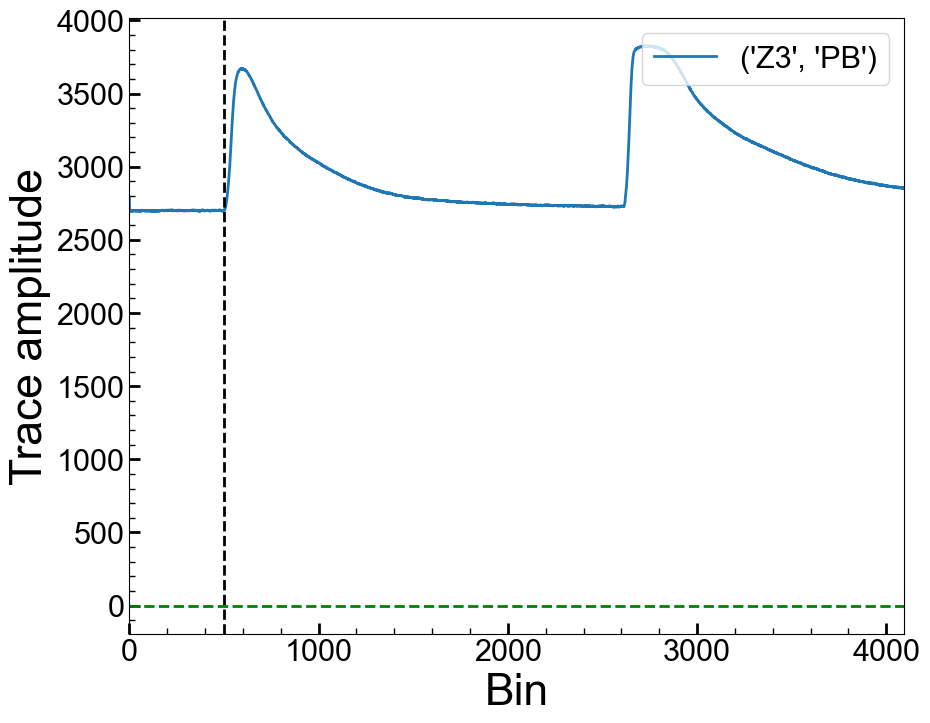

Series Number: 72209162200
Event Number: 570415
Energy: 47.87359137172 keV


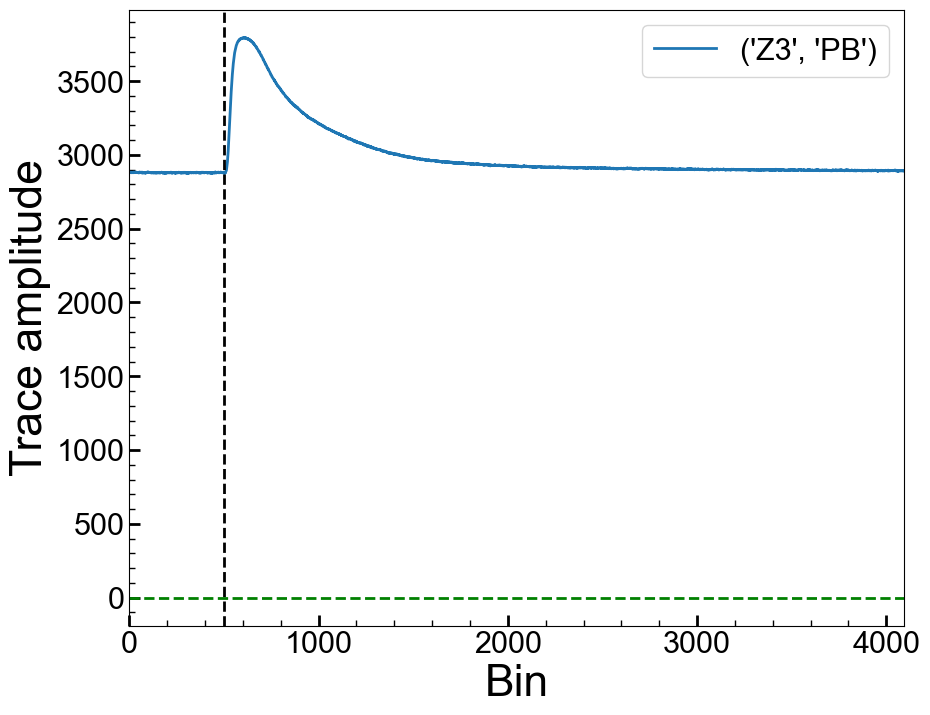

Series Number: 72209162200
Event Number: 580008
Energy: 33.97321412501 keV


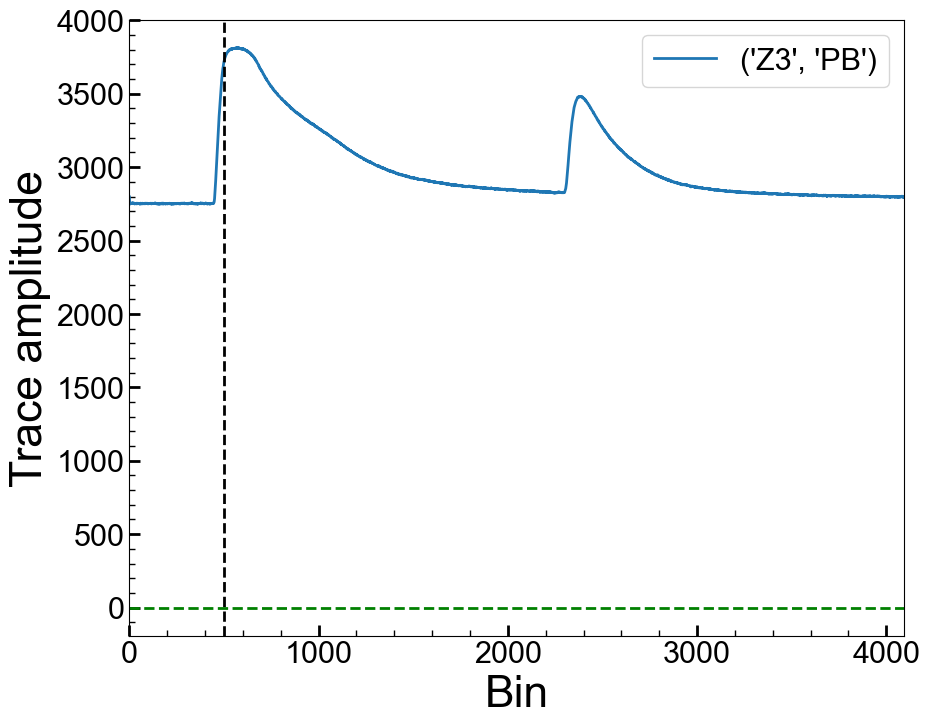

Series Number: 72209162200
Event Number: 580723
Energy: 19.11512774491 keV


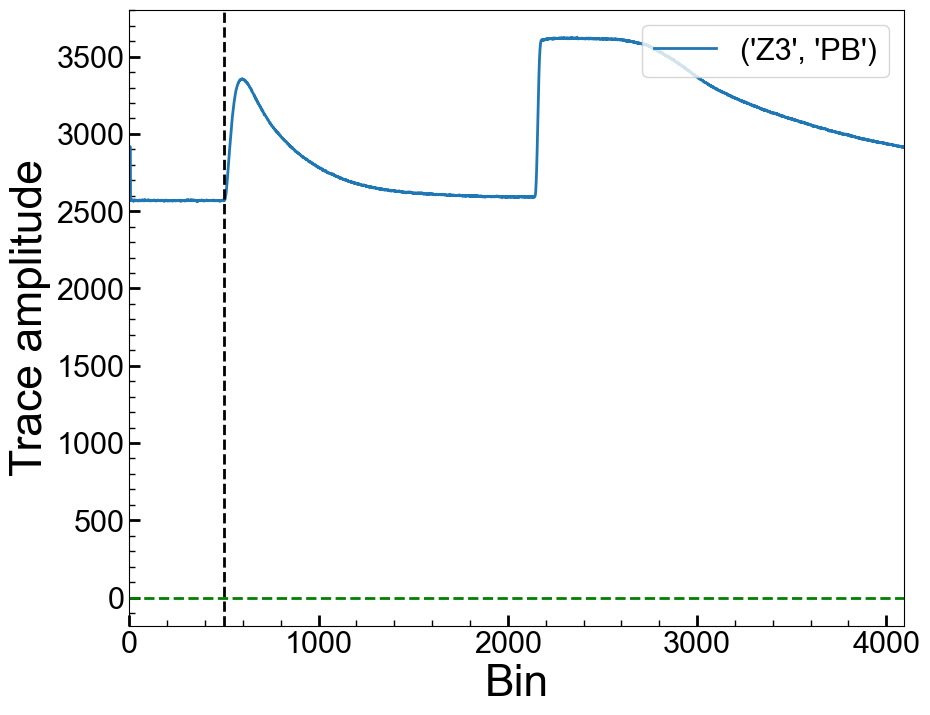

Series Number: 72209162200
Event Number: 590121
Energy: 22.66273398855 keV


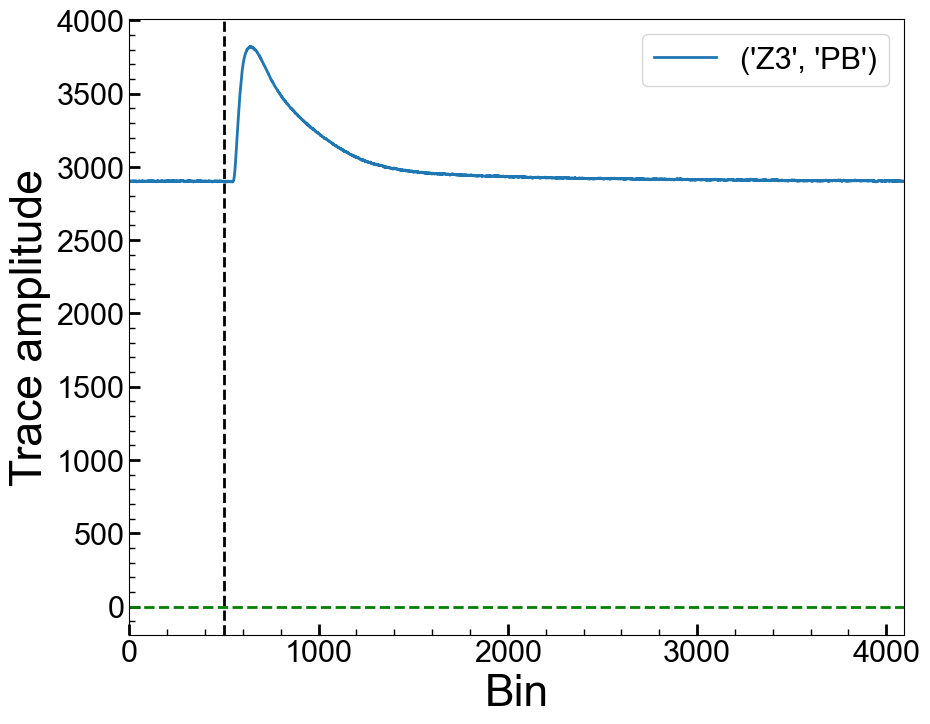

Series Number: 72209162200
Event Number: 610172
Energy: 3.526105521744 keV


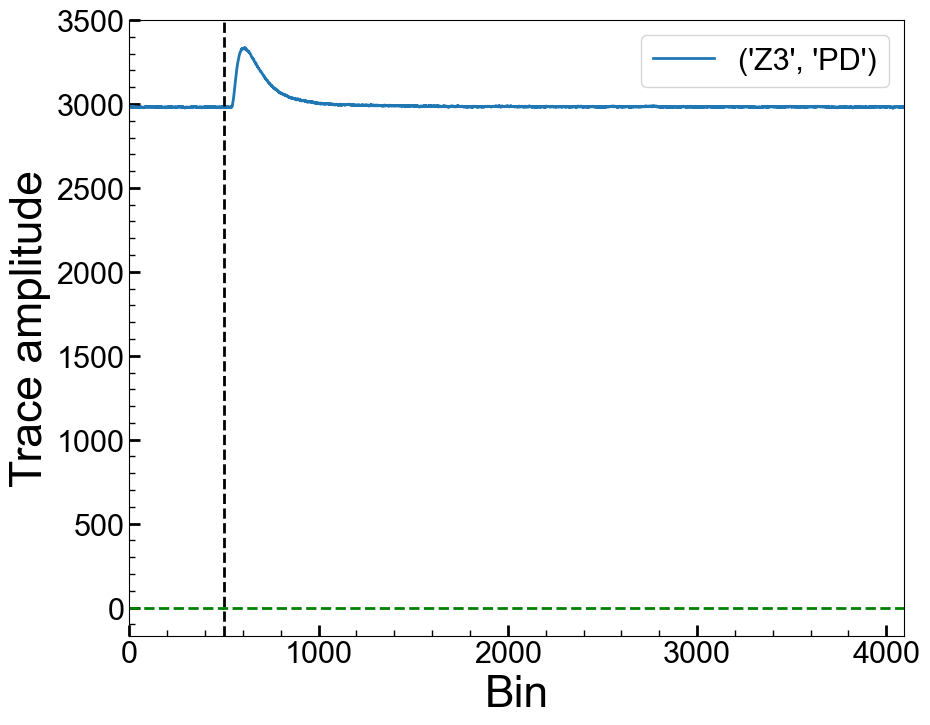

Series Number: 72209162200
Event Number: 610663
Energy: 48.12875529367 keV


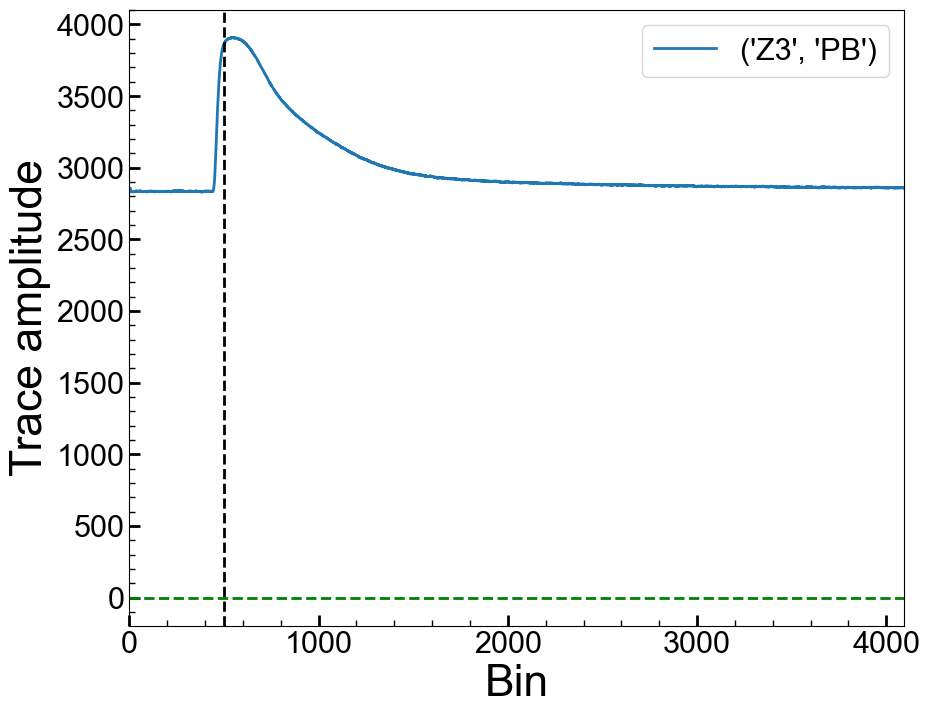

Series Number: 72209162200
Event Number: 610684
Energy: 20.76110622756 keV


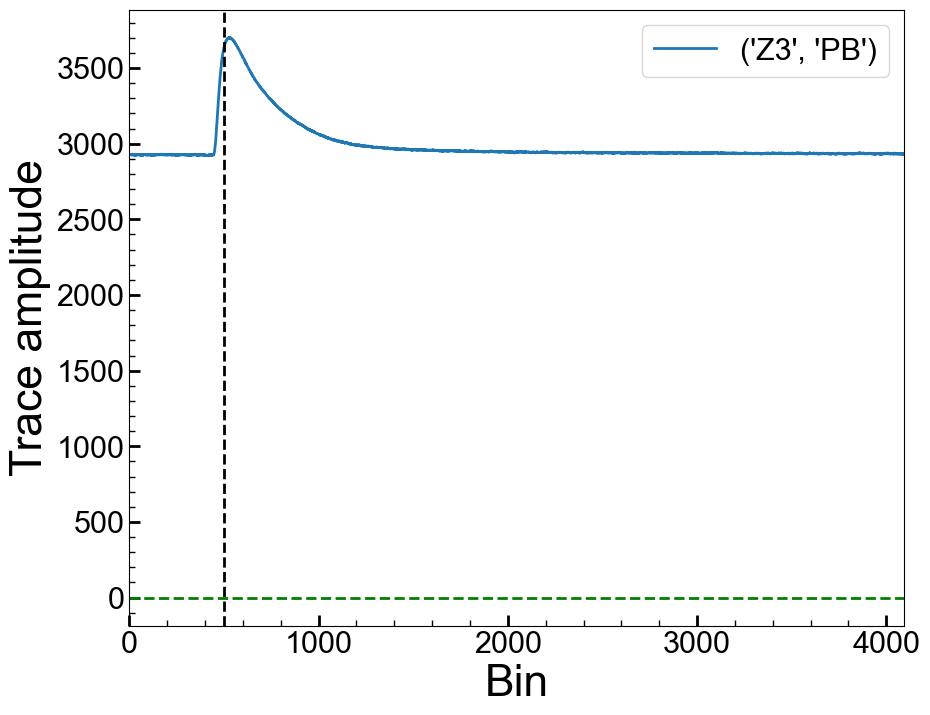

Series Number: 72209162200
Event Number: 640653
Energy: 10.43226269511 keV


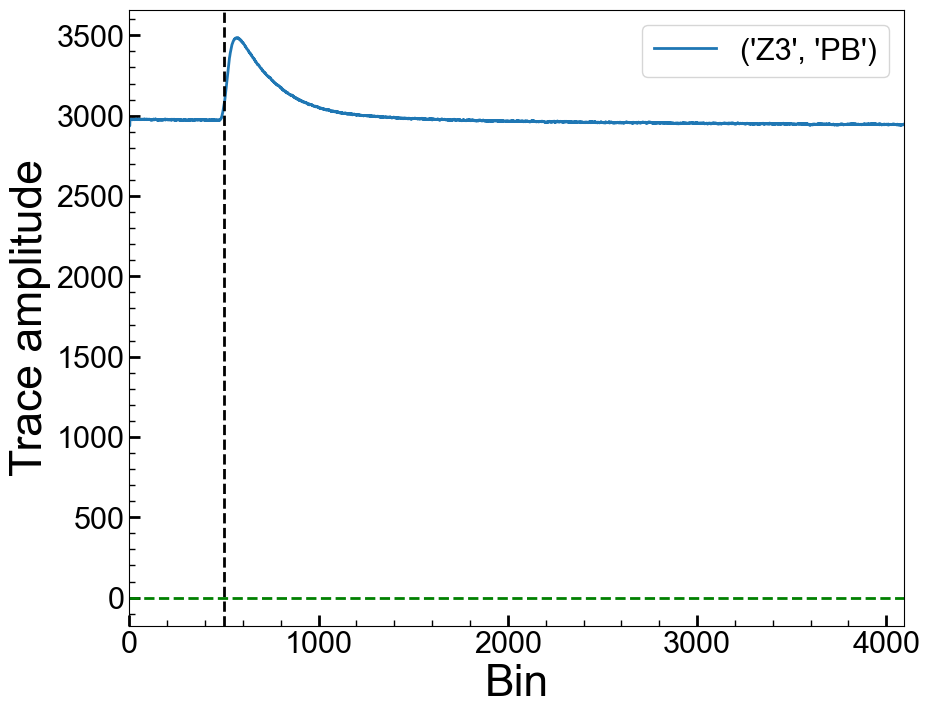

Series Number: 72209162200
Event Number: 650751
Energy: 27.58306035935 keV


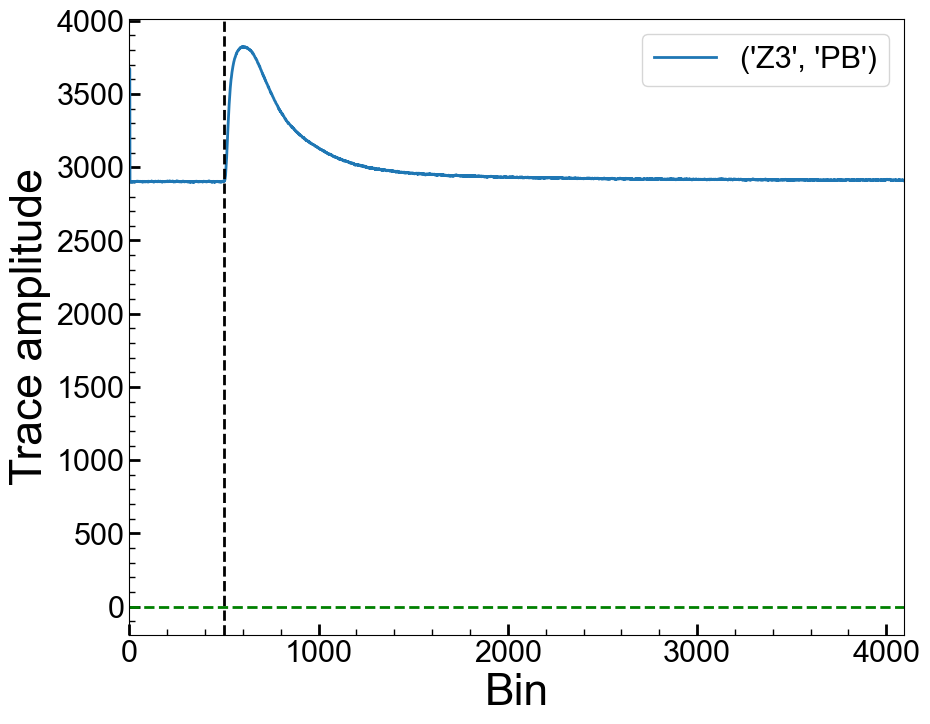

Series Number: 72209162200
Event Number: 670228
Energy: 33.94731111163 keV


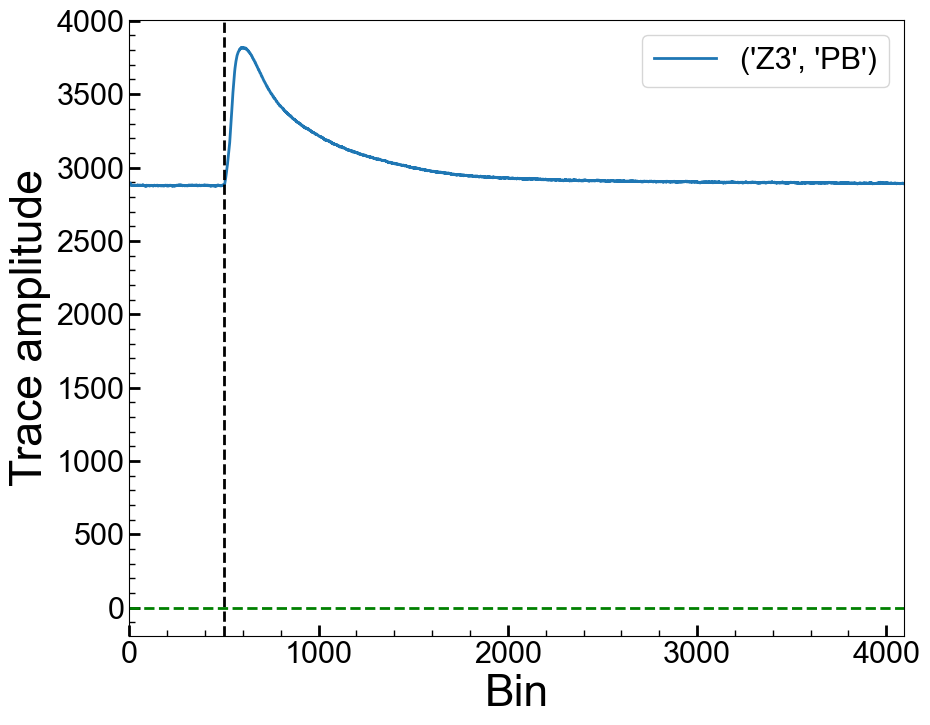

Series Number: 72209162200
Event Number: 670650
Energy: 2.05105148157 keV


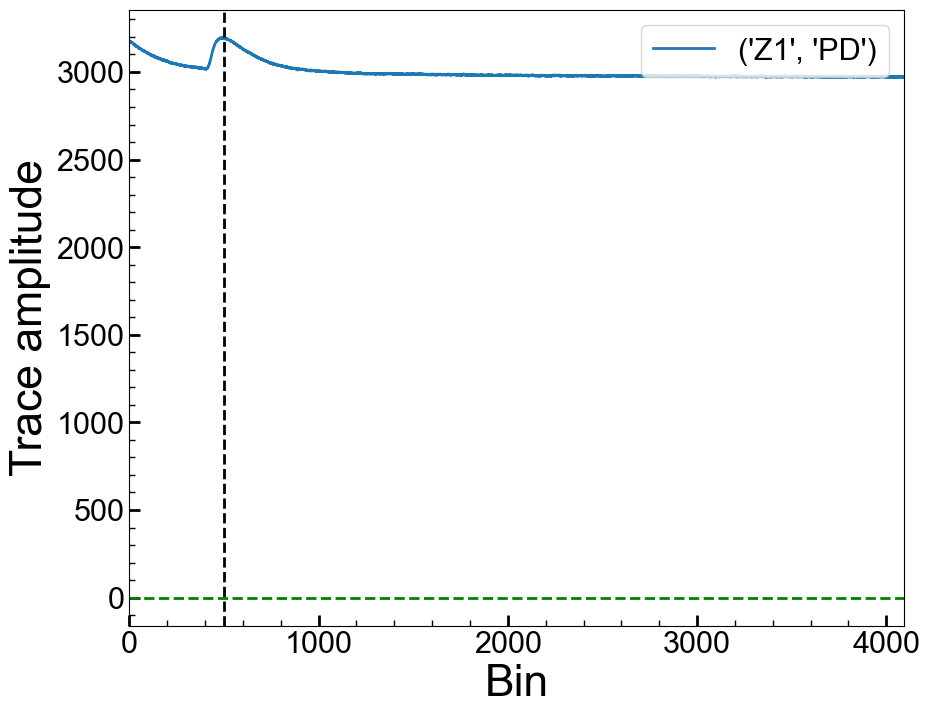

Series Number: 72209162200
Event Number: 690338
Energy: 19.22340418631 keV


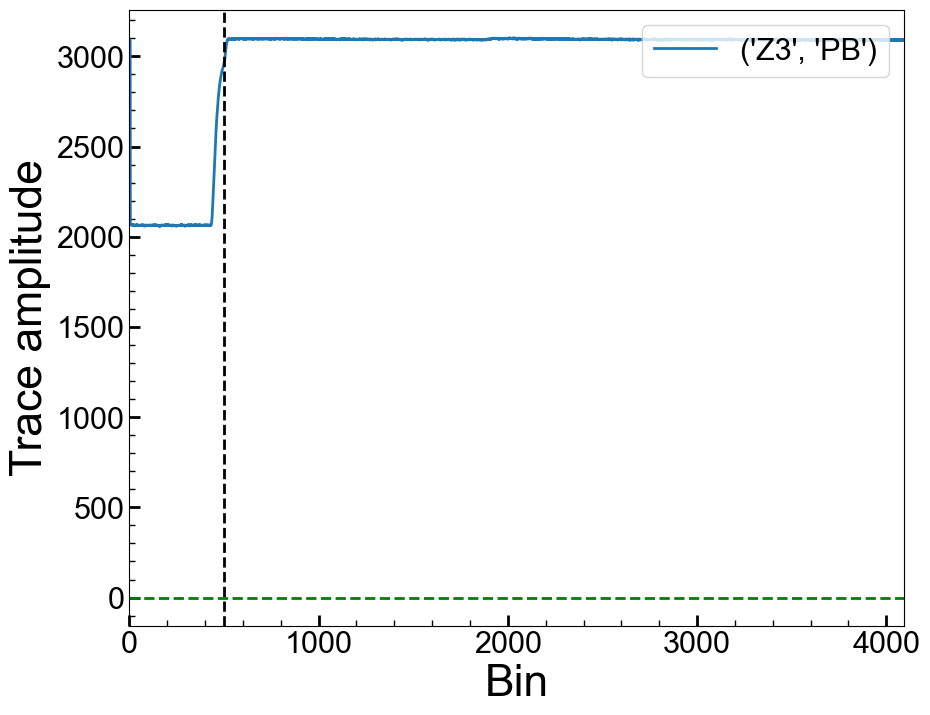

Series Number: 72209162200
Event Number: 710437
Energy: 34.6801839217 keV


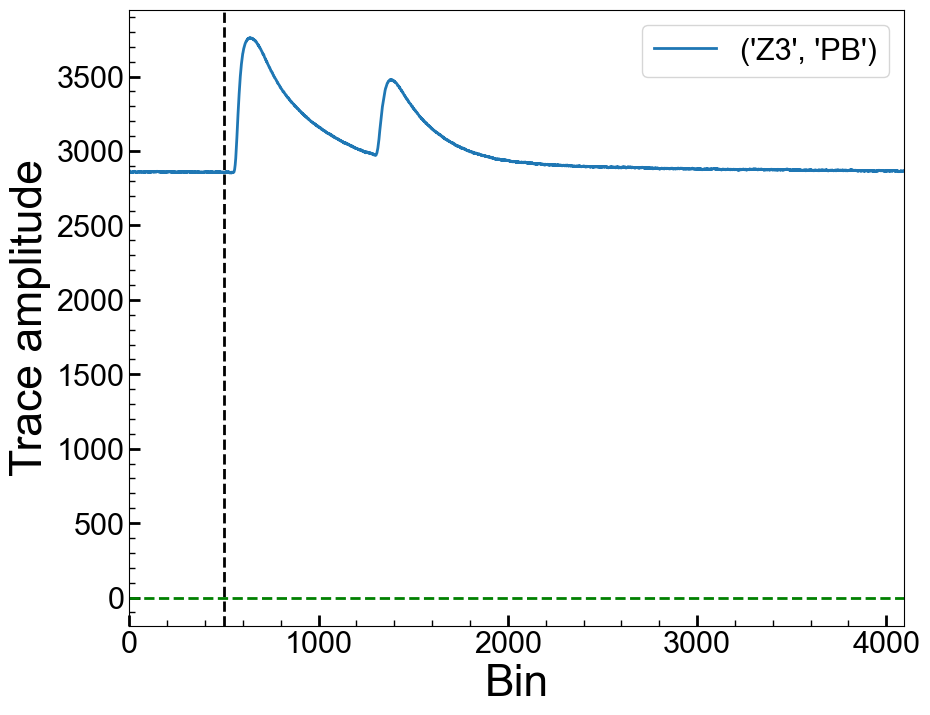

Series Number: 72209162200
Event Number: 740337
Energy: 6.359299905869 keV


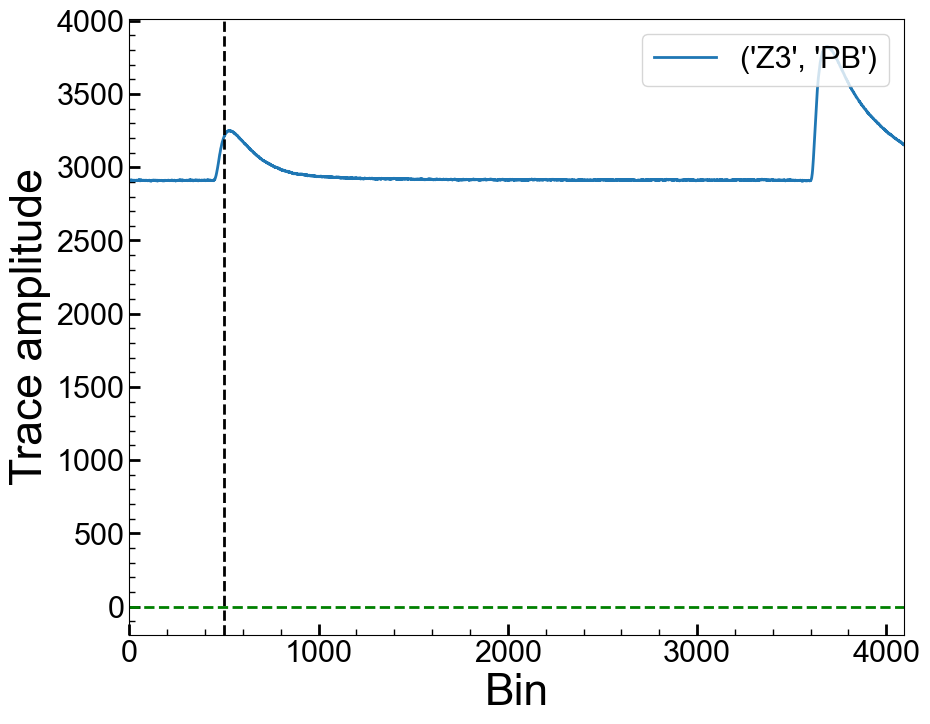

Series Number: 72209162200
Event Number: 750334
Energy: 7.153684944725 keV


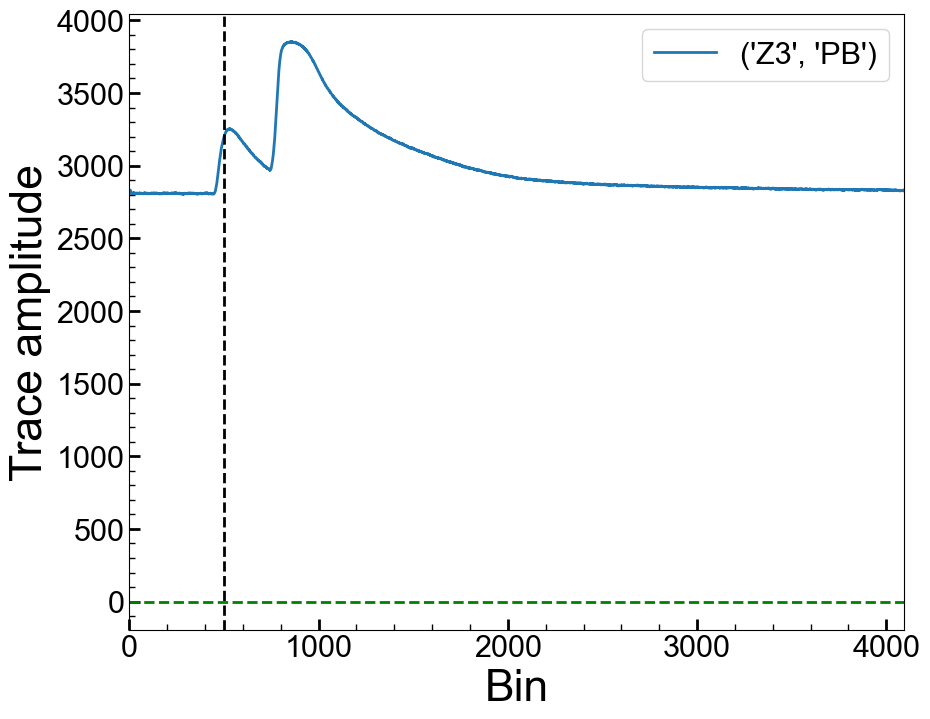

Series Number: 72209162200
Event Number: 750490
Energy: 35.87973899913 keV


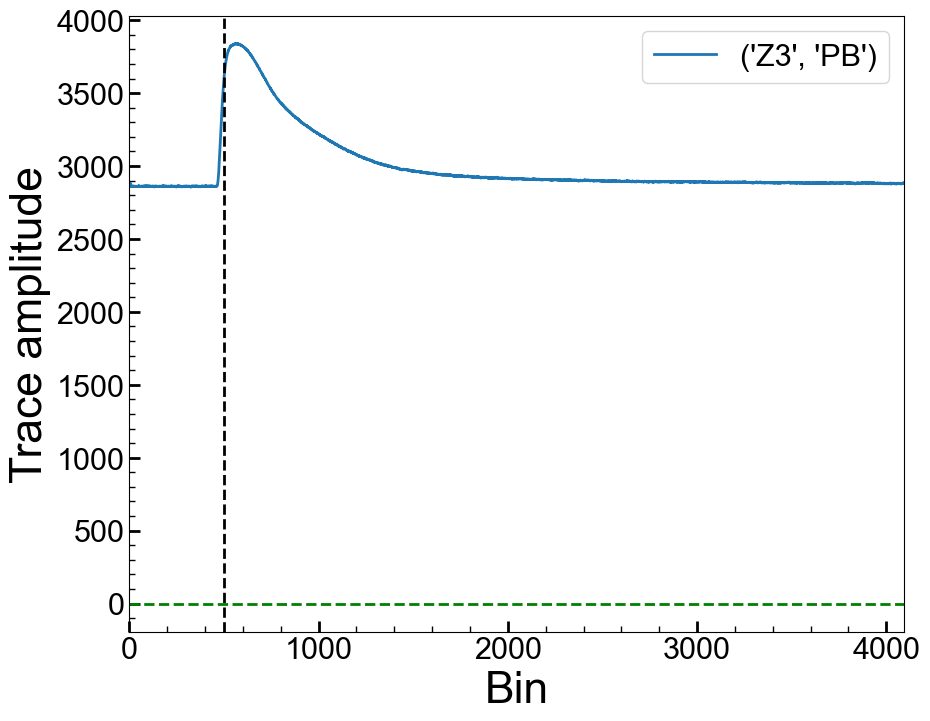

Series Number: 72209162200
Event Number: 760179
Energy: 28.46061439087 keV


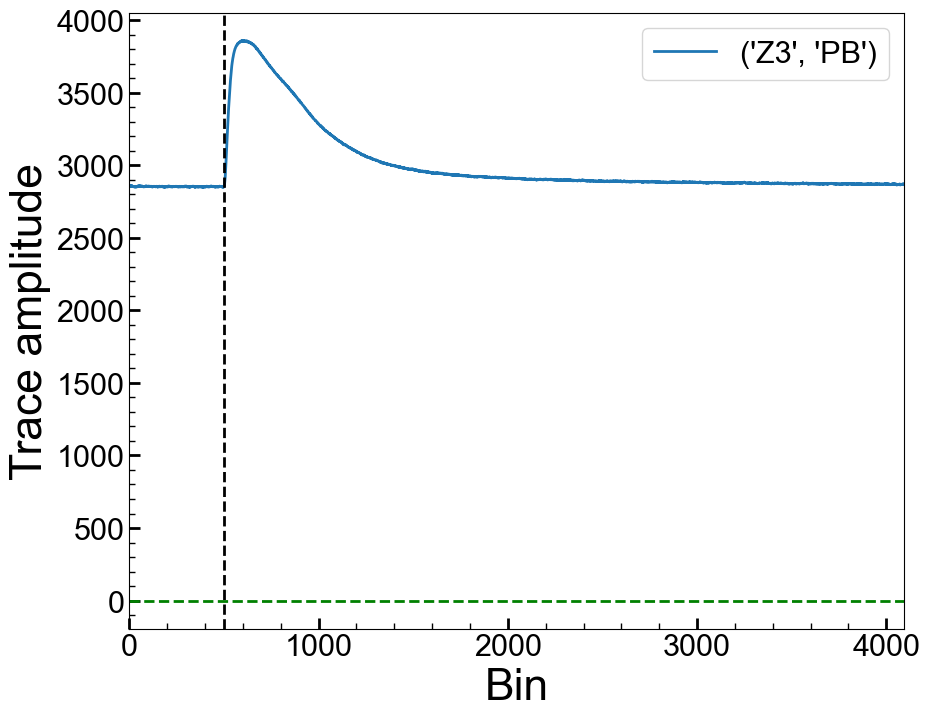

Series Number: 72209162200
Event Number: 770287
Energy: 46.97076571267 keV


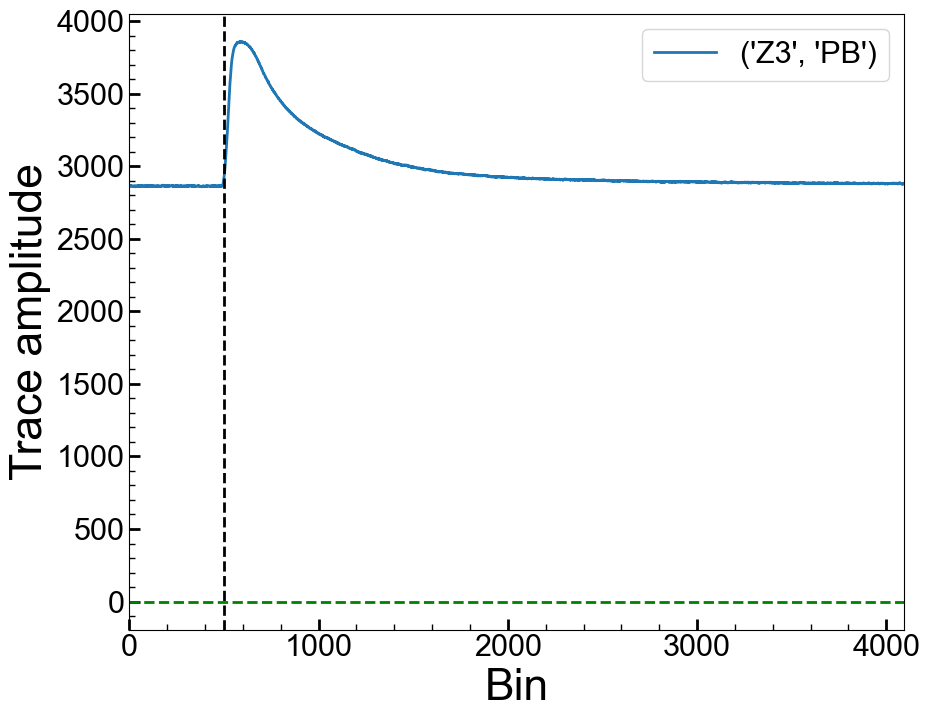

Series Number: 72209162200
Event Number: 780145
Energy: 19.11351039441 keV


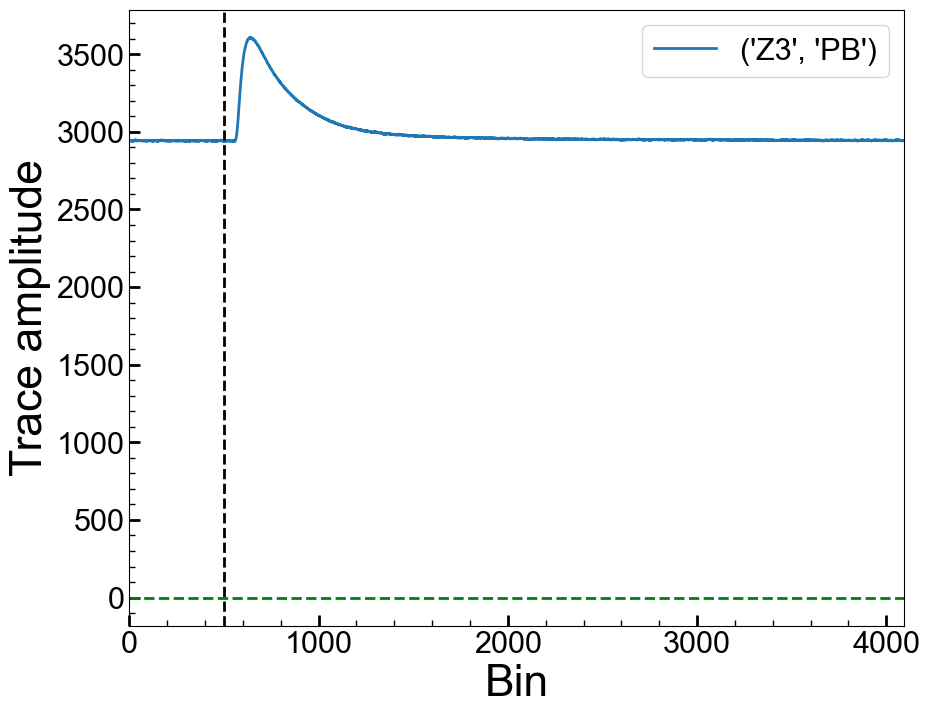

Series Number: 72209162200
Event Number: 780259
Energy: 42.96025814043 keV


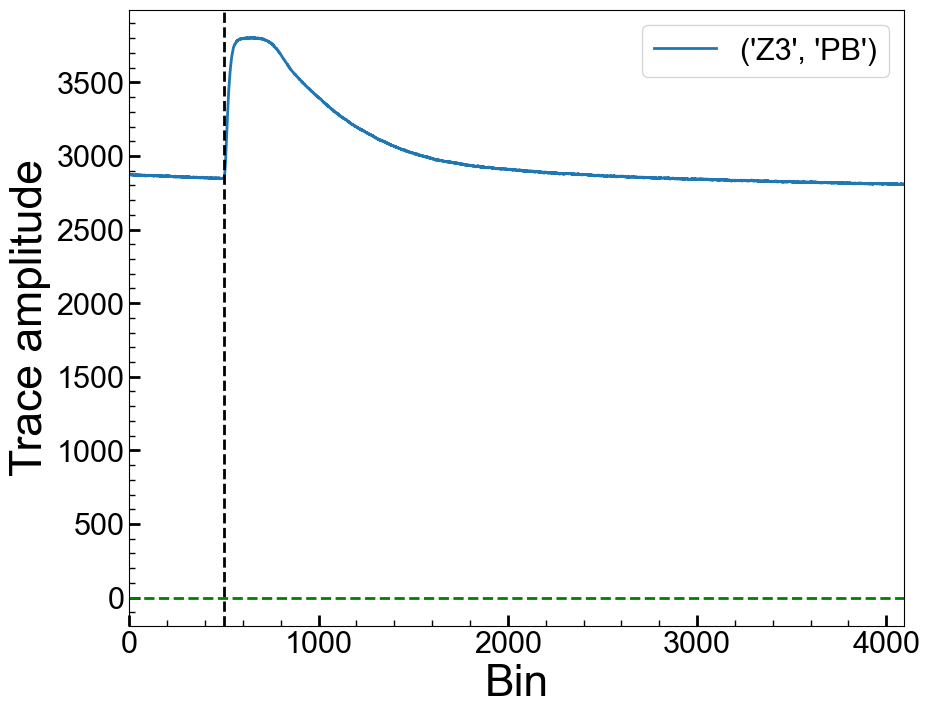

Series Number: 72209162200
Event Number: 780278
Energy: 29.04350339262 keV


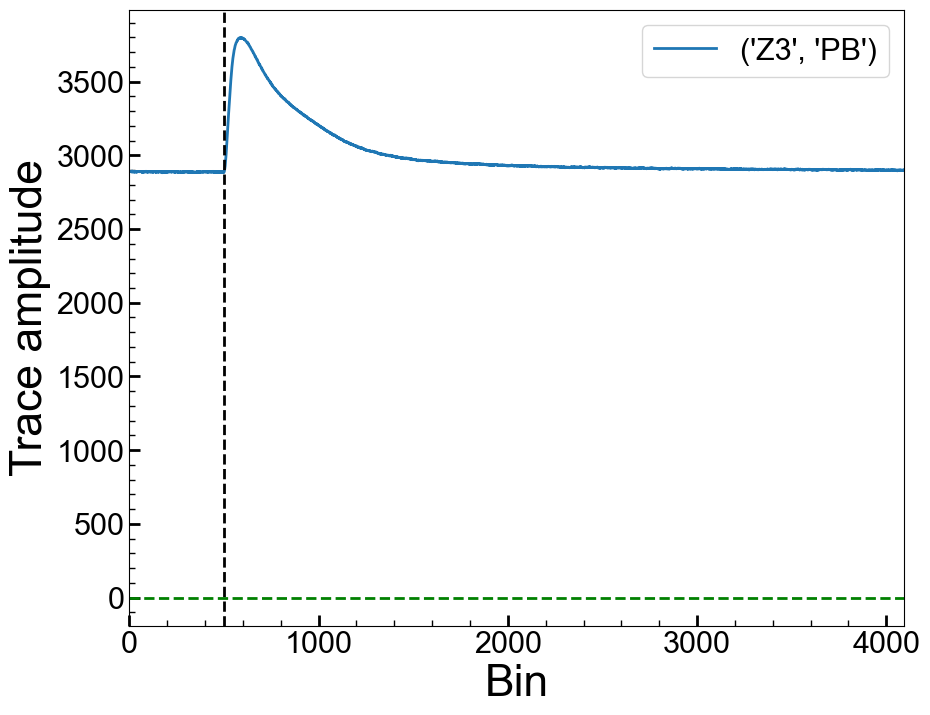

Series Number: 72209162200
Event Number: 780628
Energy: 39.48083097848 keV


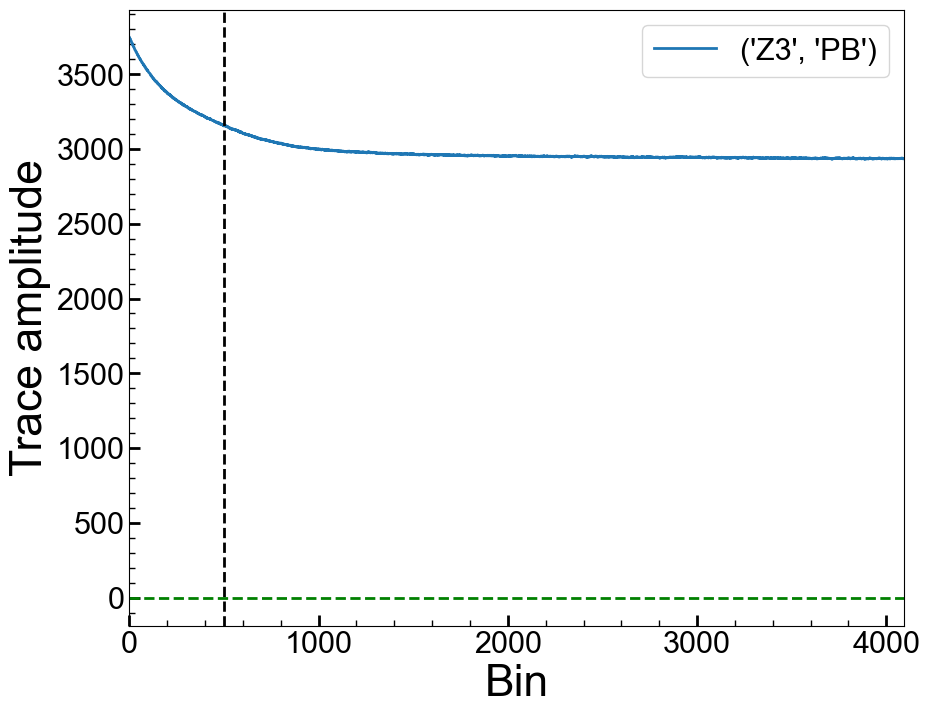

Series Number: 72209162200
Event Number: 800530
Energy: 16.18160476432 keV


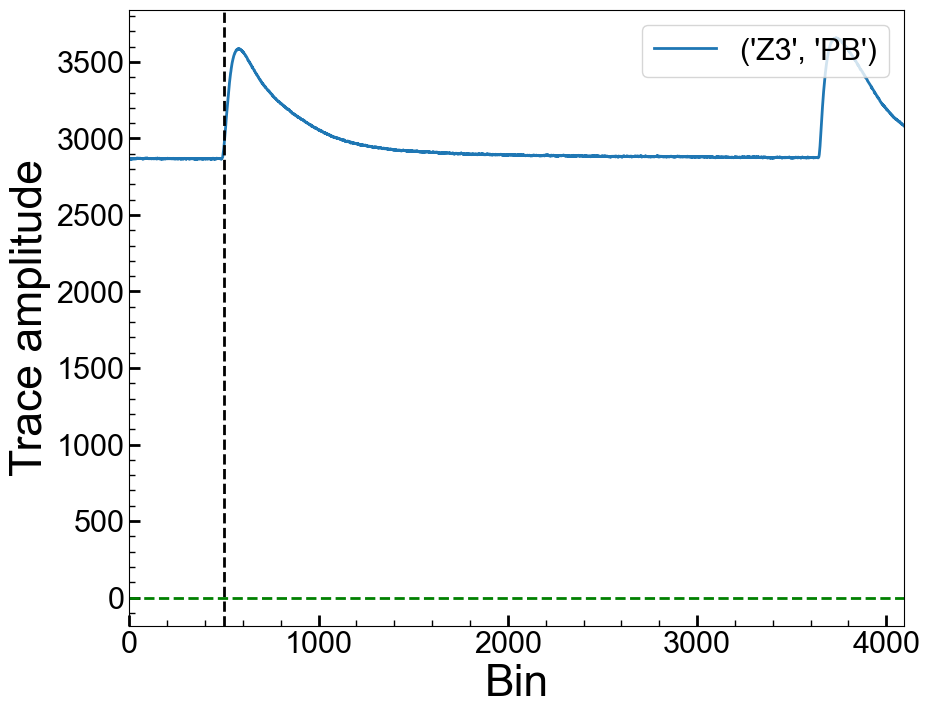

Series Number: 72209162200
Event Number: 810923
Energy: 28.05370719812 keV


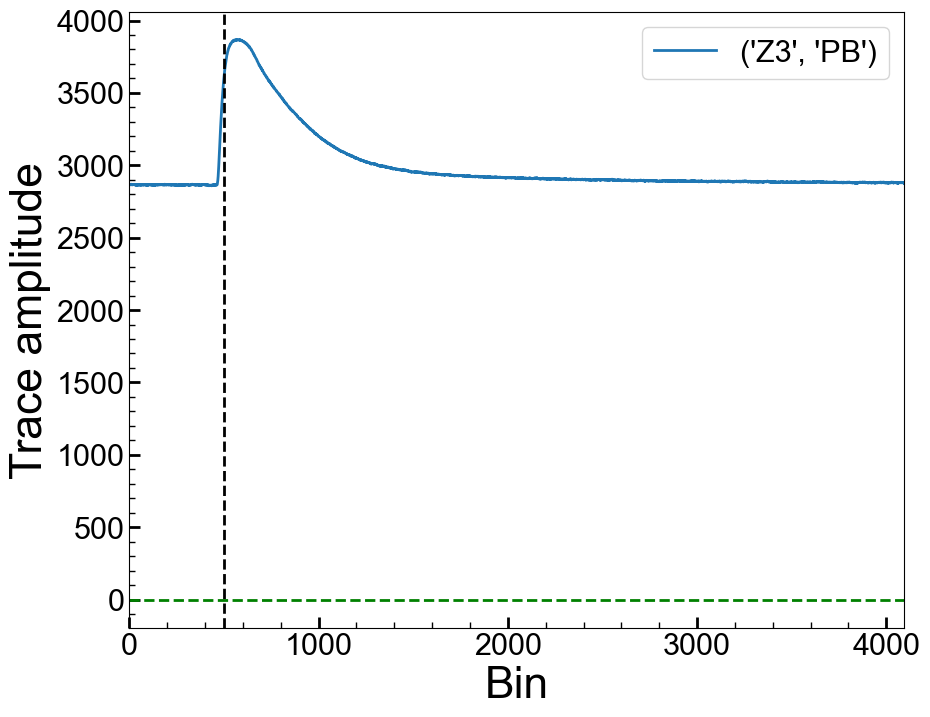

Series Number: 72209162200
Event Number: 820568
Energy: 25.58835179068 keV


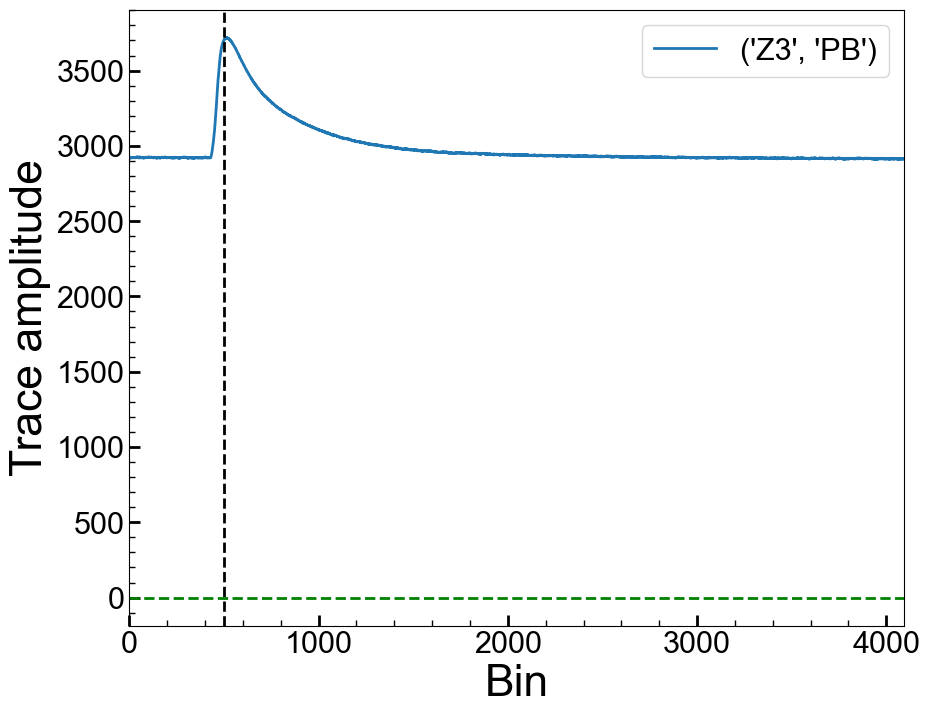

Series Number: 72209162200
Event Number: 840012
Energy: 12.26040462529 keV


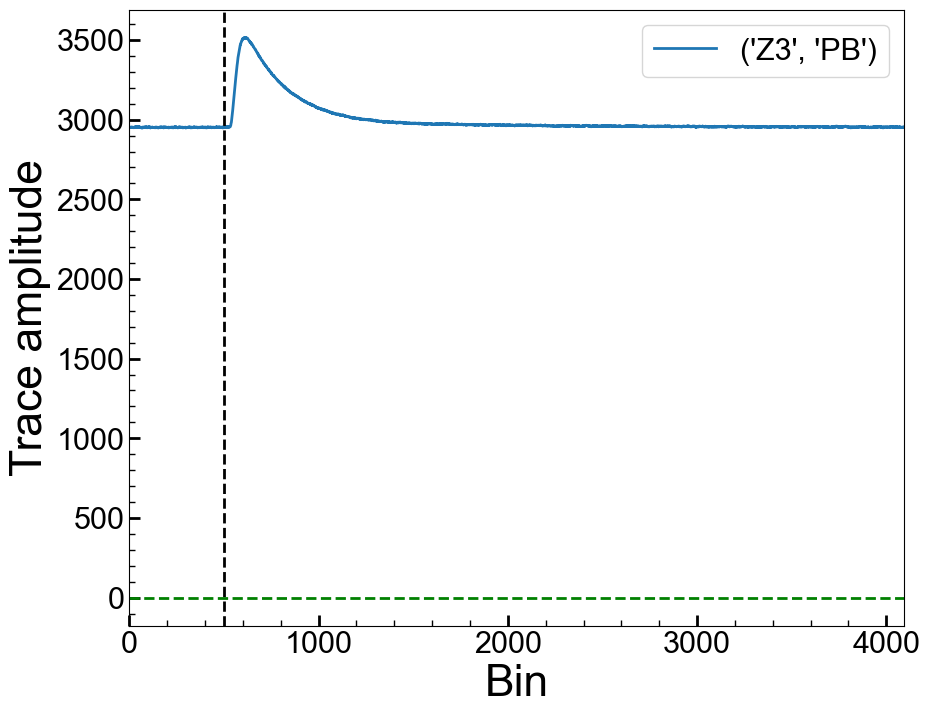

Series Number: 72209162200
Event Number: 840222
Energy: 39.03736453775 keV


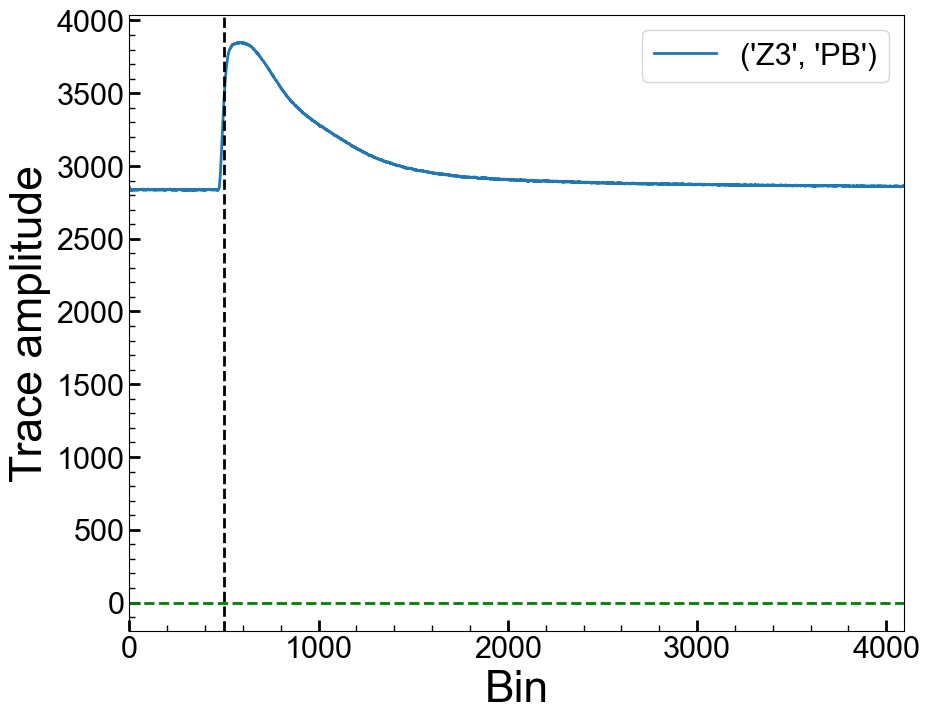

Series Number: 72209162200
Event Number: 850265
Energy: 28.29901818891 keV


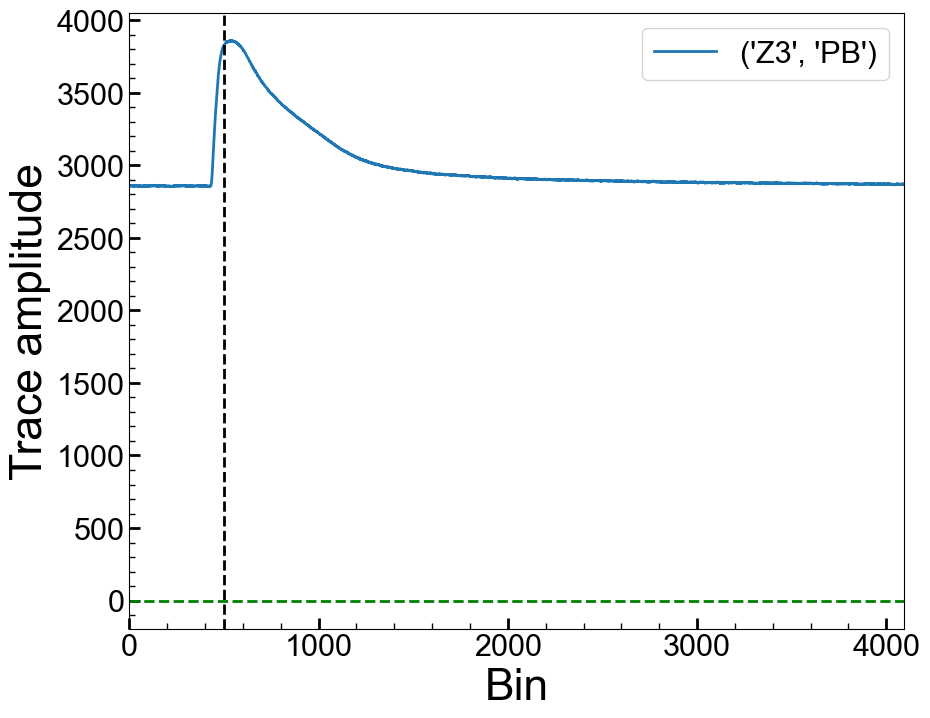

Series Number: 72209162200
Event Number: 860663
Energy: 28.96005894689 keV


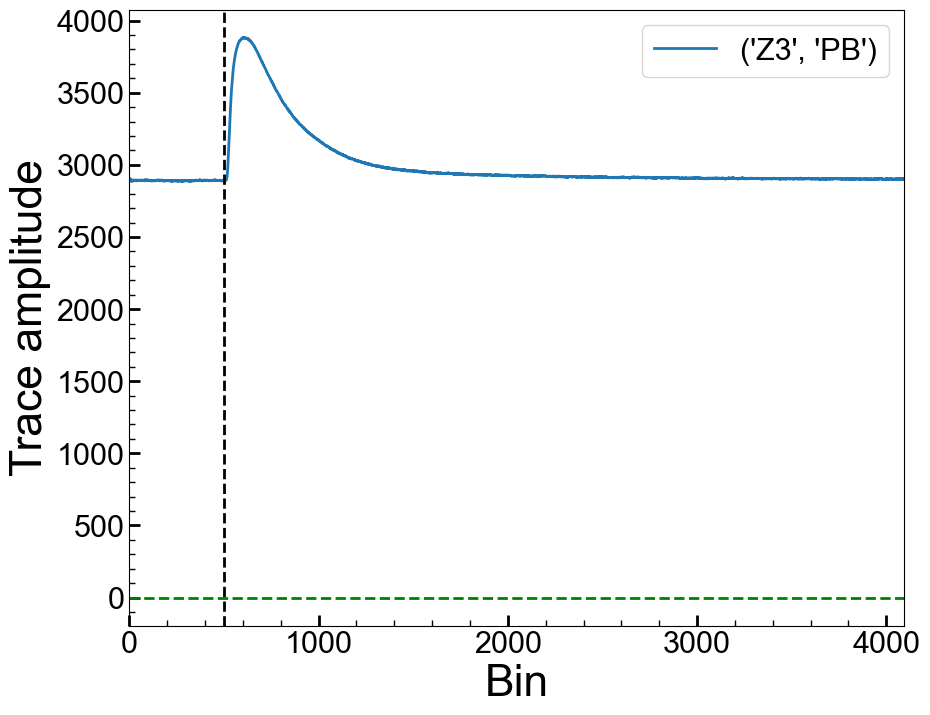

Series Number: 72209162200
Event Number: 880573
Energy: 47.92519769249 keV


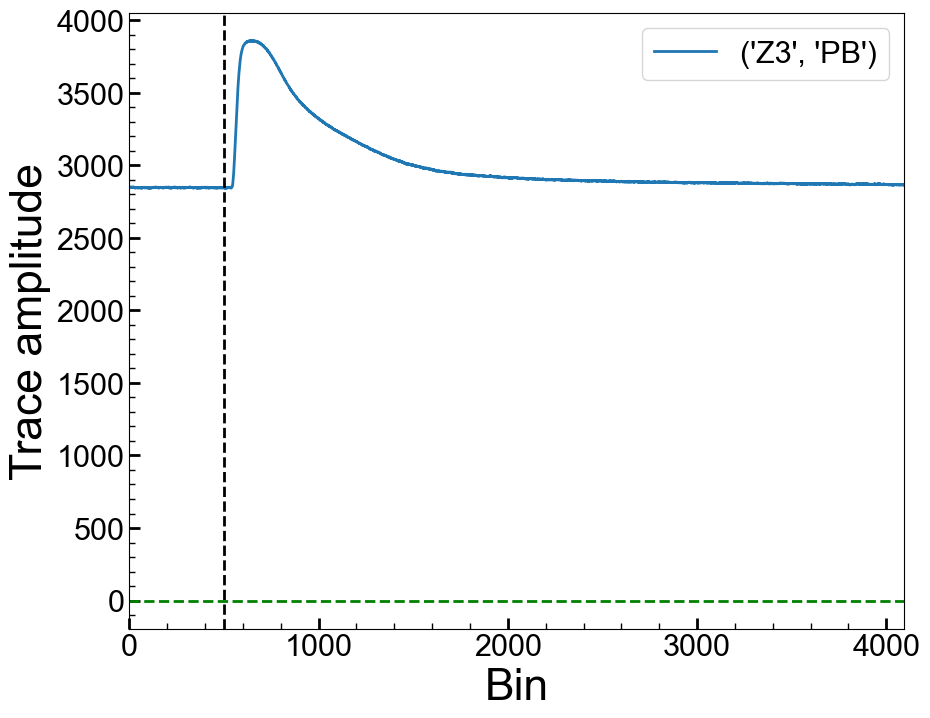

Series Number: 72209162200
Event Number: 880913
Energy: 19.42054788907 keV


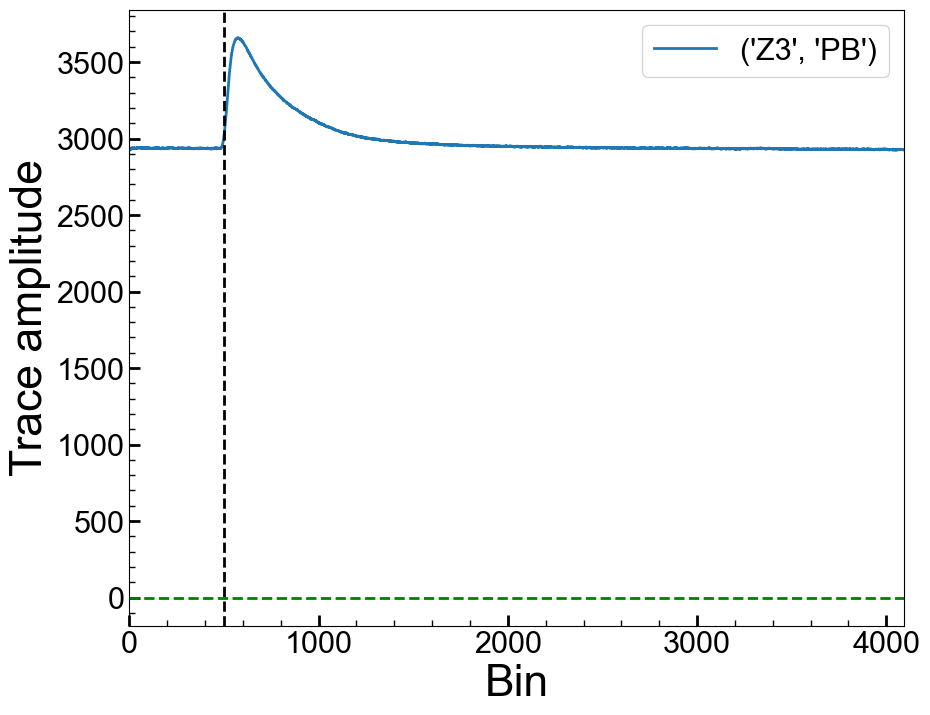

Series Number: 72209162200
Event Number: 910282
Energy: 49.57420649544 keV


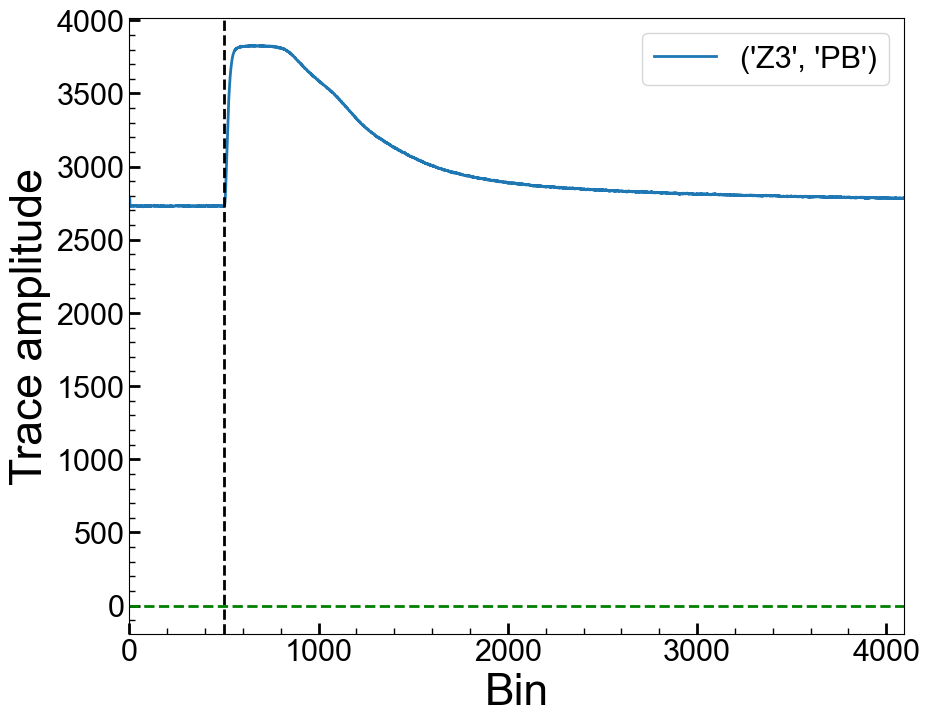

Series Number: 72209162200
Event Number: 920809
Energy: 2.677763066153 keV


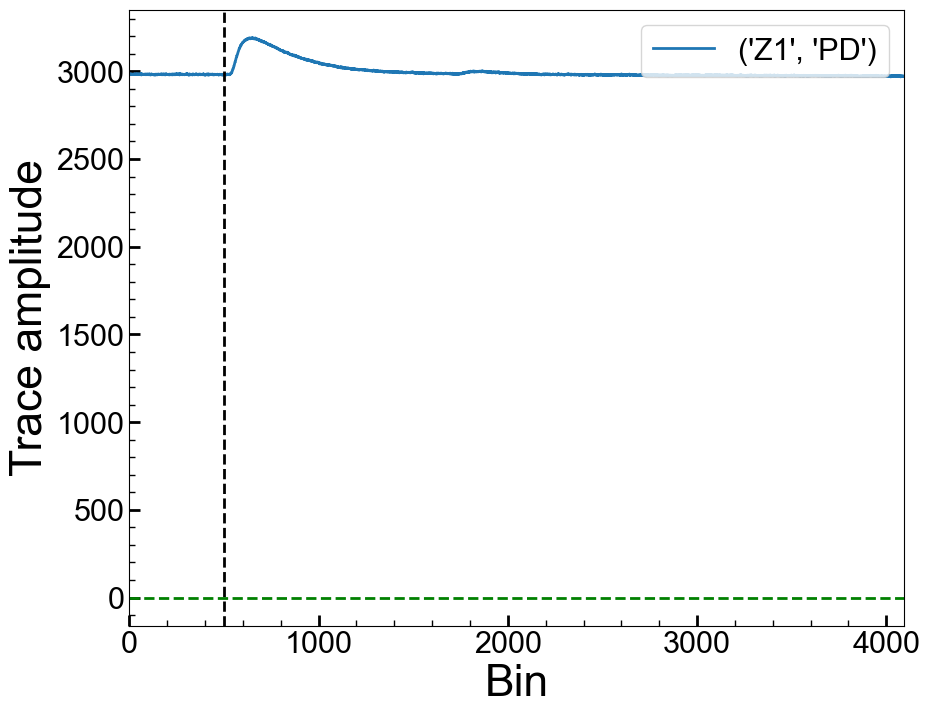

Series Number: 72209162200
Event Number: 920948
Energy: 3.558577288045 keV


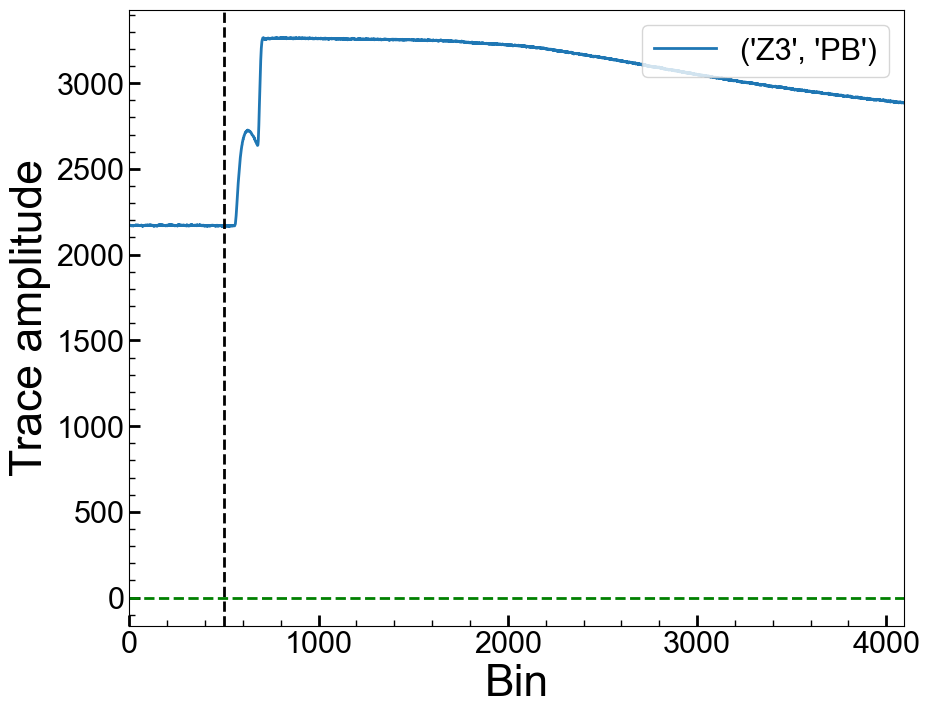

Series Number: 72209162200
Event Number: 930239
Energy: 20.01647378765 keV


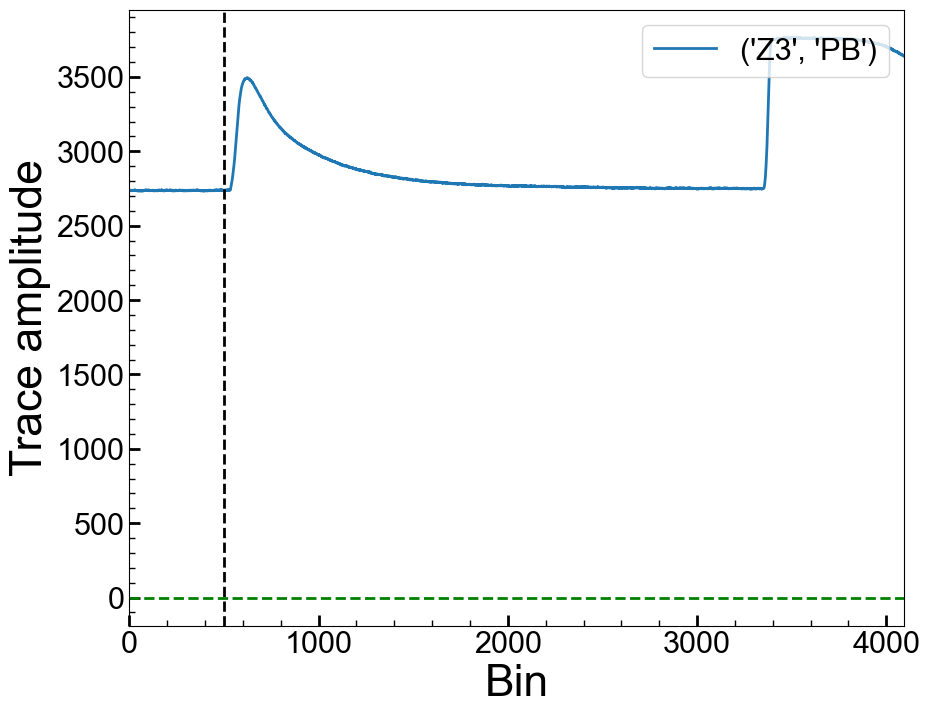

Series Number: 72209162200
Event Number: 930872
Energy: 35.66536743006 keV


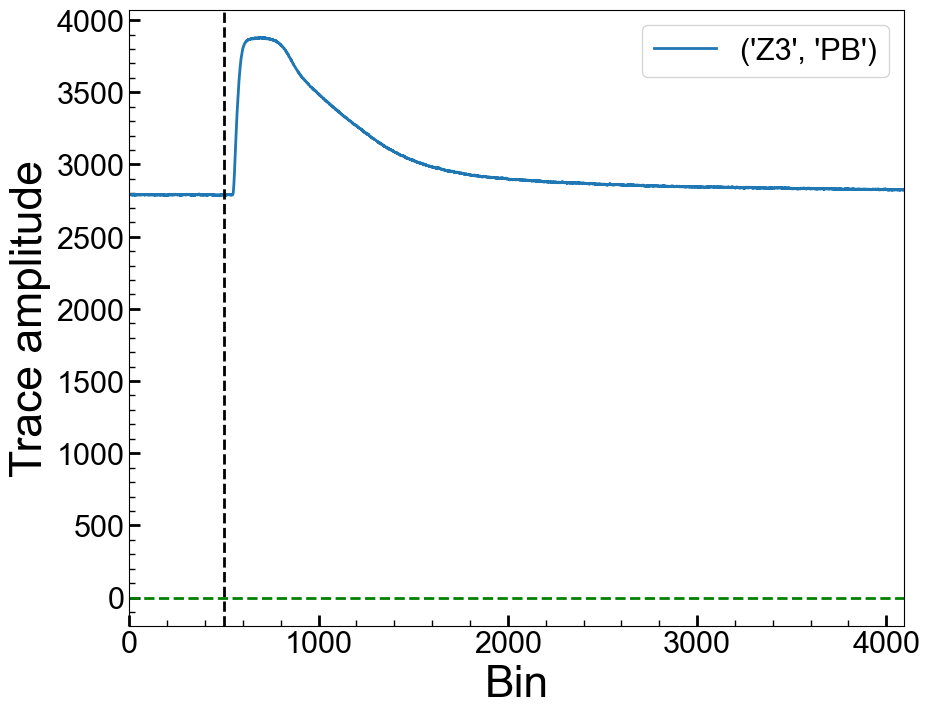

Series Number: 72209162200
Event Number: 940631
Energy: 18.33925808424 keV


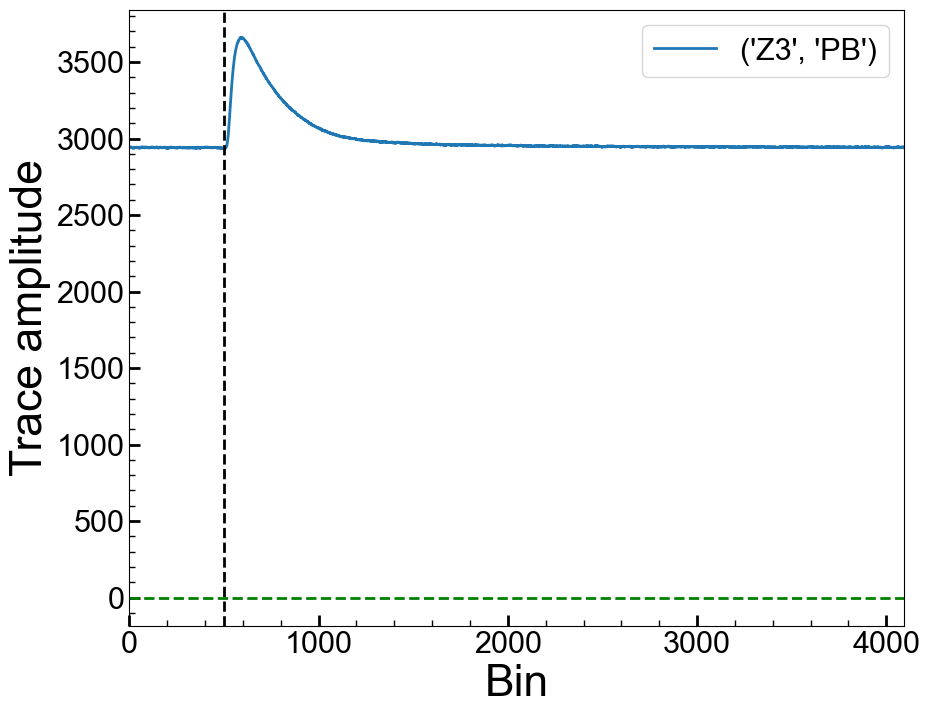

Series Number: 72209162200
Event Number: 950888
Energy: 49.94454468638 keV


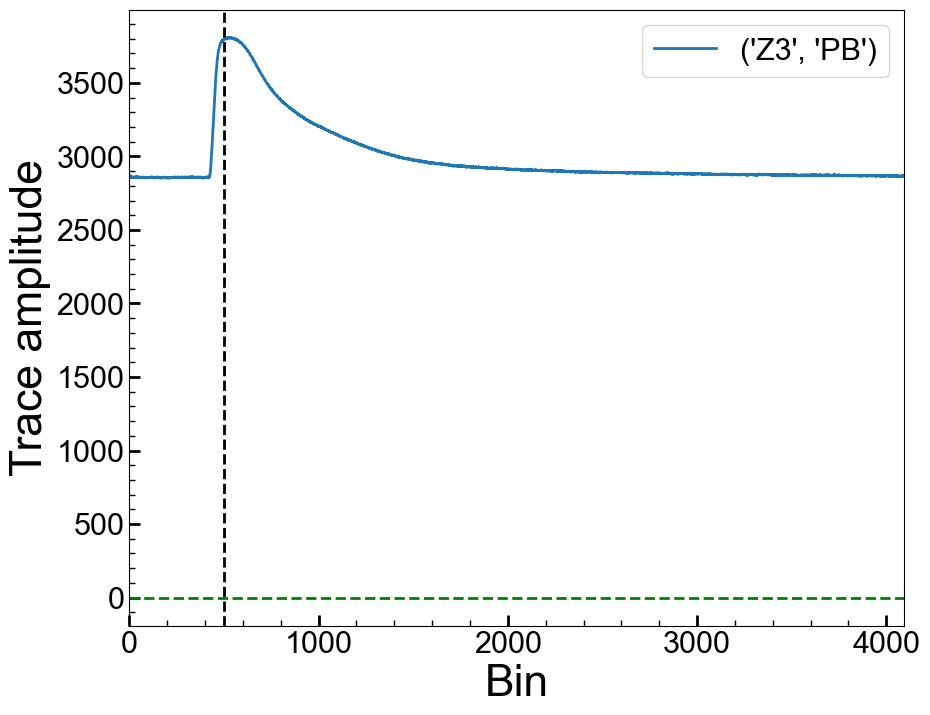

Series Number: 72209162200
Event Number: 960920
Energy: 44.04910447711 keV


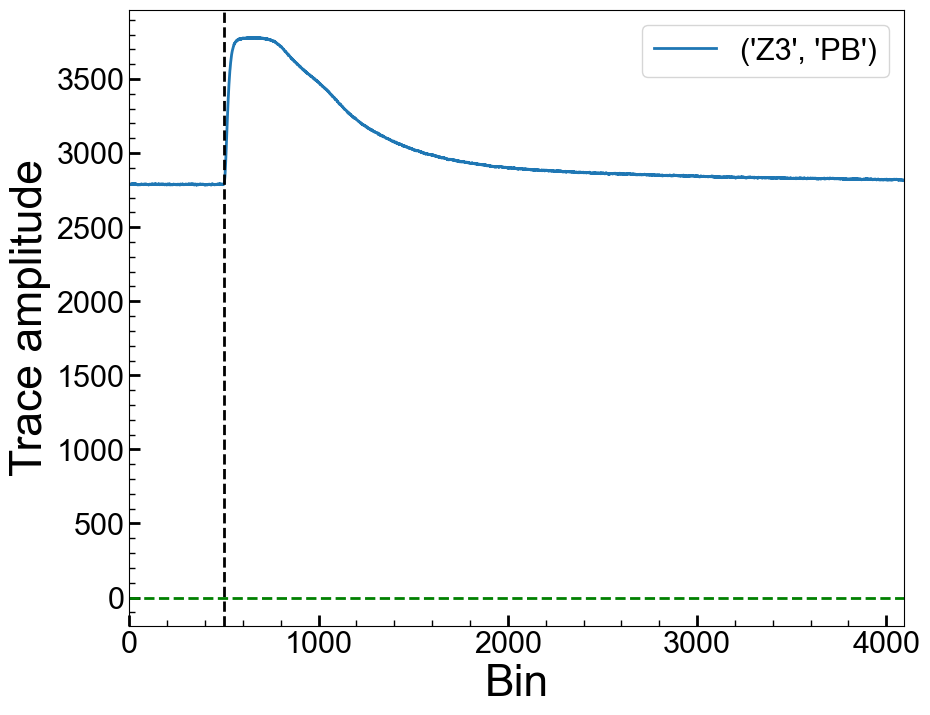

Series Number: 72209162200
Event Number: 970767
Energy: 47.91986636021 keV


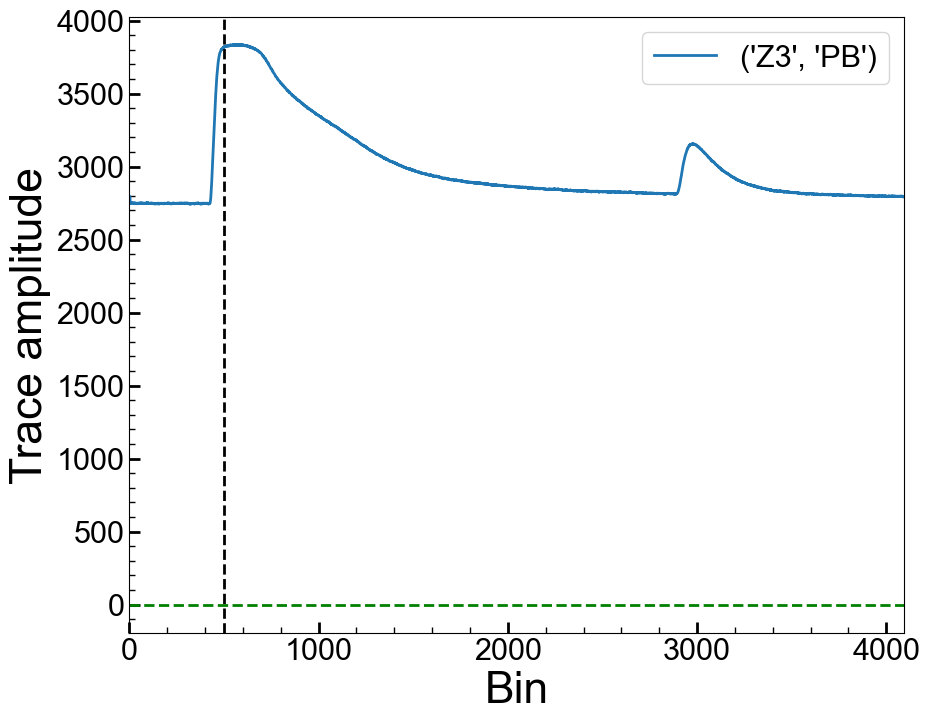

Series Number: 72209162200
Event Number: 1000241
Energy: 22.05356716962 keV


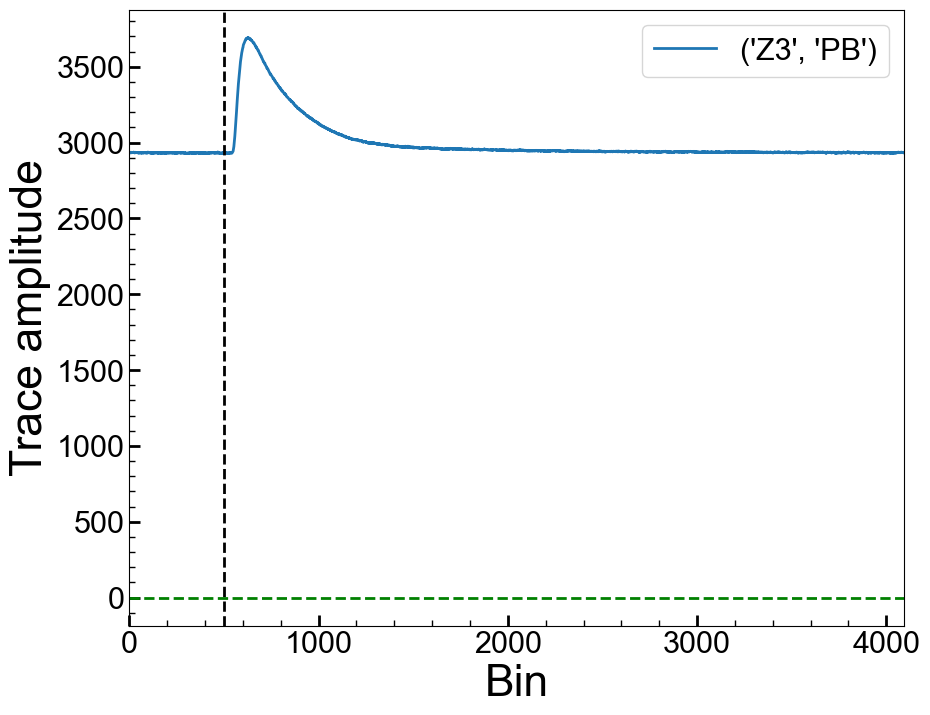

Series Number: 72209162200
Event Number: 1040569
Energy: 2.157513697256 keV


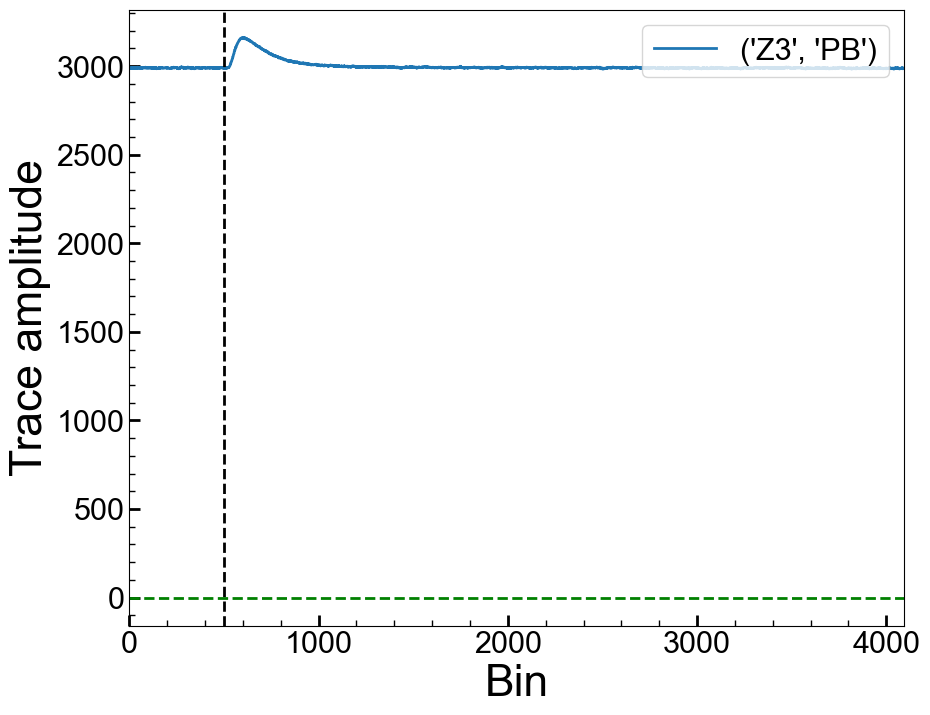

Series Number: 72209162200
Event Number: 1050223
Energy: 16.92261873535 keV


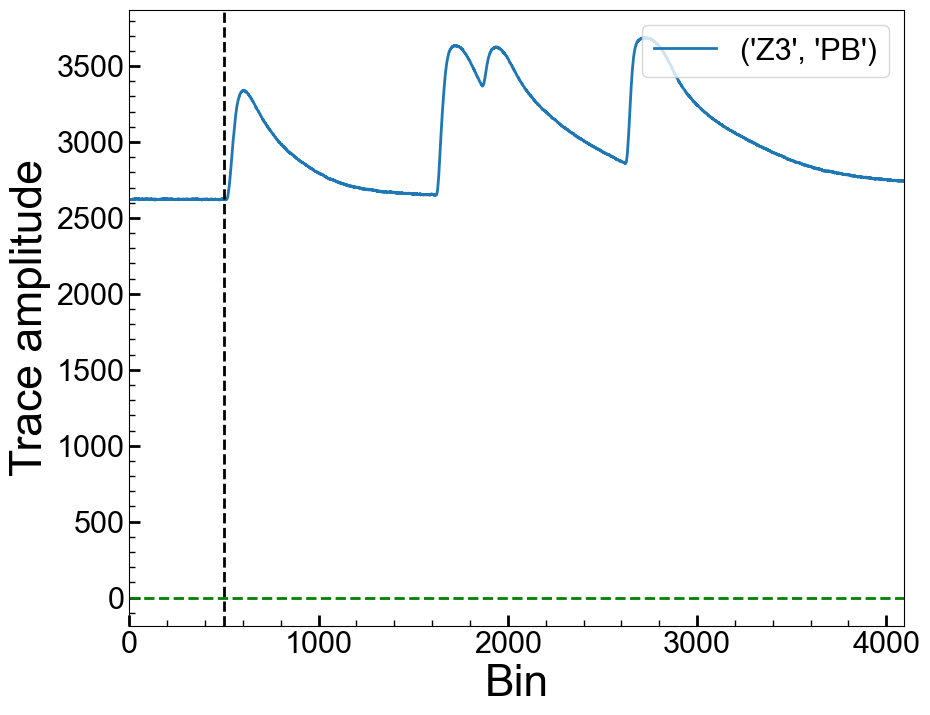

Series Number: 72209162200
Event Number: 1050803
Energy: 27.51943116817 keV


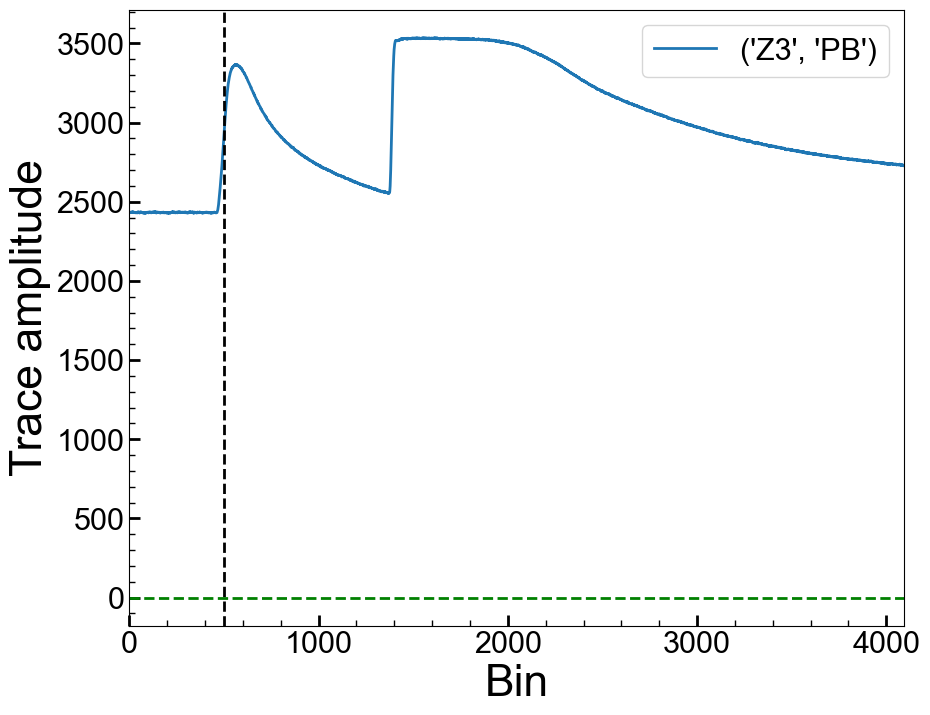

Series Number: 72209162200
Event Number: 1060435
Energy: 9.602936728145 keV


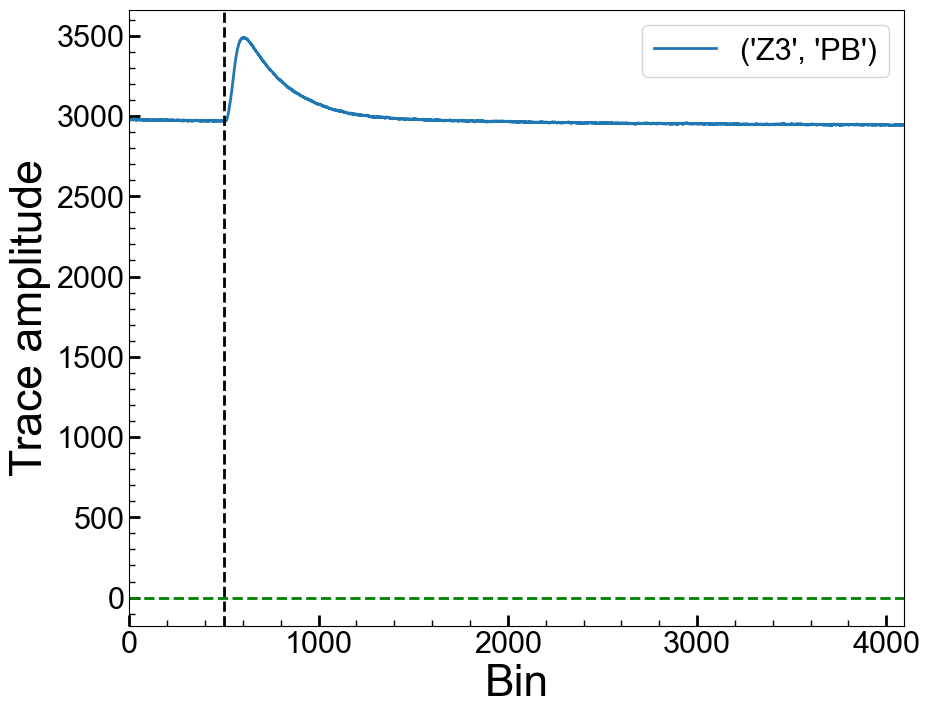

Series Number: 72209162200
Event Number: 1060589
Energy: 46.60446373323 keV


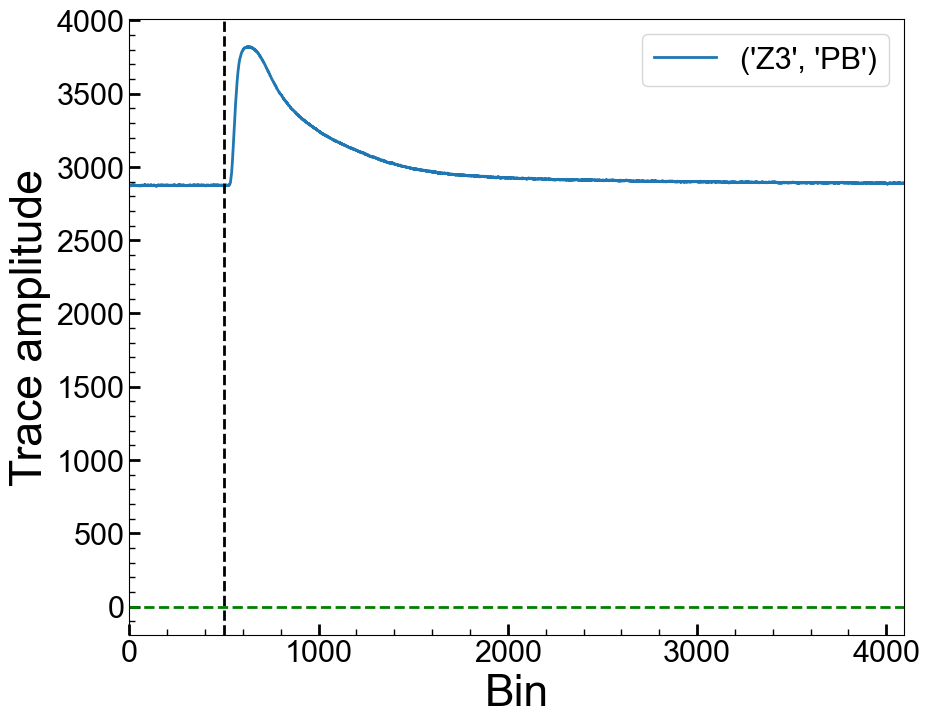

Series Number: 72209162200
Event Number: 1070509
Energy: 47.55945117602 keV


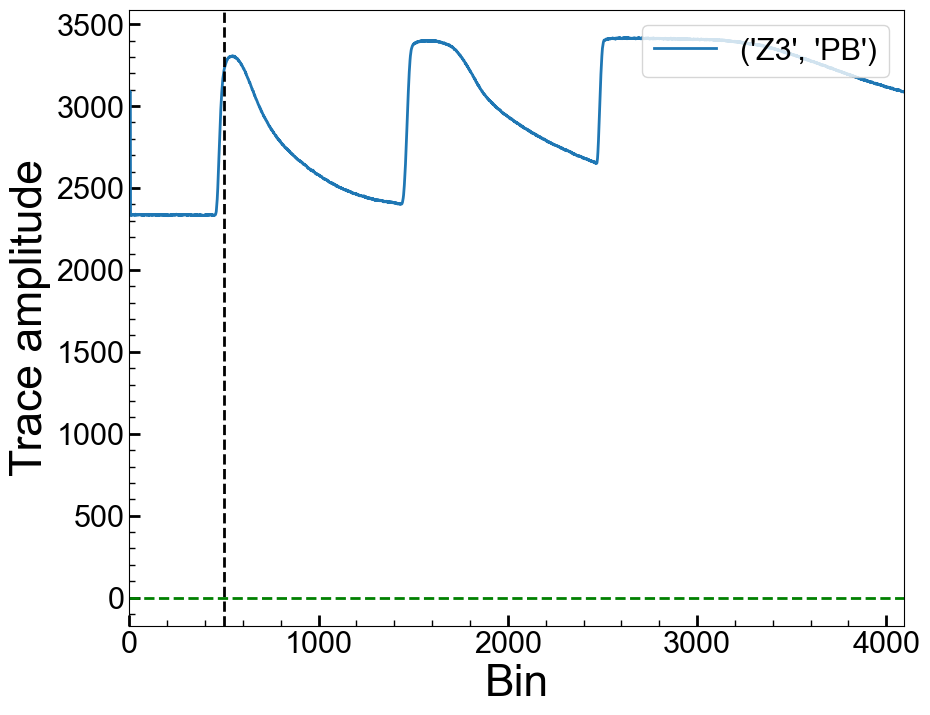

Series Number: 72209162200
Event Number: 1080401
Energy: 44.51165262551 keV


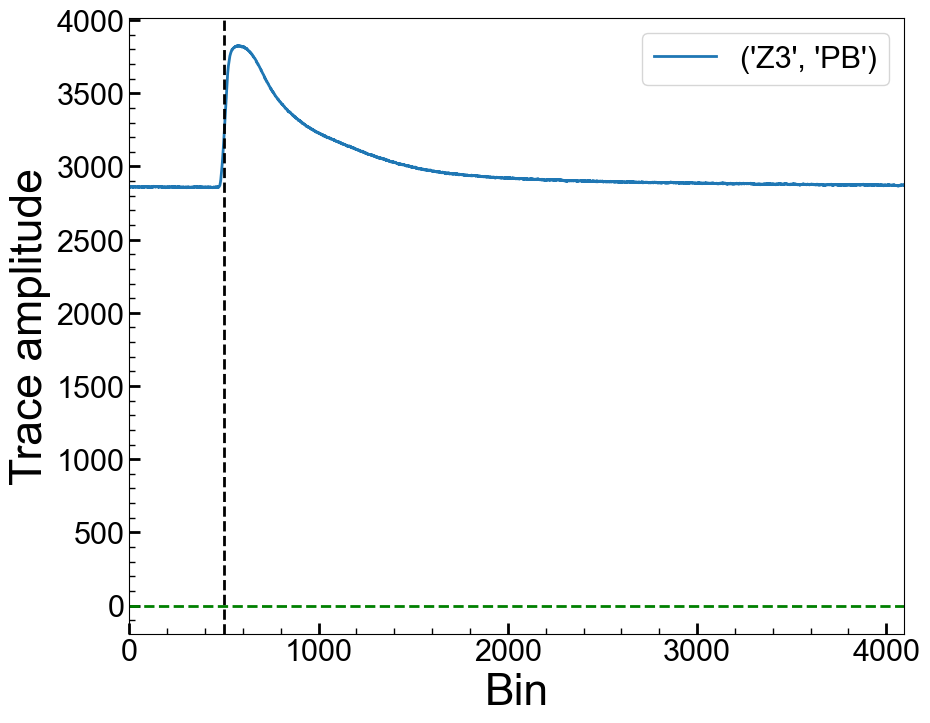

Series Number: 72209162200
Event Number: 1090346
Energy: 21.57210275566 keV


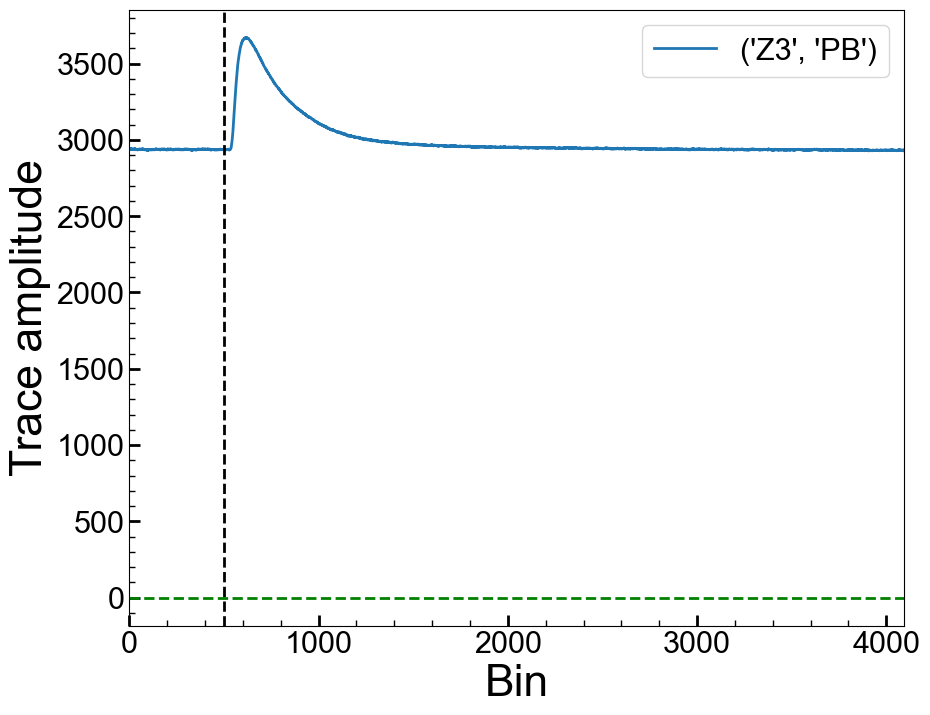

Series Number: 72209162200
Event Number: 1090619
Energy: 15.41245470353 keV


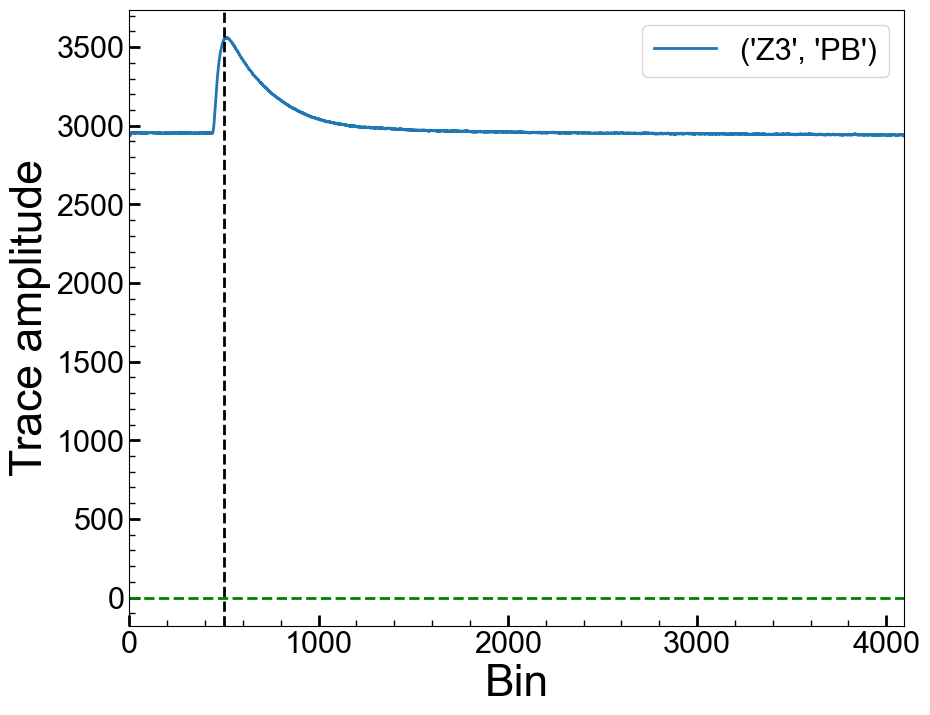

Series Number: 72209162200
Event Number: 1090622
Energy: 24.2451915796 keV


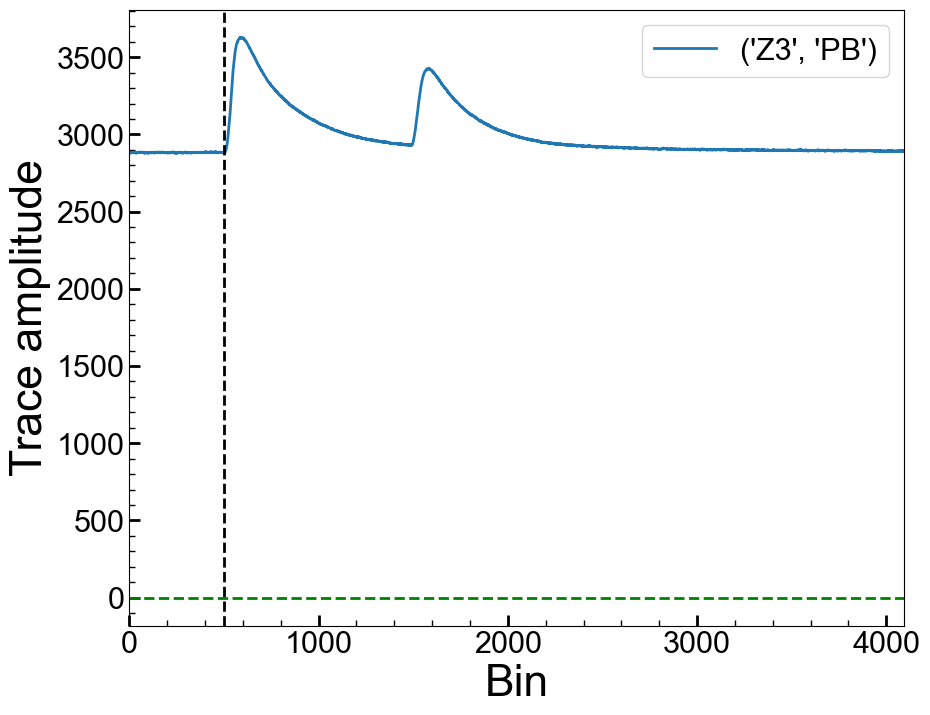

Series Number: 72209162200
Event Number: 1100492
Energy: 12.69641815982 keV


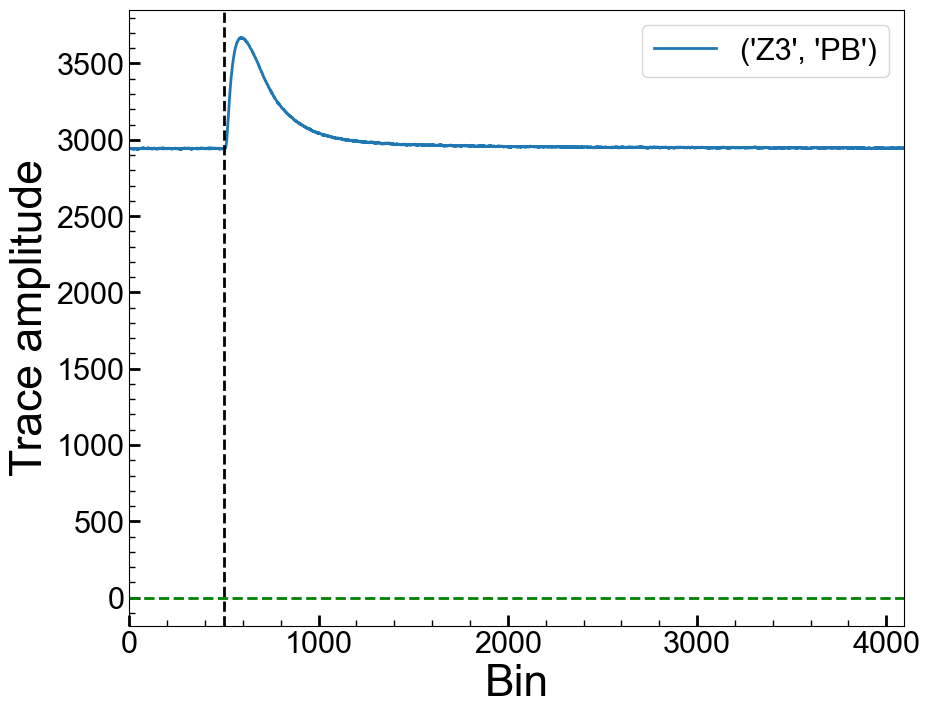

Series Number: 72209162200
Event Number: 1110143
Energy: 36.21041003857 keV


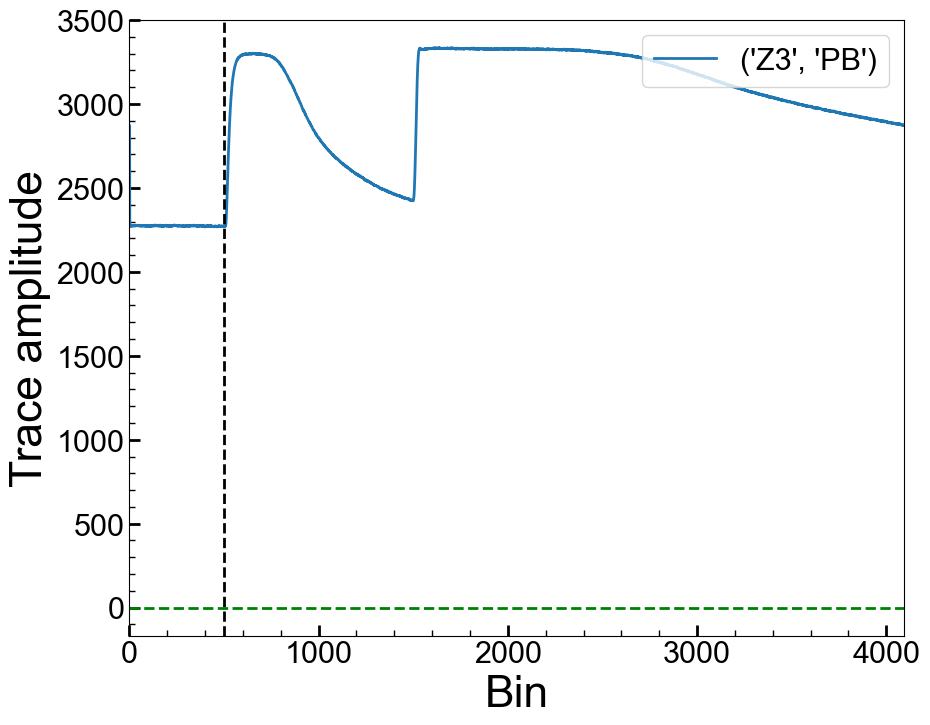

Series Number: 72209162200
Event Number: 1110649
Energy: 5.344629272564 keV


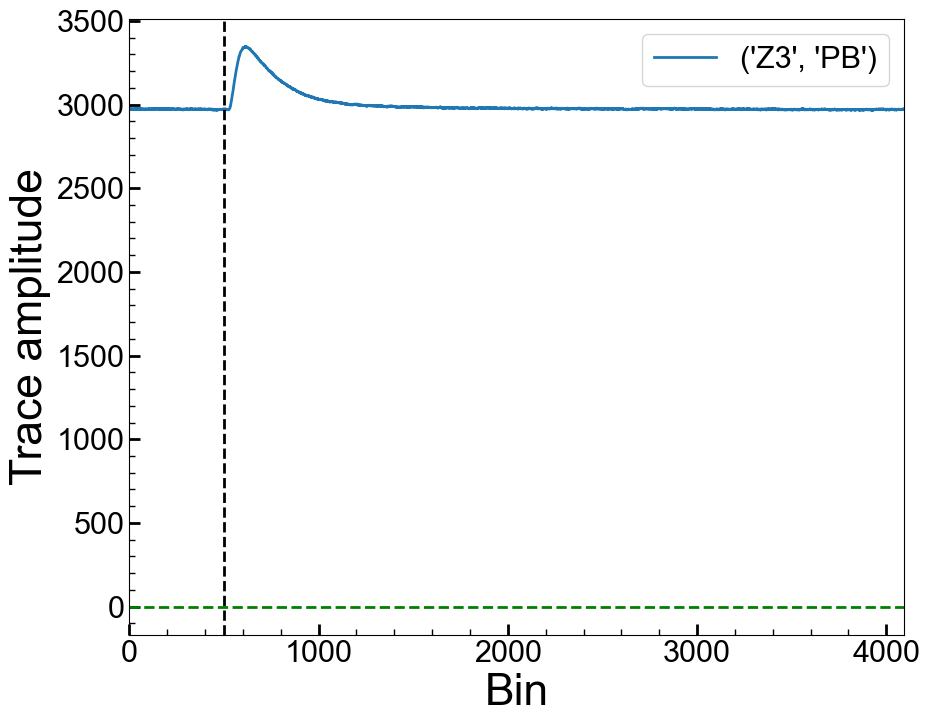

Series Number: 72209162200
Event Number: 1110879
Energy: 38.8023586011 keV


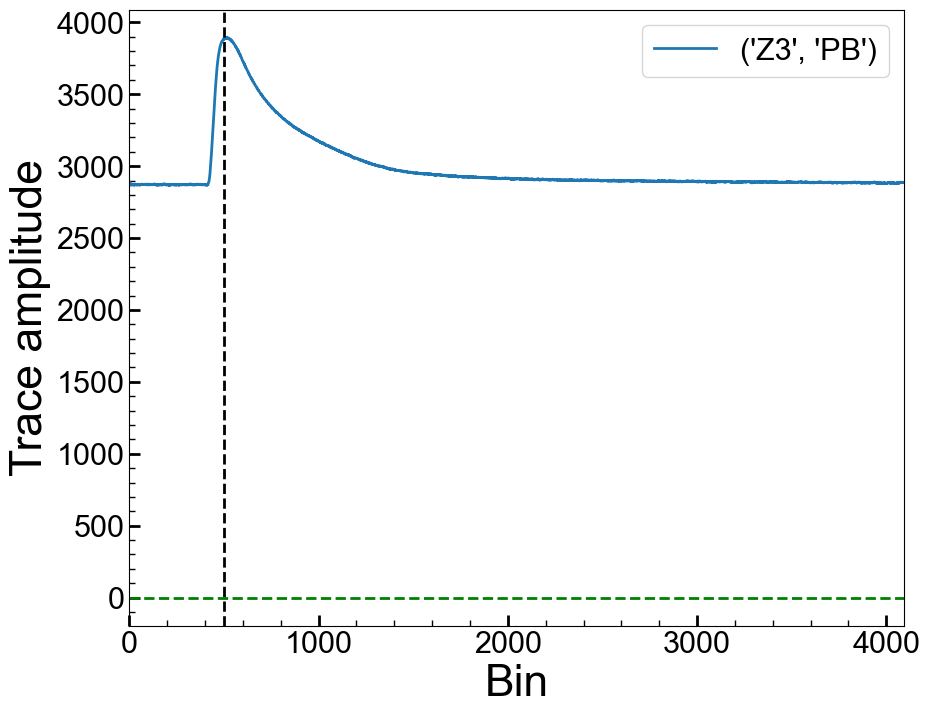

Series Number: 72209162200
Event Number: 1120457
Energy: 15.89377578251 keV


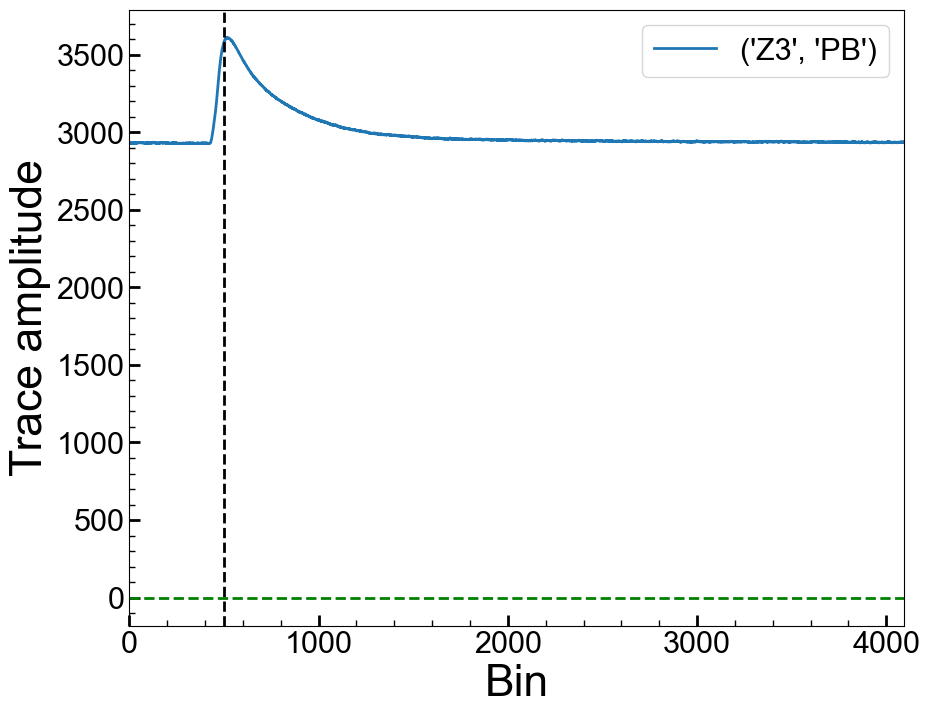

Series Number: 72209162200
Event Number: 1130006
Energy: 34.04177862434 keV


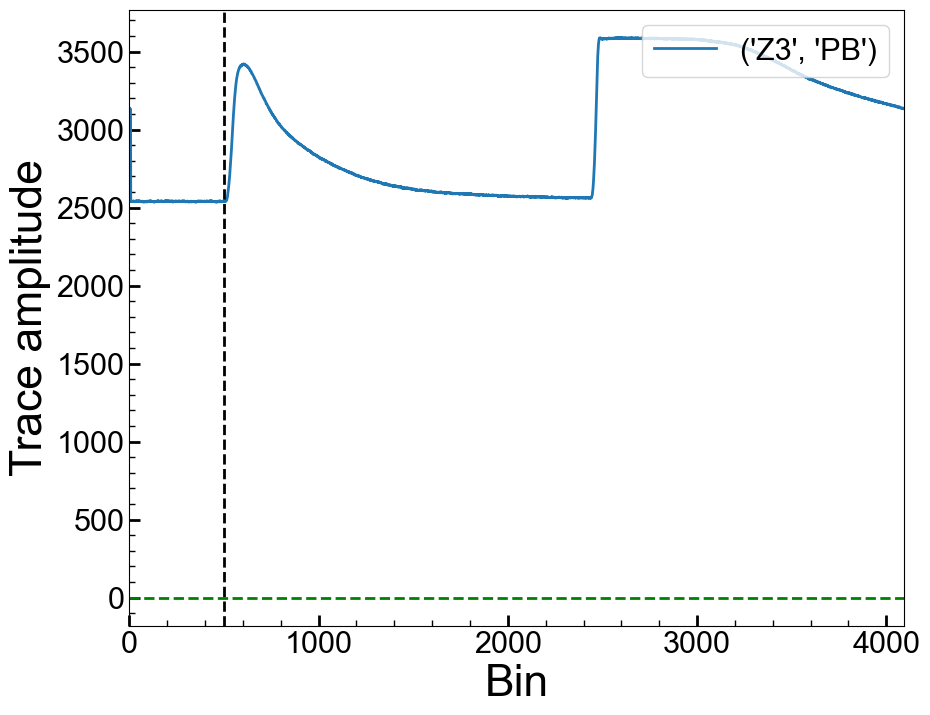

Series Number: 72209162200
Event Number: 1130100
Energy: 40.41023522827 keV


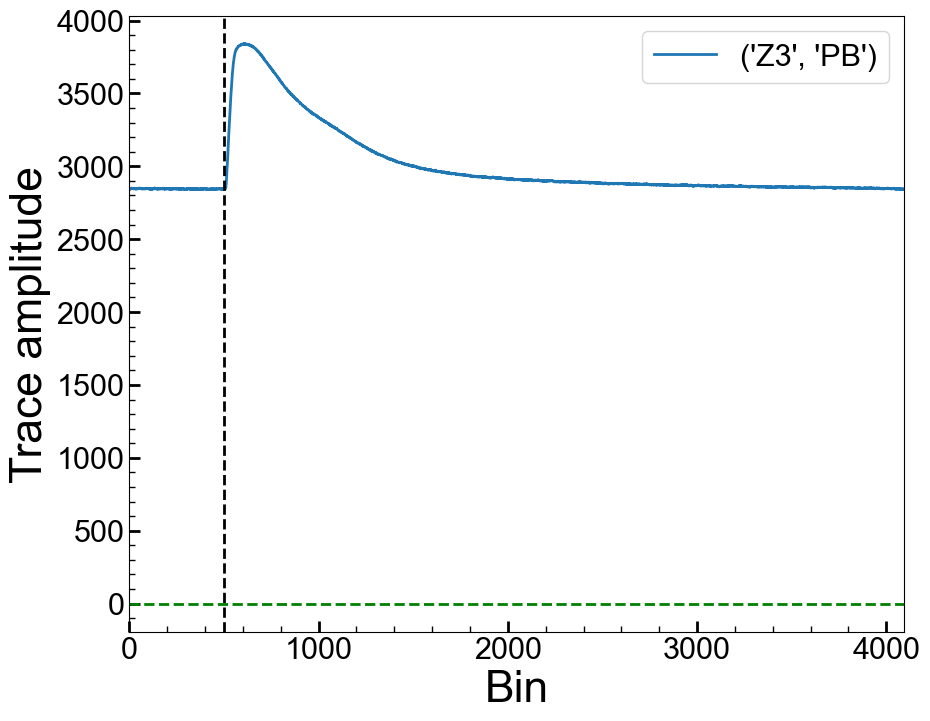

Series Number: 72209162200
Event Number: 1130568
Energy: 11.20794050509 keV


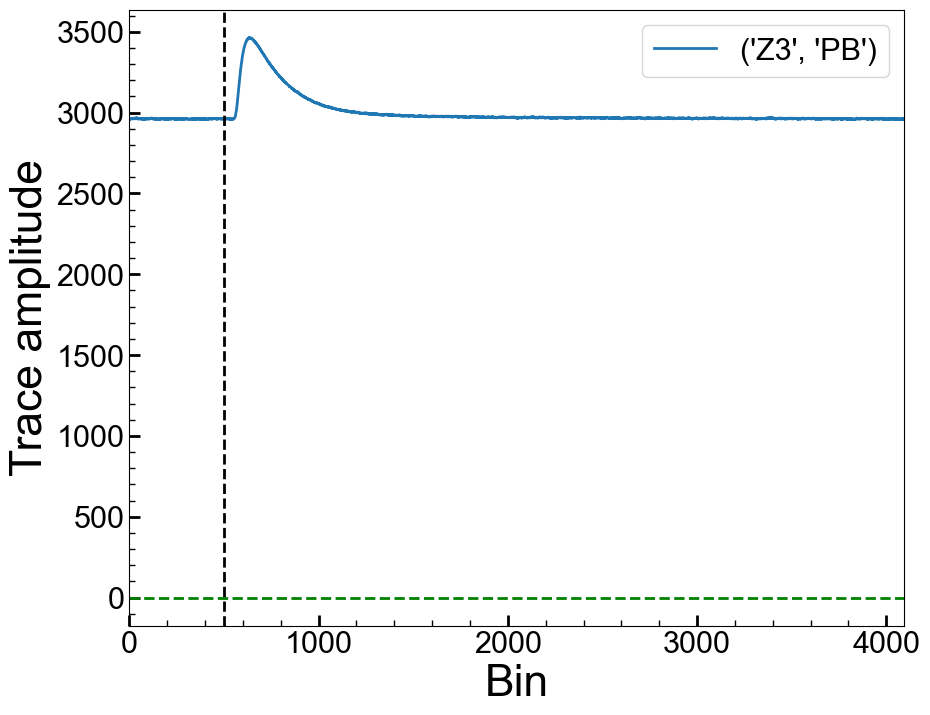

Series Number: 72209162200
Event Number: 1150306
Energy: 38.32398986079 keV


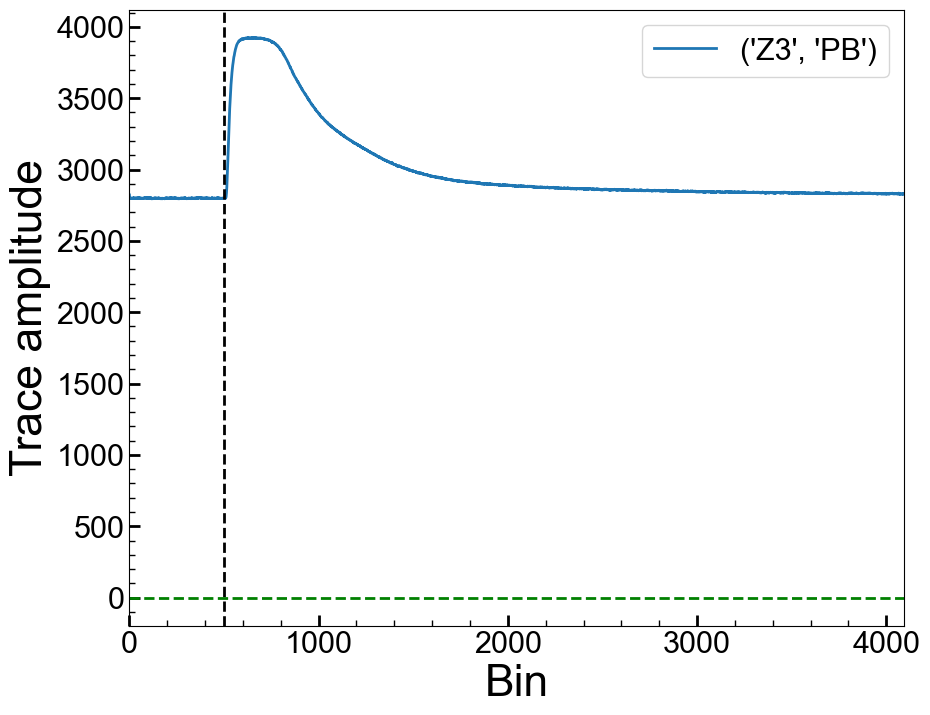

Series Number: 72209162200
Event Number: 1150698
Energy: 25.28197363466 keV


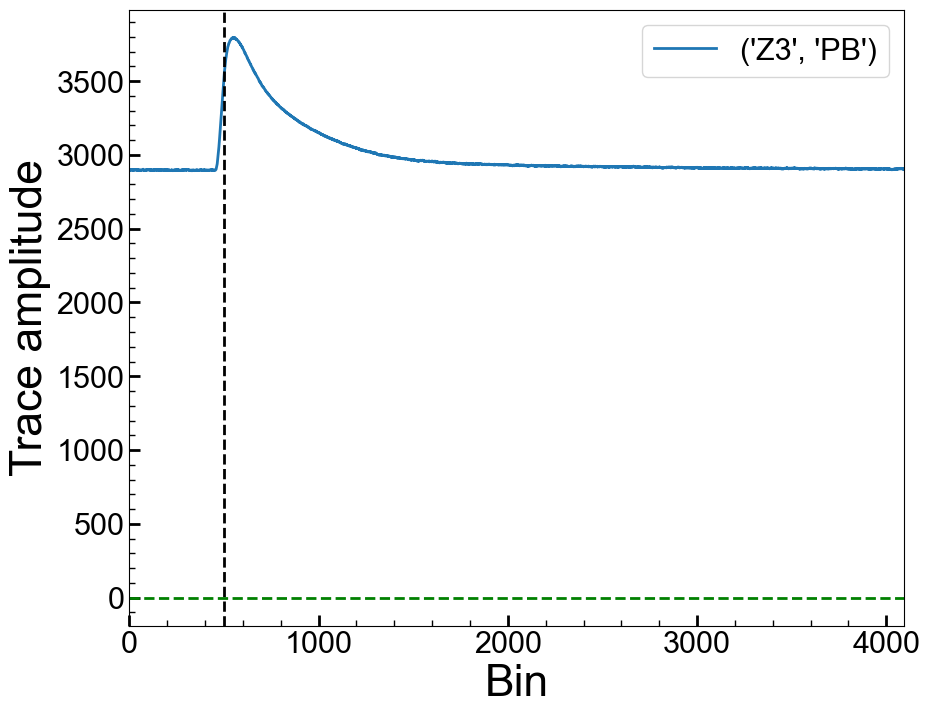

Series Number: 72209162200
Event Number: 1190784
Energy: 38.43668663771 keV


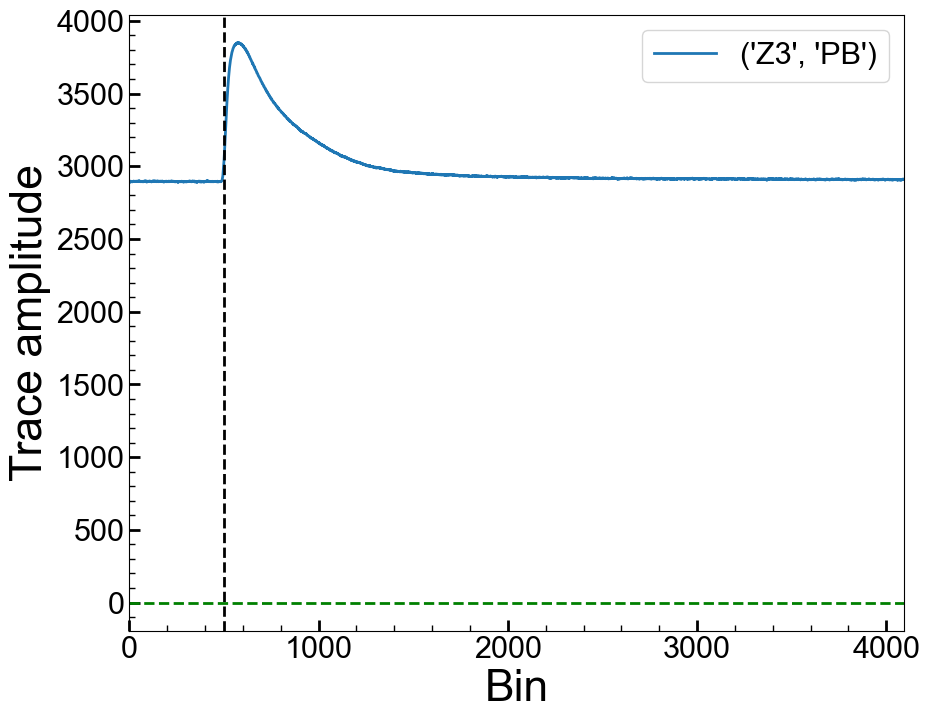

In [ ]:
loops = 0
time_reg = []
energies = []
cname = "null"

for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
        
        #print(exampleObj['Z1']['PA'][ser,ev])
        energy = getEnergy(ser, ev)
        
        shownpulses=0
        
        #if energy > 51:
        #    continue

        #plt.subplot(8,12)
        if(not isRailed(exampleObj['Z1']['PA'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z1']['PA'][ser,ev],label="pC") # index 0 corresponds to first event
        if(not isRailed(exampleObj['Z1']['PB'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z1']['PB'][ser,ev],label="pF")
        if(not isRailed(exampleObj['Z1']['PD'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z1']['PD'][ser,ev],label="pE")
        if(not isRailed(exampleObj['Z3']['PA'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z3']['PA'][ser,ev],label="pB") # index 0 corresponds to first event
        if(not isRailed(exampleObj['Z3']['PB'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z3']['PB'][ser,ev],label="pA")
        if(not isRailed(exampleObj['Z3']['PD'][ser,ev])):
            shownpulses+=1
            #ax1.plot(exampleObj['Z3']['PD'][ser,ev],label="pD")
            
        largc, cname = getLargestChannel(exampleObj,ser,ev)
        largc = largc + 3000
        #baseline = getBaseline(pT)
        #xB = np.linspace(0, 4095, 4096)
        #yB = baseline(xB)
        
        #bshifted_pT = np.subtract(pT,yB)

        if(shownpulses>0):
                        
            #crosses = np.isclose(bshifted_pT, 0, atol=75.0) #changed from 250
            
            #t = 0
            #for i in range(0,750):
            #    if (crosses[i] == True):
            #        time_reg.append(i)
            #        #print("Crosses at bin: " + str(i))
            #        energies.append(energy)
                    #t += 1
            #        break
                    
            #best_cross = 0
            #plot_cross = False
            
            #for i in range(0, 1000):
                #if (crosses[i] == True):
                    #best_cross = i 
                    
            #if best_cross != 0:
                #time_reg.append(best_cross)
                #print("Crosses at bin: " + str(best_cross))
                #energies.append(energy)
                #t += 1
                #plot_cross = True
                    
            if (plot==True):
                
                print("Series Number: " + str(ser))
                print("Event Number: " + str(ev))
                print("Energy: " + str(energy) + " keV")
        
                fig,axes = plt.subplots(1,1,figsize=(10.0,8.0),sharex=True)
                ax1 = axes
                
                ax1.plot(largc, label=cname)
                #ax1.plot(xB, yB, color='r', linestyle="--", label="baseline")
                plt.axhline(y=0, color='g', linestyle="--")
                
                #ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
                #plt.title('PA')
                ax1.legend(loc=1,prop={'size':22})
                ax1.set_xlim(0,4096)
                ax1.set_xlabel('Bin')
                ax1.set_ylabel('Trace amplitude')
                plt.axvline(x=500,color='k',linestyle="--")
                
                #if plot_cross == True:
                #    ax1.plot(best_cross, 0, 'ro')

                if shownpulses > 0:
                    #plt.savefig(f'figures/{energy}_keV_pulse.png')
                    plt.show()
                    
            #if t == 0:
            #    time_reg.append(0)
            
            loops += 1